In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array  # Correct import for the array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

 
Starting RG-A SIDIS Analysis
 

Started running on 11-3-2024 at 6:24 p.m.



.

.

.

# Creating Shaded Sector-dependent Fit Parameter Plots

In [2]:
# Define 'Text_output' below using the text output of the 'Compare Dimensions/Sectors' cell in the 'Fit_Parameter_Comparison.ipynb' notebook (same one that is meant to fill the excel sheets)
    # This cell automatically defines the 'Fit_Parameters' dictionary used by the cell(s) below it

Text_output = '''
Bin 1-1 ;Parameter B ;-0.058752781 ; 0.019127163 ;-0.212546804 ; 0.155868053 ;-0.169418651 ; 0.121191863 ;-0.091496963 ; 0.068387564 ;-0.117237326 ; 0.028988017 ;0.05723985 ; 0.039475493 ;-0.121147324 ; 0.045959439 
Bin 1-1 ;Parameter C ;0.017620822 ; 0.013155325 ;-0.061380736 ; 0.042812797 ;-0.003882208 ; 0.002770609 ;-0.041247181 ; 0.029207178 ;0.035458765 ; 0.018439099 ;0.048586227 ; 0.036422145 ;-0.014648136 ; 0.010637682 
Bin 1-2 ;Parameter B ;-0.097067744 ; 0.020698183 ;0.009885234 ; 0.006584157 ;-0.282387185 ; 0.074081404 ;-0.125982251 ; 0.052292675 ;-0.116290925 ; 0.048636431 ;-0.046254848 ; 0.02950976 ;-0.054478376 ; 0.0388736 
Bin 1-2 ;Parameter C ;0.02848994 ; 0.010621323 ;0.042141982 ; 0.02918433 ;-0.046463712 ; 0.034501585 ;0.013399523 ; 0.009559875 ;0.056373821 ; 0.041158062 ;0.029163523 ; 0.020134124 ;0.035835119 ; 0.026629156 
Bin 1-3 ;Parameter B ;-0.114389442 ; 0.061527809 ;-0.251470407 ; 0.080931859 ;-0.098992076 ; 0.072539214 ;-0.264717594 ; 0.061452445 ;-0.233102827 ; 0.043140483 ;-0.135398741 ; 0.040221428 ;-0.020895641 ; 0.013886677 
Bin 1-3 ;Parameter C ;0.017407547 ; 0.022415606 ;-0.075705355 ; 0.05611067 ;0.046918373 ; 0.035005897 ;-0.132237596 ; 0.036482578 ;-0.001998909 ; 0.001442284 ;0.001782413 ; 0.001321057 ;0.064720244 ; 0.022436429 
Bin 1-4 ;Parameter B ;-0.217837284 ; 0.008130016 ;-0.220424384 ; 0.049712518 ;-0.308697742 ; 0.024876074 ;-0.146748249 ; 0.023741491 ;-0.253026642 ; 0.023694547 ;-0.214389714 ; 0.032679306 ;-0.213223635 ; 0.022883026 
Bin 1-4 ;Parameter C ;-0.010000001 ; 0.001327181 ;-0.020766412 ; 0.011375749 ;-0.010000031 ; 0.019711971 ;-0.010000224 ; 0.013064568 ;-0.010000002 ; 0.004229693 ;-0.038061207 ; 0.024714622 ;-0.010000001 ; 0.013686061 
Bin 1-5 ;Parameter B ;-0.20217267 ; 0.001624795 ;-0.255479097 ; 0.034756878 ;-0.275273423 ; 0.0272266 ;-0.144549468 ; 0.025189686 ;-0.26701151 ; 0.024725953 ;-0.130987044 ; 0.002149887 ;-0.209992843 ; 0.025575496 
Bin 1-5 ;Parameter C ;0.019566085 ; 0.001240795 ;-0.012103598 ; 0.009077116 ;-0.054432384 ; 0.020594981 ;0.009367175 ; 0.007010201 ;-0.009119988 ; 0.004390831 ;0.067264557 ; 0.016131846 ;-0.014051021 ; 0.007335402 
Bin 1-6 ;Parameter B ;-0.24403554 ; 0.00113748 ;-0.280837783 ; 0.025431134 ;-0.238647991 ; 0.023493964 ;-0.296389659 ; 0.020323843 ;-0.110267218 ; 0.00144702 ;-0.311644099 ; 0.019592067 ;-0.219262621 ; 0.020229158 
Bin 1-6 ;Parameter C ;0.022091982 ; 0.006914124 ;-0.01859955 ; 0.010714685 ;0.008766186 ; 0.006549397 ;-0.028309332 ; 0.021123434 ;0.106979959 ; 0.017987777 ;0.008889176 ; 0.00650812 ;0.007558623 ; 0.005566406 
Bin 1-7 ;Parameter B ;-0.377164992 ; 0.006384377 ;-0.365941385 ; 0.024020143 ;-0.365125525 ; 0.01935461 ;-0.403010344 ; 0.017246347 ;-0.335769652 ; 0.018761445 ;-0.365808172 ; 0.017819251 ;-0.320502107 ; 0.01863056 
Bin 1-7 ;Parameter C ;0.059587628 ; 0.006021233 ;0.076734305 ; 0.021746175 ;0.073156826 ; 0.017818965 ;-0.024591492 ; 0.032573376 ;0.079136316 ; 0.017463299 ;0.040999589 ; 0.015076662 ;0.055775343 ; 0.017297485 
Bin 1-8 ;Parameter B ;-0.041869863 ; 0.01420283 ;-0.040112387 ; 0.023578237 ;0.01790983 ; 0.012952114 ;-0.004893293 ; 0.00280757 ;-0.071645009 ; 0.052674983 ;0.004702346 ; 0.002773575 ;0.01260697 ; 0.008707805 
Bin 1-8 ;Parameter C ;0.009387158 ; 0.006720877 ;-0.027085569 ; 0.013570694 ;0.061431813 ; 0.024377767 ;-0.010193965 ; 0.006170686 ;0.029543834 ; 0.021827067 ;0.043467054 ; 0.03205232 ;0.047068546 ; 0.034251225 
Bin 1-9 ;Parameter B ;-0.027668226 ; 0.011630037 ;-0.211132765 ; 0.054791991 ;-0.040172687 ; 0.028801642 ;0.033310904 ; 0.022669261 ;0.001857334 ; 0.001305591 ;0.084187102 ; 0.034435349 ;-0.055307547 ; 0.04125374 
Bin 1-9 ;Parameter C ;0.029870153 ; 0.007989993 ;-0.081946455 ; 0.031409146 ;0.023969136 ; 0.01725251 ;0.071346429 ; 0.021429975 ;0.097289078 ; 0.021516959 ;0.047092535 ; 0.033658501 ;0.011823108 ; 0.008230029 
Bin 1-10 ;Parameter B ;-0.099286353 ; 0.006932129 ;-0.087583657 ; 0.026107972 ;-0.128251558 ; 0.019902477 ;-0.091296263 ; 0.019124287 ;-0.131828611 ; 0.017641142 ;-0.135661475 ; 0.018118262 ;-0.012534516 ; 0.006579418 
Bin 1-10 ;Parameter C ;0.004254215 ; 0.002501379 ;0.002522013 ; 0.001716544 ;-0.025118568 ; 0.018723935 ;0.018206534 ; 0.013500015 ;0.024920811 ; 0.018480932 ;-0.037375089 ; 0.014672194 ;0.053590608 ; 0.015119023 
Bin 1-11 ;Parameter B ;-0.155461091 ; 0.005060179 ;-0.145993002 ; 0.01955744 ;-0.151040037 ; 0.015433538 ;-0.144472011 ; 0.014201579 ;-0.077322886 ; 0.000698866 ;-0.199036342 ; 0.013574723 ;-0.093681123 ; 0.013950446 
Bin 1-11 ;Parameter C ;-0.003394844 ; 0.001900788 ;-0.003854388 ; 0.002381371 ;0.005781224 ; 0.004259448 ;-0.016742809 ; 0.012438655 ;0.003734963 ; 0.004266852 ;-0.009124142 ; 0.004590591 ;0.02062019 ; 0.015321131 
Bin 1-12 ;Parameter B ;-0.214508381 ; 0.004614492 ;-0.046140362 ; 0.000910504 ;-0.20861222 ; 0.013174735 ;-0.22575502 ; 0.012411246 ;-0.248811767 ; 0.012543694 ;-0.161873307 ; 0.000898065 ;-0.156102212 ; 0.012824785 
Bin 1-12 ;Parameter C ;0.026305339 ; 0.00450994 ;0.065300367 ; 0.015875947 ;0.03920244 ; 0.012339569 ;0.003151837 ; 0.002056453 ;0.002912359 ; 0.001883695 ;-0.004112656 ; 0.007124272 ;0.03427464 ; 0.011563527 
Bin 1-13 ;Parameter B ;-0.23476988 ; 0.000339641 ;-0.011238232 ; 0.000909976 ;-0.306164924 ; 0.014829704 ;-0.230256952 ; 0.015225677 ;-0.194853508 ; 0.000938354 ;-0.247193035 ; 0.004374731 ;-0.299852369 ; 0.01501913 
Bin 1-13 ;Parameter C ;0.052172401 ; 0.005337556 ;0.070076625 ; 0.019084407 ;0.030543358 ; 0.020115568 ;0.015470095 ; 0.011241131 ;0.034250908 ; 0.022695203 ;0.041149166 ; 0.024690761 ;0.082853924 ; 0.01426497 
Bin 1-14 ;Parameter B ;-0.406371606 ; 0.006585368 ;-0.387858947 ; 0.023719096 ;-0.38926487 ; 0.018218286 ;-0.416528203 ; 0.017713756 ;-0.428963604 ; 0.018209099 ;-0.368773139 ; 0.017922732 ;-0.41040841 ; 0.018117909 
Bin 1-14 ;Parameter C ;0.1213866 ; 0.006356097 ;0.136282186 ; 0.022170722 ;0.149289219 ; 0.016573102 ;0.097267013 ; 0.017657396 ;0.135750126 ; 0.016996336 ;0.097692013 ; 0.017348579 ;0.129420372 ; 0.017054251 
Bin 1-15 ;Parameter B ;-0.044261688 ; 0.008227767 ;-0.011925342 ; 0.01450434 ;-0.202808825 ; 0.025508778 ;-0.020832772 ; 0.036811331 ;-0.143965445 ; 0.047538389 ;-0.092257652 ; 0.02414048 ;-0.066217291 ; 0.049667695 
Bin 1-15 ;Parameter C ;-0.012500023 ; 0.020312068 ;-0.021128264 ; 0.01555686 ;-0.071129416 ; 0.034351606 ;-0.012500001 ; 0.016340716 ;-0.054375532 ; 0.039879095 ;-0.012500023 ; 0.016654698 ;-0.062395793 ; 0.044886778 
Bin 1-16 ;Parameter B ;-0.060098827 ; 0.007249807 ;-0.086167479 ; 0.025506963 ;-0.06923386 ; 0.019182221 ;-0.020926535 ; 0.015358293 ;-0.098928257 ; 0.019176381 ;-0.108289195 ; 0.019803277 ;-0.004110274 ; 0.002969651 
Bin 1-16 ;Parameter C ;-0.01362062 ; 0.005424883 ;-0.03296525 ; 0.024602732 ;-0.008232677 ; 0.006075698 ;-0.000874281 ; 0.000688337 ;-0.010755123 ; 0.005712655 ;-0.061744093 ; 0.01718443 ;-0.002466502 ; 0.001788061 
Bin 1-17 ;Parameter B ;-0.096766602 ; 0.004409456 ;-0.051190295 ; 0.015323056 ;-0.084554278 ; 0.012821949 ;-0.079517754 ; 0.009783708 ;-0.045169927 ; 0.000733833 ;-0.145894099 ; 0.011962207 ;-0.0538129 ; 0.012134928 
Bin 1-17 ;Parameter C ;0.004123412 ; 0.002917505 ;0.00670286 ; 0.00498908 ;0.012228284 ; 0.008668294 ;0.001162692 ; 0.001709556 ;0.029860077 ; 0.011055987 ;-0.022345027 ; 0.016218653 ;0.029180858 ; 0.011088369 
Bin 1-18 ;Parameter B ;-0.164696418 ; 0.004020832 ;-0.147883269 ; 0.014709524 ;-0.121447693 ; 0.002178659 ;-0.162856615 ; 0.011466886 ;-0.176585927 ; 0.011323773 ;-0.153878026 ; 0.009507666 ;-0.166155916 ; 0.01149411 
Bin 1-18 ;Parameter C ;0.017144829 ; 0.003947977 ;0.002829911 ; 0.002083558 ;0.021697106 ; 0.015112347 ;0.003933037 ; 0.002221612 ;0.00931948 ; 0.005154067 ;-0.011345598 ; 0.013002956 ;0.049886795 ; 0.011048719 
Bin 1-19 ;Parameter B ;-0.237167676 ; 0.004640179 ;-0.23529057 ; 0.016765862 ;-0.17768442 ; 0.013254712 ;-0.205973144 ; 0.013102915 ;-0.117497894 ; 0.000595801 ;-0.232288648 ; 0.012947018 ;-0.205001313 ; 0.001127444 
Bin 1-19 ;Parameter C ;0.040309099 ; 0.004546429 ;0.029026082 ; 0.021136478 ;0.050698168 ; 0.0123006 ;0.01909612 ; 0.014216837 ;-0.005912442 ; 0.011667981 ;0.03621939 ; 0.011764518 ;0.051597673 ; 0.011105544 
Bin 1-20 ;Parameter B ;-0.302368835 ; 0.006354451 ;-0.284848118 ; 0.022747127 ;-0.278153514 ; 0.017227798 ;-0.300210097 ; 0.017079013 ;-0.293992341 ; 0.017334698 ;-0.026911277 ; 0.000647957 ;-0.002781915 ; 0.001147352 
Bin 1-20 ;Parameter C ;0.114579106 ; 0.006063409 ;0.11447213 ; 0.021271284 ;0.083061955 ; 0.015846988 ;0.091917568 ; 0.016311751 ;0.082190077 ; 0.016027457 ;0.097337517 ; 0.016465931 ;0.043259219 ; 0.015540956 
Bin 1-22 ;Parameter B ;-0.075370606 ; 0.008360307 ;-0.032391986 ; 0.040753774 ;-0.152188947 ; 0.024311 ;-0.066223215 ; 0.022070664 ;-0.165368674 ; 0.035530714 ;-0.078621423 ; 0.033071118 ;-0.129452038 ; 0.034825127 
Bin 1-22 ;Parameter C ;-0.01250009 ; 0.0192006 ;-0.01250001 ; 0.023160489 ;-0.012500002 ; 0.02151291 ;-0.012500001 ; 0.01604777 ;-0.059390983 ; 0.033840119 ;-0.029793428 ; 0.02221887 ;-0.072811507 ; 0.02360153 
Bin 1-23 ;Parameter B ;-0.081240398 ; 0.005150494 ;-0.055741681 ; 0.017636118 ;-0.029230022 ; 0.021006486 ;-0.089470245 ; 0.014992396 ;-0.11098647 ; 0.014524705 ;-0.110116896 ; 0.014644921 ;-0.069042921 ; 0.0149396 
Bin 1-23 ;Parameter C ;-0.017719714 ; 0.004930184 ;-0.010592898 ; 0.006751111 ;0.009064774 ; 0.005163862 ;-0.031046635 ; 0.022226813 ;-0.038615183 ; 0.013445283 ;-0.052879494 ; 0.015075726 ;0.053741928 ; 0.014156267 
Bin 1-24 ;Parameter B ;-0.1288973 ; 0.003690756 ;-0.108077469 ; 0.013361651 ;-0.098592453 ; 0.010742333 ;-0.122013432 ; 0.010432257 ;-0.150250174 ; 0.010581638 ;-0.149976758 ; 0.010308492 ;-0.161400266 ; 0.010497201 
Bin 1-24 ;Parameter C ;-0.010707341 ; 0.003485576 ;-0.01248162 ; 0.008737805 ;0.010744767 ; 0.007776213 ;-0.0308635 ; 0.010257581 ;0.00773485 ; 0.003156125 ;-0.025589758 ; 0.009543344 ;-0.002845754 ; 0.002111071 
Bin 1-25 ;Parameter B ;-0.17424751 ; 0.004130525 ;-0.182196562 ; 0.015124641 ;-0.136821905 ; 0.011553168 ;-0.160537078 ; 0.011739304 ;-0.16798845 ; 0.011601658 ;-0.17292136 ; 0.011614614 ;-0.219617411 ; 0.011554215 
Bin 1-25 ;Parameter C ;0.008819461 ; 0.00355459 ;0.035348209 ; 0.013354164 ;-0.011173475 ; 0.006339534 ;0.004461635 ; 0.003105729 ;-0.00353533 ; 0.002053893 ;0.023254588 ; 0.009724493 ;0.010579509 ; 0.007452665 
Bin 1-26 ;Parameter B ;-0.222373183 ; 0.005275799 ;-0.215646589 ; 0.018678192 ;-0.188596203 ; 0.014635759 ;-0.196378979 ; 0.014508985 ;-0.182817455 ; 0.014552854 ;-0.238959492 ; 0.014317466 ;-0.256189374 ; 0.014327563 
Bin 1-26 ;Parameter C ;0.058093582 ; 0.005126152 ;0.040829528 ; 0.016055052 ;0.08775273 ; 0.013529155 ;0.042823126 ; 0.013544681 ;0.042574392 ; 0.0132205 ;0.052102788 ; 0.013335775 ;0.070359796 ; 0.013633423 
Bin 1-29 ;Parameter B ;-0.057756657 ; 0.011529961 ;-0.009696604 ; 0.005941523 ;-0.038274765 ; 0.028270168 ;0.009427275 ; 0.006657329 ;-0.039583608 ; 0.02954065 ;-0.172392833 ; 0.023992968 ;-0.005606432 ; 0.003699967 
Bin 1-29 ;Parameter C ;-0.005606806 ; 0.002843146 ;0.006305978 ; 0.004086567 ;0.015306533 ; 0.009044387 ;0.012120314 ; 0.008639521 ;0.019019466 ; 0.011692746 ;-0.046982394 ; 0.023697987 ;-0.007182036 ; 0.00315152 
Bin 1-30 ;Parameter B ;-0.078413081 ; 0.005123086 ;-0.042080944 ; 0.016214759 ;-0.031367716 ; 0.012764315 ;-0.056031549 ; 0.013818815 ;-0.104724644 ; 0.013897764 ;-0.11009867 ; 0.014156937 ;-0.136446225 ; 0.01408538 
Bin 1-30 ;Parameter C ;-0.010617725 ; 0.004441395 ;-0.000943029 ; 0.000692051 ;0.009664738 ; 0.004834645 ;-0.006880895 ; 0.005042421 ;-0.022988613 ; 0.016940007 ;-0.012230078 ; 0.008139986 ;-0.002271403 ; 0.00147492 
Bin 1-31 ;Parameter B ;-0.141903965 ; 0.00449257 ;-0.108266514 ; 0.016098386 ;-0.108544367 ; 0.012765112 ;-0.00139148 ; 0.000710566 ;-0.033557782 ; 0.001202467 ;-0.153346699 ; 0.012723349 ;-0.217838004 ; 0.012569847 
Bin 1-31 ;Parameter C ;0.001131422 ; 0.000802418 ;0.003541408 ; 0.001941388 ;-0.001234241 ; 0.000829745 ;-0.032223169 ; 0.011783707 ;-0.002790959 ; 0.002698754 ;0.004529737 ; 0.00289323 ;0.01255082 ; 0.008972052 
Bin 1-32 ;Parameter B ;-0.156311242 ; 0.00537621 ;-0.048693374 ; 0.001904223 ;-0.126489381 ; 0.014880993 ;-0.019608776 ; 0.001015703 ;-0.172196414 ; 0.014964129 ;-0.184757464 ; 0.014453309 ;-0.145735242 ; 0.002243436 
Bin 1-32 ;Parameter C ;0.034235512 ; 0.00516346 ;0.044737654 ; 0.016783364 ;0.044711526 ; 0.013873633 ;0.039351532 ; 0.013446839 ;0.063920999 ; 0.013623741 ;0.006317576 ; 0.004698594 ;0.010007033 ; 0.003340937 
Bin 2-1 ;Parameter B ;-0.093406378 ; 0.007019521 ;-0.087148804 ; 0.025018767 ;-0.04303147 ; 0.030686273 ;-0.098648974 ; 0.018123396 ;-0.126667191 ; 0.01756472 ;-0.134170859 ; 0.017645333 ;-0.057480932 ; 0.016156816 
Bin 2-1 ;Parameter C ;0.021278091 ; 0.0059839 ;0.020930464 ; 0.014459964 ;0.068793047 ; 0.017534894 ;-0.011845288 ; 0.006516856 ;-0.003406132 ; 0.00188769 ;0.008816315 ; 0.005597857 ;0.028269462 ; 0.020564422 
Bin 2-2 ;Parameter B ;-0.161361537 ; 0.014021458 ;-0.095497793 ; 0.070250132 ;-0.148695882 ; 0.008689098 ;-0.104005151 ; 0.035660159 ;-0.065525096 ; 0.004411535 ;-0.15663334 ; 0.033860069 ;-0.201604859 ; 0.036745147 
Bin 2-2 ;Parameter C ;0.066460411 ; 0.009528062 ;0.098509478 ; 0.033164281 ;0.058802423 ; 0.017204706 ;0.099105584 ; 0.024858171 ;0.113351822 ; 0.017085047 ;0.068799589 ; 0.023126249 ;0.017851058 ; 0.009545355 
Bin 2-3 ;Parameter B ;-0.157492266 ; 0.013629952 ;-0.230025094 ; 0.053370592 ;-0.233691694 ; 0.038768795 ;-0.189559568 ; 0.036195038 ;-0.118724611 ; 0.035847219 ;-0.024714966 ; 0.013459132 ;-0.030397663 ; 0.020902886 
Bin 2-3 ;Parameter C ;0.04570478 ; 0.009197195 ;0.007932859 ; 0.004424436 ;0.041016839 ; 0.030528409 ;-0.010949888 ; 0.008171659 ;0.070284756 ; 0.02374618 ;0.085636495 ; 0.023349547 ;0.109068573 ; 0.023175779 
Bin 2-4 ;Parameter B ;-0.235523726 ; 0.013913733 ;-0.189669249 ; 0.051251896 ;-0.213751574 ; 0.042025761 ;-0.137576547 ; 0.037956615 ;-0.263944996 ; 0.034531327 ;-0.296730643 ; 0.039086833 ;-0.247019038 ; 0.032210616 
Bin 2-4 ;Parameter C ;0.013259045 ; 0.009943129 ;0.018647522 ; 0.013376882 ;0.026354168 ; 0.017540738 ;0.061176282 ; 0.025519193 ;-0.001381893 ; 0.000892859 ;0.012796204 ; 0.009555434 ;-0.021190223 ; 0.013791555 
Bin 2-5 ;Parameter B ;-0.255049099 ; 0.003377906 ;-0.237298461 ; 0.040387815 ;-0.158395838 ; 0.002032249 ;-0.279230905 ; 0.031943171 ;-0.370427478 ; 0.025965294 ;-0.061731375 ; 0.001431578 ;-0.288870865 ; 0.028014225 
Bin 2-5 ;Parameter C ;0.019186588 ; 0.001073423 ;-0.012104546 ; 0.007964576 ;0.091589134 ; 0.019318524 ;-0.054754282 ; 0.022892324 ;-0.053941823 ; 0.020608053 ;0.060957078 ; 0.018292492 ;-0.048636112 ; 0.030895652 
Bin 2-6 ;Parameter B ;-0.339794991 ; 0.007377303 ;-0.353173695 ; 0.03200502 ;-0.299653678 ; 0.024390103 ;-0.394114 ; 0.022050767 ;-0.120783634 ; 0.000982958 ;-0.215446498 ; 0.001274984 ;-0.275666404 ; 0.022586263 
Bin 2-6 ;Parameter C ;-0.000559169 ; 0.000365319 ;-0.051287064 ; 0.0372205 ;0.022713615 ; 0.016681851 ;-0.073440373 ; 0.019980257 ;0.005217574 ; 0.009708049 ;0.010785573 ; 0.019769951 ;-0.048524409 ; 0.018900198 
Bin 2-7 ;Parameter B ;-0.1375 ; 0.000207373 ;-0.1375 ; 0.001906379 ;-0.1375 ; 0.001323009 ;-0.1375 ; 0.000993675 ;-0.1375 ; 0.001609922 ;-0.1375 ; 0.002743214 ;-0.1375 ; 0.001964145 
Bin 2-7 ;Parameter C ;0.03 ; 0.000255323 ;0.030000001 ; 0.001553348 ;0.03 ; 0.001146399 ;0.03 ; 0.000933161 ;0.03 ; 0.009213433 ;0.03 ; 0.006040169 ;0.03 ; 0.002442967 
Bin 2-8 ;Parameter B ;-0.08463694 ; 0.011254133 ;-0.054596396 ; 0.040881246 ;-0.200385411 ; 0.032238102 ;-0.079923253 ; 0.033026845 ;-0.008399192 ; 0.004947894 ;-0.080434234 ; 0.028833129 ;-0.021007222 ; 0.010025202 
Bin 2-8 ;Parameter C ;0.012575354 ; 0.009321678 ;-0.000417179 ; 0.000312252 ;-0.026063681 ; 0.019358464 ;0.009112129 ; 0.017874635 ;0.063456405 ; 0.0188049 ;0.038656163 ; 0.028168051 ;0.008621789 ; 0.009053099 
Bin 2-9 ;Parameter B ;-0.089308053 ; 0.009840938 ;-0.095810339 ; 0.033686038 ;-0.052866424 ; 0.035027973 ;-0.098978774 ; 0.023697366 ;-0.114518969 ; 0.024854177 ;-0.037048598 ; 0.027681971 ;-0.108566774 ; 0.023688585 
Bin 2-9 ;Parameter C ;0.014648297 ; 0.010457106 ;-0.020143195 ; 0.011585388 ;0.053662742 ; 0.018323756 ;0.01334004 ; 0.007102334 ;0.007390572 ; 0.005184068 ;0.079573297 ; 0.018215719 ;0.001078324 ; 0.00081481 
Bin 2-10 ;Parameter B ;-0.143017806 ; 0.001767226 ;-0.12734228 ; 0.030912925 ;-0.115762794 ; 0.003968259 ;-0.186067894 ; 0.019417346 ;-0.232989991 ; 0.020977985 ;-0.06712042 ; 0.001391687 ;-0.071253453 ; 0.020934366 
Bin 2-10 ;Parameter C ;0.018294367 ; 0.005629686 ;0.019939831 ; 0.01182154 ;0.053393781 ; 0.016626863 ;0.013095782 ; 0.025588418 ;-0.034874328 ; 0.025456714 ;0.041959383 ; 0.015984217 ;-0.001595546 ; 0.001085818 
Bin 2-11 ;Parameter B ;-0.225828666 ; 0.006256182 ;-0.185678964 ; 0.025306372 ;-0.196960565 ; 0.002611023 ;-0.246616291 ; 0.017478226 ;-0.273187967 ; 0.016363998 ;-0.112487615 ; 0.001497275 ;-0.152244773 ; 0.017454359 
Bin 2-11 ;Parameter C ;0.013061757 ; 0.003562827 ;0.014673627 ; 0.007717724 ;0.068092224 ; 0.015864535 ;0.005405251 ; 0.003098753 ;0.020098761 ; 0.015060304 ;0.032079181 ; 0.014324376 ;-0.012473537 ; 0.007212678 
Bin 2-12 ;Parameter B ;-0.299139298 ; 0.000330365 ;-0.108535842 ; 0.001008759 ;-0.366371723 ; 0.01592389 ;-0.362066423 ; 0.015685863 ;-0.116500922 ; 0.000580054 ;-0.038621142 ; 0.000465251 ;-0.294480974 ; 0.015999758 
Bin 2-12 ;Parameter C ;0.0808668 ; 0.005796616 ;0.068605973 ; 0.019866197 ;0.086248886 ; 0.015194008 ;0.035915658 ; 0.013662657 ;0.012804286 ; 0.005826217 ;0.043485636 ; 0.014683395 ;0.076383928 ; 0.015227959 
Bin 2-13 ;Parameter B ;-0.035034348 ; 0.006880386 ;-0.015447369 ; 0.009534504 ;-0.057783879 ; 0.019855377 ;-0.053016615 ; 0.017750361 ;-0.034935476 ; 0.025244684 ;-0.072740243 ; 0.018651519 ;0.013256995 ; 0.007791871 
Bin 2-13 ;Parameter C ;0.003269579 ; 0.002038455 ;0.02733081 ; 0.020461228 ;0.010641776 ; 0.00579101 ;-0.024085374 ; 0.017993256 ;-0.018446088 ; 0.013725108 ;0.00570561 ; 0.003494473 ;0.002844906 ; 0.002133783 
Bin 2-14 ;Parameter B ;-0.1375 ; 0.000335201 ;-0.1375 ; 0.005303873 ;-0.137500001 ; 0.004449708 ;-0.137500001 ; 0.002547407 ;-0.1375 ; 0.003856015 ;-0.1375 ; 0.002946652 ;-0.1375 ; 0.00153318 
Bin 2-14 ;Parameter C ;0.03 ; 0.000344052 ;0.03 ; 0.004803226 ;0.03 ; 0.007359232 ;0.03 ; 0.001816491 ;0.03 ; 0.002687076 ;0.03 ; 0.003673511 ;0.03 ; 0.001277419 
Bin 2-15 ;Parameter B ;-0.136167875 ; 0.006786602 ;-0.123422466 ; 0.024548469 ;-0.130183811 ; 0.018448447 ;-0.137678156 ; 0.018245489 ;-0.167094644 ; 0.017761243 ;-0.109641685 ; 0.017497395 ;-0.101584876 ; 0.00903365 
Bin 2-15 ;Parameter C ;-0.006977055 ; 0.005177016 ;-0.050121901 ; 0.020311368 ;0.043296755 ; 0.015536063 ;-0.016249522 ; 0.011464519 ;-0.018998336 ; 0.014039904 ;0.035718468 ; 0.014604142 ;0.005888391 ; 0.010973675 
Bin 2-16 ;Parameter B ;-0.169467569 ; 0.025206278 ;-0.157910798 ; 0.007442981 ;-0.139381664 ; 0.017891169 ;-0.171943755 ; 0.016883986 ;-0.154003698 ; 0.016123448 ;-0.02946354 ; 0.000779433 ;-0.178410714 ; 0.016771292 
Bin 2-16 ;Parameter C ;0.006958257 ; 0.002287783 ;0.007910202 ; 0.015523727 ;0.021631492 ; 0.016143937 ;-0.032708993 ; 0.023660174 ;-0.021430085 ; 0.016069679 ;0.021974795 ; 0.016988428 ;0.008752024 ; 0.005878825 
Bin 2-17 ;Parameter B ;-0.248619786 ; 0.005459814 ;-0.248450232 ; 0.019662965 ;-0.262689817 ; 0.014902827 ;-0.221421604 ; 0.014853746 ;-0.233467321 ; 0.014754349 ;-0.246325346 ; 0.014687215 ;-0.259543268 ; 0.015156542 
Bin 2-17 ;Parameter C ;0.027414009 ; 0.005365182 ;0.019777591 ; 0.014321444 ;0.012680408 ; 0.008513684 ;-0.008295254 ; 0.005260387 ;0.015770847 ; 0.011561251 ;0.018596094 ; 0.013945556 ;0.090024427 ; 0.014704963 
Bin 2-18 ;Parameter B ;-0.347247358 ; 0.006607923 ;-0.342002671 ; 0.023470713 ;-0.342579407 ; 0.018032982 ;-0.01764724 ; 0.000582079 ;-0.308830484 ; 0.018789651 ;-0.249481014 ; 0.001443335 ;-0.085367424 ; 0.000715777 
Bin 2-18 ;Parameter C ;0.086875027 ; 0.006427121 ;0.075173425 ; 0.022134483 ;0.102105193 ; 0.016681695 ;-0.022823877 ; 0.019074293 ;0.05272969 ; 0.01708959 ;0.072886365 ; 0.015375256 ;0.046254551 ; 0.01477867 
Bin 2-19 ;Parameter B ;-0.042460575 ; 0.00746943 ;-0.009330896 ; 0.005784869 ;-0.087249203 ; 0.021320083 ;-0.039517865 ; 0.028463335 ;-0.088324568 ; 0.019639122 ;-0.021286915 ; 0.015326503 ;-0.009036611 ; 0.006758265 
Bin 2-19 ;Parameter C ;0.002890798 ; 0.002118811 ;0.011310569 ; 0.007640254 ;0.017805911 ; 0.012825483 ;-0.025537504 ; 0.019047845 ;-0.035543327 ; 0.014464746 ;0.013303349 ; 0.007811469 ;0.020703974 ; 0.015506339 
Bin 2-20 ;Parameter B ;-0.052301505 ; 0.007205929 ;-0.020460702 ; 0.012972018 ;-0.084576482 ; 0.019441871 ;-0.00824936 ; 0.005434116 ;-0.094041961 ; 0.019212827 ;-0.093777948 ; 0.019358078 ;-0.023102269 ; 0.017219737 
Bin 2-20 ;Parameter C ;0.004586 ; 0.002700274 ;0.004278943 ; 0.003084789 ;0.027957902 ; 0.020697785 ;0.019132697 ; 0.014612388 ;-0.00314888 ; 0.002253132 ;-0.0608242 ; 0.017245455 ;0.046096516 ; 0.015697405 
Bin 2-21 ;Parameter B ;-0.132995156 ; 0.005067577 ;-0.141871918 ; 0.018889872 ;-0.143000809 ; 0.016004307 ;-0.100642194 ; 0.014828325 ;-0.160399792 ; 0.013835021 ;-0.138396557 ; 0.015035271 ;-0.123876639 ; 0.014703249 
Bin 2-21 ;Parameter C ;-3e-09 ; 3e-09 ;-0.023859959 ; 0.017878714 ;-0.013432296 ; 0.00871097 ;-0.0 ; 0.0 ;-0.05858898 ; 0.014100782 ;-0.016396631 ; 0.012005501 ;-0.0 ; 0.0 
Bin 2-22 ;Parameter B ;-0.163308027 ; 0.005227673 ;-0.155870031 ; 0.019166971 ;-0.063140396 ; 0.000929234 ;-0.015234981 ; 0.000733907 ;-0.155752321 ; 0.014464822 ;-0.16116696 ; 0.014647136 ;-0.212004422 ; 0.014795168 
Bin 2-22 ;Parameter C ;-0.017040014 ; 0.005051966 ;0.001300877 ; 0.00089426 ;-0.020018296 ; 0.015620765 ;-0.056961621 ; 0.014988591 ;-0.023884038 ; 0.017685099 ;-0.002370872 ; 0.001395308 ;0.031802218 ; 0.013150954 
Bin 2-23 ;Parameter B ;-0.232535681 ; 0.00554673 ;-0.231984338 ; 0.01998307 ;-0.231300645 ; 0.015312947 ;-0.045806694 ; 0.000774842 ;-0.231066004 ; 0.015648433 ;-0.215704426 ; 0.015392333 ;-0.276983705 ; 0.014810549 
Bin 2-23 ;Parameter C ;0.020923074 ; 0.005299489 ;0.001450832 ; 0.000733072 ;0.002956687 ; 0.002184483 ;0.004526035 ; 0.002974426 ;0.026230723 ; 0.019167626 ;0.025701716 ; 0.018806252 ;0.036951464 ; 0.023446584 
Bin 2-25 ;Parameter B ;-0.065317405 ; 0.009128956 ;-0.05484607 ; 0.039723866 ;-0.151838476 ; 0.027084732 ;0.001290147 ; 0.000956057 ;-0.090372331 ; 0.023214596 ;-0.070086998 ; 0.023309412 ;-0.070792293 ; 0.023585524 
Bin 2-25 ;Parameter C ;-0.012247814 ; 0.008993678 ;0.029210241 ; 0.02184113 ;-0.031390516 ; 0.023421704 ;-0.005666921 ; 0.004052782 ;-0.032738397 ; 0.024088353 ;-0.03950104 ; 0.028479192 ;-0.006563209 ; 0.003327956 
Bin 2-26 ;Parameter B ;-0.078533556 ; 0.00666104 ;-0.046395957 ; 0.033241175 ;-0.058536525 ; 0.018063259 ;-0.104009707 ; 0.018610638 ;-0.084172308 ; 0.017871965 ;-0.055394988 ; 0.01768071 ;-0.134509448 ; 0.018548171 
Bin 2-26 ;Parameter C ;-0.013795589 ; 0.005763478 ;-0.030964644 ; 0.023216768 ;0.012500647 ; 0.006267892 ;-0.049023776 ; 0.017990761 ;0.017031333 ; 0.011814797 ;-0.011033822 ; 0.006707103 ;0.007094438 ; 0.004682016 
Bin 2-27 ;Parameter B ;-0.129628288 ; 0.005140233 ;-0.087602967 ; 0.018294394 ;-0.131079945 ; 0.01474461 ;-0.046151024 ; 0.001631313 ;-0.133600717 ; 0.014150968 ;-0.130346926 ; 0.014053598 ;-0.191986527 ; 0.01408834 
Bin 2-27 ;Parameter C ;-0.031633128 ; 0.005265284 ;-0.00625608 ; 0.003186313 ;-0.009731386 ; 0.004868575 ;-0.036073215 ; 0.013814732 ;-0.037261503 ; 0.013328865 ;-0.083529076 ; 0.014893066 ;-0.041515422 ; 0.013556136 
Bin 2-28 ;Parameter B ;-0.154950966 ; 0.006008144 ;-0.173766655 ; 0.02150123 ;-0.128297271 ; 0.017006851 ;-0.104553411 ; 0.017005343 ;-0.135958871 ; 0.017451531 ;-0.155339944 ; 0.01701397 ;-0.219917877 ; 0.016207617 
Bin 2-28 ;Parameter C ;-0.013569759 ; 0.005325557 ;-0.015884318 ; 0.008995633 ;-0.013240161 ; 0.008223136 ;-0.026557124 ; 0.019762554 ;0.045696292 ; 0.01554659 ;0.003751505 ; 0.001962888 ;-0.046231579 ; 0.015665088 
Bin 2-29 ;Parameter B ;-0.226586643 ; 0.00698195 ;-0.286359034 ; 0.024337235 ;-0.219224741 ; 0.020093171 ;-0.205711189 ; 0.019187559 ;-0.211773236 ; 0.021675688 ;-0.180777459 ; 0.019128099 ;-0.251407515 ; 0.018737994 
Bin 2-29 ;Parameter C ;0.054335561 ; 0.006742574 ;0.059612463 ; 0.020280911 ;0.100308361 ; 0.018515543 ;-0.019301607 ; 0.014062951 ;0.088451622 ; 0.018961829 ;0.034517724 ; 0.024850138 ;0.020941873 ; 0.015595647 
Bin 2-31 ;Parameter B ;-0.042760106 ; 0.007446929 ;-0.002564633 ; 0.001854206 ;-0.079460244 ; 0.019928787 ;0.012747589 ; 0.006753534 ;-0.041867944 ; 0.017317297 ;-0.099808653 ; 0.019875772 ;-0.080462878 ; 0.019602123 
Bin 2-31 ;Parameter C ;-0.001769818 ; 0.00120724 ;-0.008516902 ; 0.006191787 ;0.009032487 ; 0.005992368 ;-0.018914087 ; 0.014005417 ;-0.023840848 ; 0.017825285 ;-0.018989773 ; 0.014072687 ;-0.007221147 ; 0.005401225 
Bin 2-32 ;Parameter B ;-0.097904036 ; 0.004922369 ;-0.063358764 ; 0.016393097 ;-0.083947608 ; 0.015418317 ;-0.069721221 ; 0.012901562 ;-0.090523164 ; 0.01330067 ;-0.096482635 ; 0.013877545 ;-0.177964963 ; 0.014510935 
Bin 2-32 ;Parameter C ;-0.030624709 ; 0.005113142 ;-0.06015593 ; 0.017437208 ;-0.00164848 ; 0.001235734 ;-0.00635516 ; 0.00214796 ;-0.042143125 ; 0.013024426 ;-0.06153361 ; 0.014960502 ;0.000802543 ; 0.000495086 
Bin 2-33 ;Parameter B ;-0.115879317 ; 0.004382994 ;-0.093293614 ; 0.015266588 ;-0.116756113 ; 0.012513405 ;-0.097525075 ; 0.012236019 ;-0.110019299 ; 0.01225786 ;-0.039648736 ; 0.001269631 ;-0.170862648 ; 0.012166856 
Bin 2-33 ;Parameter C ;-0.022392307 ; 0.004397228 ;-0.022675765 ; 0.014461973 ;0.002739218 ; 0.001439078 ;-0.047789929 ; 0.012028501 ;-0.013409201 ; 0.009906704 ;-0.014752293 ; 0.009941006 ;-0.024919455 ; 0.01779604 
Bin 2-34 ;Parameter B ;-0.156736031 ; 0.005515614 ;-0.165993189 ; 0.019430264 ;-0.127609256 ; 0.015337534 ;-0.16207634 ; 0.015737748 ;-0.1829219 ; 0.015734943 ;-0.127139208 ; 0.015139317 ;-0.036737299 ; 0.00093427 
Bin 2-34 ;Parameter C ;0.02259714 ; 0.005269842 ;-0.012022718 ; 0.00658275 ;0.009772111 ; 0.005144143 ;0.037523849 ; 0.013806863 ;0.027983841 ; 0.020246841 ;-0.003580269 ; 0.00251914 ;0.022126767 ; 0.016027649 
Bin 3-1 ;Parameter B ;-0.059609863 ; 0.007215975 ;-0.090374537 ; 0.023339291 ;-0.097879358 ; 0.017936802 ;-0.044707996 ; 0.025087196 ;-0.054097686 ; 0.016880819 ;-0.068671799 ; 0.017665333 ;-0.056892835 ; 0.01685284 
Bin 3-1 ;Parameter C ;0.015984455 ; 0.006445004 ;-0.00665706 ; 0.004963242 ;-0.000309589 ; 0.000232754 ;0.019188317 ; 0.013998034 ;-0.005211756 ; 0.003839421 ;0.023155163 ; 0.017342149 ;0.056802517 ; 0.017073792 
Bin 3-2 ;Parameter B ;-0.144662234 ; 0.007618219 ;-0.135133962 ; 0.026655551 ;-0.16862047 ; 0.019525757 ;-0.136025038 ; 0.019212151 ;-0.167961626 ; 0.019038622 ;-0.01590012 ; 0.001222807 ;-0.094116588 ; 0.01836328 
Bin 3-2 ;Parameter C ;0.025901399 ; 0.006970066 ;0.034753949 ; 0.025991385 ;0.027733282 ; 0.020620875 ;0.039774565 ; 0.016172405 ;0.041726062 ; 0.016461641 ;0.005799237 ; 0.003546509 ;0.035919381 ; 0.025631007 
Bin 3-3 ;Parameter B ;-0.192239949 ; 0.009165446 ;-0.156830654 ; 0.03418521 ;-0.201084954 ; 0.025659033 ;-0.183882399 ; 0.024140422 ;-0.207904746 ; 0.021485111 ;-0.174542174 ; 0.021158096 ;-0.00803391 ; 0.001054952 
Bin 3-3 ;Parameter C ;0.022973264 ; 0.007384926 ;0.043810302 ; 0.032618872 ;0.002974456 ; 0.001758937 ;-0.007233638 ; 0.003762226 ;0.034940945 ; 0.02523395 ;0.002915727 ; 0.002153329 ;0.064972339 ; 0.018008136 
Bin 3-4 ;Parameter B ;-0.234651402 ; 0.01102705 ;-0.27158942 ; 0.039586414 ;-0.171849423 ; 0.029308451 ;-0.240024767 ; 0.02710372 ;-0.235306308 ; 0.027127753 ;-0.252859933 ; 0.027669562 ;-0.189076294 ; 0.026854473 
Bin 3-4 ;Parameter C ;0.000175166 ; 0.000127277 ;-0.032060785 ; 0.023047798 ;0.076281296 ; 0.02198489 ;0.068999545 ; 0.02136085 ;0.006007646 ; 0.004463504 ;-0.010398411 ; 0.007765977 ;-0.072791702 ; 0.022169531 
Bin 3-5 ;Parameter B ;-0.245355855 ; 0.011817422 ;-0.301157457 ; 0.039311221 ;-0.287480244 ; 0.03165118 ;-0.250889953 ; 0.030566345 ;-0.253285547 ; 0.029354124 ;-0.249344817 ; 0.029093491 ;-0.173917111 ; 0.025135093 
Bin 3-5 ;Parameter C ;0.006268136 ; 0.003275089 ;-0.096646807 ; 0.033248182 ;0.083625069 ; 0.025723013 ;-0.035912956 ; 0.026941688 ;0.004602113 ; 0.003135747 ;0.022915891 ; 0.015206542 ;-0.002664282 ; 0.003842091 
Bin 3-6 ;Parameter B ;-0.334195857 ; 0.011046918 ;-0.320198612 ; 0.041965144 ;-0.4341712 ; 0.028137659 ;-0.329953872 ; 0.029933954 ;-0.274971989 ; 0.030481141 ;-0.264966562 ; 0.030348444 ;-0.241131578 ; 0.027931391 
Bin 3-6 ;Parameter C ;-0.052386276 ; 0.009584781 ;-0.034091391 ; 0.023943886 ;-0.078320573 ; 0.024429588 ;-0.049125494 ; 0.035723561 ;-0.081020502 ; 0.026503729 ;0.012010657 ; 0.009047103 ;-0.008121283 ; 0.004547782 
Bin 3-7 ;Parameter B ;-0.037001549 ; 0.005749602 ;-0.059740672 ; 0.017860615 ;-0.019883781 ; 0.014811785 ;-0.034719017 ; 0.011953815 ;-0.023098107 ; 0.016857993 ;-0.054574782 ; 0.012758155 ;-0.029546934 ; 0.011314884 
Bin 3-7 ;Parameter C ;0.007010265 ; 0.005254029 ;0.025133633 ; 0.018824977 ;-0.009837936 ; 0.005956629 ;-0.021617596 ; 0.015865243 ;0.045582766 ; 0.011960633 ;0.002800053 ; 0.001445643 ;-0.004960315 ; 0.003625001 
Bin 3-8 ;Parameter B ;-0.078766619 ; 0.005959311 ;-0.062582494 ; 0.018821398 ;-0.110797209 ; 0.013983934 ;-0.071660297 ; 0.013140349 ;-0.10484968 ; 0.012700864 ;-0.09155223 ; 0.012940759 ;-0.038942432 ; 0.012161393 
Bin 3-8 ;Parameter C ;-0.001850864 ; 0.001094613 ;0.006909961 ; 0.004976622 ;-0.005011473 ; 0.003651841 ;-0.003808367 ; 0.002028879 ;-0.033695108 ; 0.011108694 ;0.02292734 ; 0.016452716 ;-0.004399342 ; 0.002993564 
Bin 3-9 ;Parameter B ;-0.13140895 ; 0.007812224 ;-0.006257038 ; 0.003936971 ;-0.183337696 ; 0.018960861 ;-0.051793998 ; 0.002502997 ;-0.073889053 ; 0.001411236 ;-0.121716631 ; 0.018450025 ;-0.050160698 ; 0.01698461 
Bin 3-9 ;Parameter C ;0.001062649 ; 0.000616859 ;0.056937919 ; 0.016804925 ;-0.04359471 ; 0.014526182 ;0.0361467 ; 0.012310299 ;0.042983712 ; 0.013034472 ;0.006634742 ; 0.004976742 ;0.047039779 ; 0.014267524 
Bin 3-10 ;Parameter B ;-0.151585855 ; 0.008078905 ;-0.143551099 ; 0.026155034 ;-0.195522375 ; 0.016201894 ;-0.113138542 ; 0.001599286 ;-0.155503445 ; 0.017980083 ;-0.107524624 ; 0.002783279 ;-0.059523122 ; 0.016580866 
Bin 3-10 ;Parameter C ;0.021127104 ; 0.006358233 ;-0.01604845 ; 0.00922705 ;0.013486675 ; 0.020348428 ;0.040867983 ; 0.013511734 ;0.059742777 ; 0.015064282 ;0.041643183 ; 0.012703699 ;0.059512348 ; 0.014683739 
Bin 3-11 ;Parameter B ;-0.245895096 ; 0.007548257 ;-0.094902043 ; 0.001832447 ;-0.252432644 ; 0.016315669 ;-0.039737667 ; 0.000605889 ;-0.257269654 ; 0.017542508 ;-0.239171282 ; 0.017001973 ;-0.131125783 ; 0.002092061 
Bin 3-11 ;Parameter C ;0.004155466 ; 0.002292022 ;0.024487804 ; 0.019191435 ;0.014033745 ; 0.017651099 ;0.031529209 ; 0.013901184 ;0.000656108 ; 0.000404163 ;0.013284503 ; 0.008548568 ;0.072051236 ; 0.014832633 
Bin 3-12 ;Parameter B ;-0.319902521 ; 0.006197864 ;-0.323301361 ; 0.021398033 ;-0.333182903 ; 0.015189631 ;-0.311889965 ; 0.01506347 ;-0.299838972 ; 0.014701544 ;-0.309683331 ; 0.014450892 ;-0.288639223 ; 0.014834815 
Bin 3-12 ;Parameter C ;0.035704262 ; 0.005899052 ;0.012855292 ; 0.007039069 ;0.059588555 ; 0.014299592 ;0.046956319 ; 0.014368973 ;0.013416019 ; 0.009221846 ;0.006061868 ; 0.004437844 ;0.050909747 ; 0.013951358 
Bin 3-13 ;Parameter B ;-0.010783248 ; 0.007820866 ;-0.020623197 ; 0.015077887 ;-0.001561522 ; 0.001170863 ;-0.018153025 ; 0.013594953 ;-0.010825704 ; 0.006554558 ;-0.006735672 ; 0.005002808 ;0.017351945 ; 0.012950035 
Bin 3-13 ;Parameter C ;0.016152979 ; 0.005242395 ;0.015283563 ; 0.009863075 ;0.049506286 ; 0.013690469 ;-0.023141467 ; 0.016994405 ;0.002374512 ; 0.001448416 ;-0.006085828 ; 0.004555111 ;0.053961108 ; 0.013232948 
Bin 3-14 ;Parameter B ;-0.074842642 ; 0.006560028 ;-0.054162865 ; 0.021464537 ;-0.093248728 ; 0.016603056 ;-0.085636927 ; 0.016544815 ;-0.131016217 ; 0.015225529 ;-0.129814968 ; 0.015684828 ;-0.013395629 ; 0.00909736 
Bin 3-14 ;Parameter C ;-0.015371586 ; 0.005354664 ;-0.017858753 ; 0.011806039 ;-0.041567833 ; 0.014093628 ;0.001669503 ; 0.001122917 ;-0.014639085 ; 0.010796669 ;-0.048935091 ; 0.014030691 ;-0.006292803 ; 0.004705413 
Bin 3-15 ;Parameter B ;-0.09489845 ; 0.008599712 ;-0.09492789 ; 0.027184305 ;-0.116704439 ; 0.023613862 ;-0.0898715 ; 0.022771517 ;-0.120866976 ; 0.020367932 ;-0.095102203 ; 0.033415604 ;-0.025635464 ; 0.019190924 
Bin 3-15 ;Parameter C ;-0.005415993 ; 0.003480237 ;-0.003018252 ; 0.001587915 ;0.012169555 ; 0.006385419 ;-0.042067439 ; 0.016419189 ;-0.050429522 ; 0.015646913 ;0.002311599 ; 0.004618981 ;0.047429733 ; 0.01542356 
Bin 3-16 ;Parameter B ;-0.152316117 ; 0.006073219 ;-0.05628597 ; 0.003809754 ;-0.186607514 ; 0.015155126 ;-0.126596375 ; 0.003204212 ;-0.043450048 ; 0.00119816 ;-0.124010075 ; 0.006070233 ;-0.154008228 ; 0.015075434 
Bin 3-16 ;Parameter C ;-0.013666471 ; 0.00521771 ;0.049762734 ; 0.017587994 ;-0.052815618 ; 0.020980793 ;-0.018277259 ; 0.011455728 ;0.013297285 ; 0.009814994 ;-0.037207087 ; 0.024735108 ;0.004075922 ; 0.002977409 
Bin 3-17 ;Parameter B ;-0.198235702 ; 0.006045302 ;-0.083621288 ; 0.001786841 ;-0.217930544 ; 0.015782385 ;-0.174748201 ; 0.015507497 ;-0.184301871 ; 0.015433861 ;-0.19181639 ; 0.015267013 ;-0.228645206 ; 0.015783871 
Bin 3-17 ;Parameter C ;0.004613307 ; 0.002823407 ;0.017697707 ; 0.012214773 ;0.027897758 ; 0.023823786 ;-0.014197603 ; 0.009637417 ;0.004065412 ; 0.003046271 ;-0.020546467 ; 0.008833237 ;0.035026316 ; 0.01411393 
Bin 3-18 ;Parameter B ;-0.286037427 ; 0.006159271 ;-0.279310659 ; 0.02171185 ;-0.299441671 ; 0.016059219 ;-0.252385244 ; 0.016271129 ;-0.27546461 ; 0.017019279 ;-0.265403487 ; 0.015543096 ;-0.319567026 ; 0.015445583 
Bin 3-18 ;Parameter C ;0.027021954 ; 0.005998518 ;0.053818547 ; 0.019260059 ;0.039000495 ; 0.014314514 ;-0.011776051 ; 0.006856761 ;0.022794106 ; 0.017086643 ;0.009238157 ; 0.005308484 ;0.049626839 ; 0.014467137 
Bin 3-19 ;Parameter B ;-0.035008138 ; 0.006261239 ;-9.8757e-05 ; 7.2335e-05 ;-0.052058631 ; 0.015953405 ;-0.006944367 ; 0.005136001 ;-0.043678325 ; 0.014609291 ;-0.057440291 ; 0.015611533 ;-0.032490298 ; 0.023201988 
Bin 3-19 ;Parameter C ;0.0016342 ; 0.001217625 ;0.018599344 ; 0.012767299 ;-0.029216836 ; 0.021271428 ;-0.009111245 ; 0.005902262 ;0.010441485 ; 0.005485254 ;0.001301838 ; 0.000661359 ;0.002886793 ; 0.002110384 
Bin 3-20 ;Parameter B ;-0.062915815 ; 0.008884458 ;0.015065588 ; 0.010793885 ;-0.036108609 ; 0.027053885 ;-0.048164803 ; 0.034716627 ;-0.077168669 ; 0.022326727 ;-0.034561304 ; 0.025879225 ;-0.153031413 ; 0.02332073 
Bin 3-20 ;Parameter C ;-0.006415534 ; 0.004449037 ;0.020030624 ; 0.012874995 ;0.029931987 ; 0.022312802 ;-0.011410172 ; 0.007116346 ;-0.030978344 ; 0.022869574 ;0.004647139 ; 0.00309968 ;-0.033062296 ; 0.024313927 
Bin 3-21 ;Parameter B ;-0.105127867 ; 0.006449627 ;-0.045922437 ; 0.032878732 ;-0.05305168 ; 0.001783156 ;-0.121951681 ; 0.017885121 ;-0.092820029 ; 0.016216022 ;-0.123189254 ; 0.017405786 ;-0.171131626 ; 0.01798715 
Bin 3-21 ;Parameter C ;-0.038985381 ; 0.006162375 ;-0.030303521 ; 0.022719343 ;0.002137284 ; 0.002186743 ;-0.026742459 ; 0.019915688 ;-0.090678211 ; 0.016275694 ;-0.049671506 ; 0.016275779 ;-0.053304472 ; 0.016717 
Bin 3-22 ;Parameter B ;-0.154037088 ; 0.005451484 ;-0.14901742 ; 0.019061852 ;-0.152955845 ; 0.015174474 ;-0.149129316 ; 0.014786182 ;-0.101985262 ; 0.006550524 ;-0.037144468 ; 0.001017124 ;-0.195902175 ; 0.014588159 
Bin 3-22 ;Parameter C ;-0.040561235 ; 0.005758937 ;-0.076999236 ; 0.020325997 ;-0.031287409 ; 0.022578049 ;-0.043873518 ; 0.015024648 ;-0.016997473 ; 0.009113082 ;-0.000294961 ; 0.000192363 ;-0.020032094 ; 0.015024531 
Bin 3-23 ;Parameter B ;-0.209960028 ; 0.006269114 ;-0.031495627 ; 0.001401962 ;-0.21596886 ; 0.016720271 ;-0.196399817 ; 0.017267873 ;-0.213349517 ; 0.017990369 ;-0.194700741 ; 0.016364562 ;-0.23742956 ; 0.015632976 
Bin 3-23 ;Parameter C ;0.013974723 ; 0.005516562 ;0.024907903 ; 0.018147989 ;-0.01009191 ; 0.005957038 ;0.024091624 ; 0.018045405 ;0.039635167 ; 0.01532394 ;-0.025651155 ; 0.019066437 ;-0.014622714 ; 0.016263239 
Bin 3-24 ;Parameter B ;-0.28081863 ; 0.003185242 ;-0.305409667 ; 0.038280425 ;-0.279434449 ; 0.03068353 ;-0.214052187 ; 0.025569014 ;-0.233641897 ; 0.027177286 ;-0.185231136 ; 0.007953322 ;-0.355795638 ; 0.021678164 
Bin 3-24 ;Parameter C ;0.04930454 ; 0.001176823 ;0.074055757 ; 0.027488287 ;0.055301843 ; 0.021025392 ;0.038748284 ; 0.016194402 ;-0.004282189 ; 0.007456819 ;-0.006844267 ; 0.010062152 ;0.089897207 ; 0.048731495 
Bin 3-25 ;Parameter B ;-0.047245337 ; 0.006307508 ;-0.037631222 ; 0.027500839 ;-0.079556026 ; 0.01768695 ;-0.068892959 ; 0.016791985 ;-0.040323731 ; 0.01490613 ;-0.038236531 ; 0.015458485 ;-0.014867966 ; 0.010041677 
Bin 3-25 ;Parameter C ;-0.016054605 ; 0.005679066 ;0.002668694 ; 0.001887527 ;-0.023406156 ; 0.017506002 ;-0.036217397 ; 0.015048858 ;-0.074693101 ; 0.01626338 ;0.004818825 ; 0.003558068 ;0.004499118 ; 0.003343556 
Bin 3-26 ;Parameter B ;-0.062259881 ; 0.008089596 ;-0.060696422 ; 0.023975897 ;-0.100759229 ; 0.023322228 ;-0.062105808 ; 0.021157933 ;-0.05606248 ; 0.030015765 ;-0.05416592 ; 0.019387366 ;-0.07443138 ; 0.020666088 
Bin 3-26 ;Parameter C ;-0.029462663 ; 0.006431237 ;-0.018854635 ; 0.012498221 ;-0.043390414 ; 0.016627598 ;-0.035182958 ; 0.025475817 ;-0.033338233 ; 0.019789649 ;-0.028745892 ; 0.021204725 ;-0.010176616 ; 0.005943562 
Bin 3-27 ;Parameter B ;-0.085351072 ; 0.005231806 ;-0.066980782 ; 0.019372038 ;-0.07160404 ; 0.015609812 ;-0.054080965 ; 0.015213122 ;-0.04547213 ; 0.014760451 ;-0.084484591 ; 0.015325614 ;-0.128853114 ; 0.003853345 
Bin 3-27 ;Parameter C ;-0.048790488 ; 0.005567965 ;-0.019556162 ; 0.013780232 ;-0.038572265 ; 0.01509926 ;-0.035853686 ; 0.014964464 ;0.002050196 ; 0.001188254 ;-0.064650039 ; 0.016545763 ;-0.09151125 ; 0.015638911 
Bin 3-28 ;Parameter B ;-0.128814227 ; 0.004956115 ;-0.122917864 ; 0.018102141 ;-0.119614372 ; 0.014309451 ;-0.066539454 ; 0.001933069 ;-0.106623514 ; 0.014098395 ;-0.124760807 ; 0.013491733 ;-0.17189247 ; 0.01302571 
Bin 3-28 ;Parameter C ;-0.008273163 ; 0.006102779 ;-0.042307742 ; 0.016645227 ;-0.00454437 ; 0.002731468 ;-0.004044779 ; 0.002649111 ;0.02061185 ; 0.015403095 ;-0.034620073 ; 0.012948479 ;-0.029695556 ; 0.012130312 
Bin 3-29 ;Parameter B ;-0.234627054 ; 0.007334955 ;-0.265813047 ; 0.030500081 ;-0.257902646 ; 0.024147374 ;-0.170946595 ; 0.022708212 ;-0.177793079 ; 0.030814603 ;-0.176240822 ; 0.021421449 ;-0.254506019 ; 0.02011 
Bin 3-29 ;Parameter C ;0.060674118 ; 0.006597734 ;0.073841408 ; 0.023946277 ;0.058218757 ; 0.018633655 ;0.016625025 ; 0.010982611 ;0.082398982 ; 0.022153726 ;0.034572338 ; 0.025041347 ;0.011051434 ; 0.006168862 
Bin 4-1 ;Parameter B ;-0.018697993 ; 0.000787363 ;-0.080827765 ; 0.026263998 ;-0.059074518 ; 0.019428079 ;-0.108864452 ; 0.018333381 ;-0.07752389 ; 0.019968674 ;-0.049884068 ; 0.018762503 ;-0.000361384 ; 0.000225258 
Bin 4-1 ;Parameter C ;0.007834005 ; 0.00531611 ;0.003604533 ; 0.002699611 ;0.023678041 ; 0.017503709 ;-0.018748323 ; 0.015200014 ;0.038915333 ; 0.02844932 ;-0.002283034 ; 0.001545439 ;0.048384658 ; 0.019783071 
Bin 4-2 ;Parameter B ;-0.141752287 ; 0.009631211 ;-0.138137188 ; 0.029498511 ;-0.120002267 ; 0.022593692 ;-0.1377834 ; 0.02276091 ;-0.1890147 ; 0.022204217 ;-0.130988221 ; 0.022269194 ;-0.099994894 ; 0.022286113 
Bin 4-2 ;Parameter C ;0.018915315 ; 0.013470072 ;-0.000642145 ; 0.000478277 ;0.027317904 ; 0.020457563 ;0.01443187 ; 0.007714576 ;0.044130875 ; 0.031857788 ;0.017860421 ; 0.011675866 ;0.057764885 ; 0.019950375 
Bin 4-3 ;Parameter B ;-0.207754506 ; 0.009222939 ;-0.06949965 ; 0.004282744 ;-0.176718668 ; 0.022366961 ;-0.145207945 ; 0.021689825 ;-0.212523223 ; 0.021829752 ;-0.02775315 ; 0.001381527 ;-0.18772138 ; 0.022028357 
Bin 4-3 ;Parameter C ;0.0064017 ; 0.003786233 ;-0.006123946 ; 0.003750499 ;0.011492102 ; 0.004319903 ;-0.060061689 ; 0.019743488 ;0.022408893 ; 0.015916991 ;0.010320107 ; 0.006791778 ;0.044341109 ; 0.017853579 
Bin 4-4 ;Parameter B ;-0.253733829 ; 0.010601459 ;-0.146753367 ; 0.034091527 ;-0.213590317 ; 0.024590896 ;-0.26233132 ; 0.024655535 ;-0.229267515 ; 0.023404754 ;-0.286009647 ; 0.023322274 ;-0.228817917 ; 0.024858205 
Bin 4-4 ;Parameter C ;-0.026046334 ; 0.008938469 ;-0.008244405 ; 0.006058506 ;-0.052889903 ; 0.02080315 ;-0.037864752 ; 0.027969825 ;-0.056262287 ; 0.021036984 ;-0.012202354 ; 0.008397381 ;0.047891695 ; 0.019271257 
Bin 4-5 ;Parameter B ;-0.305357744 ; 0.021628553 ;-0.286095082 ; 0.058496346 ;-0.219227529 ; 0.055160675 ;-0.252629211 ; 0.049460231 ;-0.336513366 ; 0.043845596 ;-0.282306532 ; 0.047440895 ;-0.23699301 ; 0.047033188 
Bin 4-5 ;Parameter C ;-0.054488939 ; 0.013143516 ;-0.122637498 ; 0.063606444 ;-0.042529926 ; 0.031840845 ;-0.0 ; 0.0 ;-0.059466423 ; 0.042951864 ;-0.068992705 ; 0.028306144 ;-0.004766202 ; 0.003120963 
Bin 4-7 ;Parameter B ;-0.030435084 ; 0.007893911 ;-0.046490279 ; 0.033763831 ;-0.065191646 ; 0.016383407 ;-0.050557819 ; 0.016168605 ;-0.014186812 ; 0.009528941 ;-0.035947598 ; 0.014746011 ;0.018599166 ; 0.013838997 
Bin 4-7 ;Parameter C ;0.018785286 ; 0.007258041 ;-0.002833649 ; 0.001556916 ;0.010863994 ; 0.005700261 ;0.061125937 ; 0.016178247 ;-0.005702735 ; 0.003139751 ;0.018028587 ; 0.013274737 ;-0.000662849 ; 0.0004953 
Bin 4-8 ;Parameter B ;-0.08246933 ; 0.008243821 ;-0.103121235 ; 0.024657991 ;-0.063634692 ; 0.016603879 ;-0.108337365 ; 0.017257012 ;-0.075216945 ; 0.002762123 ;-0.047456711 ; 0.016149166 ;-0.042200134 ; 0.015454487 
Bin 4-8 ;Parameter C ;0.024198115 ; 0.007330885 ;0.003806149 ; 0.002203642 ;0.005723288 ; 0.003592363 ;0.011264944 ; 0.006042466 ;0.002753789 ; 0.003382377 ;0.066377291 ; 0.015585991 ;0.043659741 ; 0.014886029 
Bin 4-9 ;Parameter B ;-0.131835519 ; 0.007700068 ;-0.092301804 ; 0.023567344 ;-0.12397963 ; 0.016421925 ;-0.112039039 ; 0.016186411 ;-0.142222139 ; 0.013989598 ;-0.182381306 ; 0.015636378 ;-0.143935038 ; 0.016288709 
Bin 4-9 ;Parameter C ;0.006187183 ; 0.004189325 ;-0.007189786 ; 0.003993414 ;0.001855054 ; 0.001328541 ;0.014035448 ; 0.009874958 ;-0.008779626 ; 0.006121673 ;-0.025988605 ; 0.018952215 ;0.056850357 ; 0.014397728 
Bin 4-10 ;Parameter B ;-0.21541628 ; 0.009174265 ;-0.194737588 ; 0.031395 ;-0.192049225 ; 0.021903053 ;-0.229974726 ; 0.020041103 ;-0.195885183 ; 0.020913041 ;-0.245110396 ; 0.020494546 ;-0.189459998 ; 0.020789057 
Bin 4-10 ;Parameter C ;0.01695842 ; 0.006954494 ;0.041856631 ; 0.031013302 ;0.070651285 ; 0.017882616 ;-0.060759083 ; 0.018279539 ;-0.00047518 ; 0.000253708 ;0.019034744 ; 0.013856125 ;0.022010378 ; 0.016422628 
Bin 4-11 ;Parameter B ;-0.272815019 ; 0.010122711 ;-0.30263582 ; 0.030221809 ;-0.237342169 ; 0.02324243 ;-0.225266889 ; 0.02363708 ;-0.263074766 ; 0.022633877 ;-0.27437173 ; 0.022507741 ;-0.257518469 ; 0.022538039 
Bin 4-11 ;Parameter C ;-0.04145926 ; 0.009256704 ;-0.011361185 ; 0.007565755 ;-0.041751183 ; 0.030303149 ;-0.080993054 ; 0.022600947 ;-0.051053189 ; 0.020637131 ;-0.057216138 ; 0.020758848 ;0.028893101 ; 0.021642241 
Bin 4-12 ;Parameter B ;-0.271384223 ; 0.000783797 ;-0.238437771 ; 0.039939816 ;-0.034797688 ; 0.001473247 ;-0.35062238 ; 0.027973535 ;-0.182754641 ; 0.003111599 ;-0.326453901 ; 0.027825504 ;-0.369243197 ; 0.028339552 
Bin 4-12 ;Parameter C ;-0.040762959 ; 0.011314495 ;-0.007596263 ; 0.005612636 ;-0.091066595 ; 0.030145804 ;-0.098087599 ; 0.029340952 ;-0.066792006 ; 0.02974594 ;-0.031585998 ; 0.023231602 ;-0.021951751 ; 0.013993656 
Bin 4-13 ;Parameter B ;-0.038398918 ; 0.007855332 ;-0.055761205 ; 0.022054964 ;-0.043610167 ; 0.027123697 ;-0.048949659 ; 0.015770446 ;-0.027481429 ; 0.020164661 ;-0.051979504 ; 0.015614328 ;-0.02769563 ; 0.020289914 
Bin 4-13 ;Parameter C ;0.005798141 ; 0.00353036 ;0.022771859 ; 0.016283405 ;0.01889591 ; 0.014302554 ;-0.001275733 ; 0.000787792 ;0.01037239 ; 0.005605579 ;-0.015777436 ; 0.011445152 ;0.000889817 ; 0.000655646 
Bin 4-14 ;Parameter B ;-0.058785357 ; 0.007333035 ;-0.031651573 ; 0.023650408 ;-0.109279216 ; 0.015342904 ;-0.022092742 ; 0.016503058 ;-0.031480571 ; 0.013074592 ;-0.085418676 ; 0.01494136 ;-0.04352798 ; 0.014127877 
Bin 4-14 ;Parameter C ;-0.012725813 ; 0.009222713 ;0.010453699 ; 0.007519362 ;-0.032073042 ; 0.012999198 ;-0.036547626 ; 0.013196394 ;-0.03502587 ; 0.01309655 ;-0.031140953 ; 0.012829981 ;0.019827046 ; 0.014854413 
Bin 4-15 ;Parameter B ;-0.12850323 ; 0.007452986 ;-0.096737289 ; 0.022905208 ;-0.145588373 ; 0.015936373 ;-0.120261917 ; 0.015348542 ;-0.100961754 ; 0.008325279 ;-0.150774819 ; 0.008546497 ;-0.148726635 ; 0.015991744 
Bin 4-15 ;Parameter C ;-0.012260411 ; 0.008916192 ;-0.015979863 ; 0.00922292 ;0.018044858 ; 0.013528752 ;-0.043786806 ; 0.013838723 ;-0.034988882 ; 0.013221923 ;-0.070846006 ; 0.014740832 ;0.050885564 ; 0.014139626 
Bin 4-16 ;Parameter B ;-0.144743679 ; 0.009777961 ;-0.105061385 ; 0.031080478 ;-0.138951644 ; 0.023848142 ;-0.129115018 ; 0.021258323 ;-0.20347261 ; 0.02069412 ;-0.114095004 ; 0.010782102 ;-0.205665793 ; 0.025443323 
Bin 4-16 ;Parameter C ;-0.02016359 ; 0.007579972 ;-0.025379148 ; 0.017386222 ;-0.022315113 ; 0.016405961 ;-0.076485889 ; 0.018887042 ;-0.065205553 ; 0.018537705 ;0.023965976 ; 0.021412254 ;-0.032568963 ; 0.014837306 
Bin 4-17 ;Parameter B ;-0.213280503 ; 0.00846566 ;-0.196103271 ; 0.027132236 ;-0.28177145 ; 0.018694707 ;-0.164271398 ; 0.019406556 ;-0.234215385 ; 0.019546632 ;-0.095381487 ; 0.002168674 ;-0.074369008 ; 0.001511069 
Bin 4-17 ;Parameter C ;-0.045668988 ; 0.008286739 ;-0.030524246 ; 0.022739963 ;-0.097749562 ; 0.02083378 ;-0.071919934 ; 0.019622134 ;-0.053340219 ; 0.018734369 ;0.010947355 ; 0.009894154 ;-0.02796742 ; 0.017950854 
Bin 4-18 ;Parameter B ;-0.216907571 ; 0.012004947 ;-0.223615648 ; 0.044775605 ;-0.239465737 ; 0.035419982 ;-0.100000001 ; 0.123284033 ;-0.10245667 ; 0.158913862 ;-0.203653236 ; 0.029212335 ;-0.322007304 ; 0.030289475 
Bin 4-18 ;Parameter C ;-0.050152655 ; 0.011827379 ;-0.098182228 ; 0.069750034 ;-0.06557954 ; 0.047831478 ;-0.092484892 ; 0.059281922 ;-0.045000109 ; 0.023192489 ;-0.024956972 ; 0.024897744 ;-0.045619515 ; 0.044321633 
Bin 4-19 ;Parameter B ;-0.029511534 ; 0.007964662 ;-0.024903719 ; 0.017460882 ;-0.052386186 ; 0.017001825 ;0.016626039 ; 0.011726207 ;-0.030019452 ; 0.021992564 ;-0.076141996 ; 0.017637071 ;-0.015648609 ; 0.01067816 
Bin 4-19 ;Parameter C ;-0.000599456 ; 0.000443454 ;0.026673028 ; 0.01966186 ;0.008520514 ; 0.006053597 ;-0.079687868 ; 0.017009469 ;-0.03007584 ; 0.021883897 ;0.001370937 ; 0.000982954 ;0.009969167 ; 0.00565454 
Bin 4-20 ;Parameter B ;-0.061169727 ; 0.007280193 ;-0.051245659 ; 0.020634308 ;-0.086151128 ; 0.01569568 ;-0.033301951 ; 0.013739475 ;-0.065308627 ; 0.014955811 ;-0.051720571 ; 0.015341236 ;-0.116063647 ; 0.015941243 
Bin 4-20 ;Parameter C ;-0.008635657 ; 0.006455738 ;0.054796241 ; 0.020622648 ;-0.03104848 ; 0.022150206 ;-0.031650219 ; 0.022586229 ;-0.067978428 ; 0.015441186 ;0.030112502 ; 0.021642106 ;0.019311031 ; 0.014471433 
Bin 4-21 ;Parameter B ;-0.096065311 ; 0.008734176 ;-0.020697557 ; 0.014252623 ;-0.040529075 ; 0.016749646 ;-0.099859209 ; 0.020177798 ;-0.126567858 ; 0.003483405 ;-0.082979574 ; 0.020155726 ;-0.059843043 ; 0.00376631 
Bin 4-21 ;Parameter C ;-0.053959441 ; 0.007971802 ;-0.037794134 ; 0.015396622 ;-0.043497843 ; 0.015379969 ;-0.082105892 ; 0.018281562 ;-0.098836405 ; 0.017681045 ;-0.045802267 ; 0.017424887 ;-0.012984407 ; 0.008616769 
Bin 4-22 ;Parameter B ;-0.13214014 ; 0.009164538 ;-0.099982808 ; 0.02855546 ;-0.14960369 ; 0.007699502 ;-0.080246764 ; 0.005495994 ;-0.148186335 ; 0.02117575 ;-0.100191948 ; 0.021124426 ;-0.07773701 ; 0.002264044 
Bin 4-22 ;Parameter C ;-0.037580012 ; 0.008229511 ;-0.001785292 ; 0.001038137 ;-0.083102097 ; 0.019236576 ;-0.047723677 ; 0.025254752 ;-0.025293651 ; 0.018932294 ;-0.037186944 ; 0.026912524 ;0.000806843 ; 0.001612592 
Bin 4-23 ;Parameter B ;-0.184314358 ; 0.014238238 ;-0.161174073 ; 0.030085803 ;-0.203569242 ; 0.02154667 ;-0.141008892 ; 0.022017825 ;-0.014618953 ; 0.006296241 ;-0.117112786 ; 0.020288976 ;-0.290871263 ; 0.020869126 
Bin 4-23 ;Parameter C ;-0.015302784 ; 0.019205863 ;-0.044578392 ; 0.0334192 ;0.012389277 ; 0.008330267 ;-0.044479042 ; 0.032057469 ;-0.041055642 ; 0.032297634 ;-0.084379416 ; 0.022277799 ;0.055188584 ; 0.020140364 
Bin 4-24 ;Parameter B ;-0.224902515 ; 0.02168446 ;-0.254452073 ; 0.080072748 ;-0.169453628 ; 0.067299861 ;-0.331965738 ; 0.041982174 ;-0.162304952 ; 0.128251887 ;-0.022384292 ; 0.015700187 ;-0.226248958 ; 0.058172707 
Bin 4-24 ;Parameter C ;0.016672123 ; 0.011990524 ;0.029102173 ; 0.021303821 ;0.043854534 ; 0.029731058 ;0.09589016 ; 0.047884566 ;-0.017427517 ; 0.011822881 ;-0.079562784 ; 0.059396765 ;0.037499247 ; 0.024773682 
Bin 4-25 ;Parameter B ;-0.022035074 ; 0.006733188 ;-0.003381372 ; 0.002460967 ;-0.007371989 ; 0.005514922 ;0.012600248 ; 0.007587202 ;-0.018482865 ; 0.013785086 ;0.002464726 ; 0.001807522 ;-0.095418675 ; 0.015827145 
Bin 4-25 ;Parameter C ;-0.011375283 ; 0.00838946 ;0.009740738 ; 0.007285161 ;-0.027477809 ; 0.020181995 ;-0.025126271 ; 0.018654802 ;-0.02423889 ; 0.017950297 ;-0.007138478 ; 0.005342339 ;-0.027348285 ; 0.019990536 
Bin 4-26 ;Parameter B ;-0.060565428 ; 0.006454537 ;-0.042954213 ; 0.017932876 ;-0.048439008 ; 0.014347045 ;-0.025437637 ; 0.018637533 ;-0.051255026 ; 0.014054438 ;-0.03784886 ; 0.013655689 ;-0.130498218 ; 0.01479424 
Bin 4-26 ;Parameter C ;-0.032481365 ; 0.006341341 ;-0.020765186 ; 0.014922458 ;-0.028317762 ; 0.020562447 ;-0.035206855 ; 0.013332263 ;-0.032448574 ; 0.012932615 ;-0.063182964 ; 0.015100089 ;-0.014636918 ; 0.010610274 
Bin 4-27 ;Parameter B ;-0.086977281 ; 0.009921087 ;-0.066176567 ; 0.048302059 ;-0.033487735 ; 0.024772826 ;-0.108234563 ; 0.026843892 ;-0.030368977 ; 0.022667561 ;-0.015214403 ; 0.007081322 ;-0.177740035 ; 0.026986478 
Bin 4-27 ;Parameter C ;-0.05292354 ; 0.008134247 ;-0.066384946 ; 0.026608456 ;0.000206467 ; 0.000133251 ;-0.053004354 ; 0.019899708 ;-0.008816523 ; 0.006559516 ;-0.036876461 ; 0.024037611 ;-0.075787152 ; 0.02101043 
Bin 4-28 ;Parameter B ;-0.117265564 ; 0.007043309 ;-0.101401984 ; 0.023097885 ;-0.124783479 ; 0.017037796 ;-0.056028005 ; 0.016146081 ;-0.083358881 ; 0.018208465 ;-0.138326123 ; 0.017041194 ;-0.158420521 ; 0.016717509 
Bin 4-28 ;Parameter C ;-0.041335437 ; 0.00724105 ;-0.04431332 ; 0.032344159 ;-0.062713634 ; 0.01792495 ;-0.107375841 ; 0.018356617 ;0.02809508 ; 0.020929892 ;-0.005276878 ; 0.003347147 ;-0.067426972 ; 0.017734937 
Bin 4-29 ;Parameter B ;-0.178267741 ; 0.009608736 ;-0.190491942 ; 0.041954781 ;-0.193677621 ; 0.030089027 ;-0.137992382 ; 0.032363187 ;-0.10585693 ; 0.037461587 ;-0.177500874 ; 0.030070729 ;-0.288671391 ; 0.025710289 
Bin 4-29 ;Parameter C ;0.000726996 ; 0.000485137 ;-0.016902037 ; 0.012662316 ;0.054660242 ; 0.036644087 ;-0.047976401 ; 0.035558318 ;-0.021494453 ; 0.011355344 ;0.034443086 ; 0.02582495 ;0.045794166 ; 0.033192139 
Bin 4-31 ;Parameter B ;-0.025620065 ; 0.00717642 ;-0.024107402 ; 0.016713843 ;-0.023219838 ; 0.017366124 ;-0.020412079 ; 0.014772149 ;0.010077649 ; 0.006838904 ;-0.0026859 ; 0.001916822 ;-0.096805593 ; 0.019500474 
Bin 4-31 ;Parameter C ;-0.010681522 ; 0.007972686 ;-0.00206495 ; 0.00145314 ;-0.034452198 ; 0.025124635 ;-0.051032614 ; 0.019587814 ;-0.011439307 ; 0.006880086 ;-0.001648621 ; 0.00120086 ;-0.022665996 ; 0.016744012 
Bin 4-32 ;Parameter B ;-0.058418768 ; 0.008381089 ;-0.063262625 ; 0.046226657 ;-0.155000047 ; 0.028723835 ;-0.070817876 ; 0.051670893 ;-0.12052703 ; 0.027414551 ;-0.037483573 ; 0.028083382 ;-0.076744584 ; 0.026330952 
Bin 4-32 ;Parameter C ;-0.03487568 ; 0.007671319 ;-0.038389421 ; 0.028641855 ;-0.077012726 ; 0.025514608 ;-0.06959607 ; 0.049451584 ;-0.040146615 ; 0.029552329 ;0.005355054 ; 0.00295814 ;-0.074950794 ; 0.023484172 
Bin 4-33 ;Parameter B ;-0.060199001 ; 0.008186872 ;-0.042130257 ; 0.031625993 ;-0.055978631 ; 0.041590172 ;-0.083554996 ; 0.025715807 ;-0.03258131 ; 0.024435244 ;0.018310973 ; 0.009394311 ;-0.110173174 ; 0.028370495 
Bin 4-33 ;Parameter C ;-0.045381592 ; 0.007488697 ;-0.038150972 ; 0.028538416 ;-0.047372458 ; 0.034203408 ;-0.094757141 ; 0.023855555 ;-0.017327295 ; 0.010517552 ;-0.052028314 ; 0.020470543 ;-0.037274657 ; 0.027613957 
Bin 4-34 ;Parameter B ;-0.112110283 ; 0.007496059 ;-0.136887993 ; 0.035081601 ;-0.040999308 ; 0.029686745 ;-0.088771488 ; 0.032519536 ;-0.075051743 ; 0.029768594 ;-0.025130143 ; 0.011931733 ;-0.251218663 ; 0.021172627 
Bin 4-34 ;Parameter C ;-0.024891029 ; 0.007584405 ;-0.019783949 ; 0.014517991 ;-0.060506235 ; 0.024470198 ;0.027406883 ; 0.017415096 ;-0.017519833 ; 0.012802237 ;-0.078170542 ; 0.02675114 ;-0.055428636 ; 0.039523081 
Bin 5-1 ;Parameter B ;-0.053193418 ; 0.016384107 ;-0.040160382 ; 0.028269063 ;-0.114258104 ; 0.037849378 ;-0.145268315 ; 0.0324527 ;-0.05641423 ; 0.042315849 ;-0.115463568 ; 0.034302635 ;-0.079865919 ; 0.058041223 
Bin 5-1 ;Parameter C ;-0.017206706 ; 0.01291196 ;-0.056916447 ; 0.037544117 ;-4e-09 ; 8e-09 ;-0.104999823 ; 0.063619653 ;-7e-09 ; 1e-08 ;-2.3e-08 ; 4.3e-08 ;-0.036290373 ; 0.02681826 
Bin 5-2 ;Parameter B ;-0.136206342 ; 0.027620981 ;-0.157213013 ; 0.117798409 ;-0.173289297 ; 0.124536361 ;-0.0 ; 1e-09 ;-0.073631464 ; 0.095504007 ;-0.130040964 ; 0.095668011 ;-0.222372018 ; 0.130671434 
Bin 5-2 ;Parameter C ;0.032645146 ; 0.02330245 ;-0.007932321 ; 0.005076123 ;0.007473314 ; 0.005601467 ;0.067675972 ; 0.020796976 ;0.130058846 ; 0.033339248 ;0.084102455 ; 0.060476691 ;-0.068183667 ; 0.045084986 
Bin 5-3 ;Parameter B ;-0.233777989 ; 0.015164432 ;-0.25971891 ; 0.055178308 ;-0.181328986 ; 0.129951335 ;-0.244216973 ; 0.038536836 ;-0.300594708 ; 0.038570469 ;-0.235626332 ; 0.066011514 ;-0.15189741 ; 0.035580315 
Bin 5-3 ;Parameter C ;0.00085437 ; 0.001565027 ;-0.039694978 ; 0.026211013 ;0.003713568 ; 0.002390229 ;-0.007814369 ; 0.003811805 ;0.03 ; 0.019107824 ;-0.039086485 ; 0.024327355 ;0.029999945 ; 0.019457825 
Bin 5-4 ;Parameter B ;-0.178962946 ; 0.02278541 ;-0.212324722 ; 0.047288954 ;-0.167435343 ; 0.039915298 ;-0.324701968 ; 0.038853586 ;-0.181020376 ; 0.039401878 ;-0.198176626 ; 0.058027295 ;-0.255649033 ; 0.053748591 
Bin 5-4 ;Parameter C ;0.021037074 ; 0.015647107 ;-0.074999967 ; 0.044932192 ;0.052499997 ; 0.026173774 ;-0.028328881 ; 0.015763777 ;0.052499997 ; 0.02184945 ;-0.04059855 ; 0.029389078 ;0.005827933 ; 0.003445593 
Bin 5-5 ;Parameter B ;-0.227606294 ; 0.015506553 ;-0.256920824 ; 0.038882428 ;-0.216825807 ; 0.046771372 ;-0.122271218 ; 0.030957925 ;-0.293080626 ; 0.048973334 ;-0.238943474 ; 0.044968513 ;-0.212281416 ; 0.041891373 
Bin 5-5 ;Parameter C ;-0.000155973 ; 8.7366e-05 ;-0.044999997 ; 0.021292397 ;0.057574606 ; 0.041748386 ;-0.012191448 ; 0.015890222 ;0.003568556 ; 0.002524658 ;-0.003780844 ; 0.002674252 ;-0.000163427 ; 0.000108034 
Bin 5-6 ;Parameter B ;-0.365152254 ; 0.009059959 ;-0.327590118 ; 0.039760901 ;-0.283270996 ; 0.031277924 ;-0.287680341 ; 0.027486479 ;-0.408757793 ; 0.025813093 ;-0.368720973 ; 0.024403864 ;-0.355290447 ; 0.02541203 
Bin 5-6 ;Parameter C ;0.031028773 ; 0.007351079 ;0.023676335 ; 0.013590881 ;0.046649067 ; 0.031678988 ;0.038184149 ; 0.026969974 ;0.131777598 ; 0.022996818 ;0.005000004 ; 0.008708969 ;0.017975384 ; 0.011559267 
Bin 5-7 ;Parameter B ;-0.080657275 ; 0.015810225 ;-0.00988444 ; 0.005597725 ;-0.203080255 ; 0.029841514 ;-0.090476523 ; 0.036263395 ;-0.149807575 ; 0.030314431 ;-0.193484925 ; 0.045548527 ;-0.081356104 ; 0.02524482 
Bin 5-7 ;Parameter C ;-0.004716466 ; 0.003532383 ;-0.015391756 ; 0.008830025 ;-0.056749119 ; 0.028471415 ;-0.007979714 ; 0.005813153 ;-0.0 ; 0.0 ;-0.097536533 ; 0.039152008 ;-0.0 ; 0.0 
Bin 5-8 ;Parameter B ;-0.125696397 ; 0.019211627 ;-0.188672201 ; 0.069860705 ;-0.168455035 ; 0.05063145 ;-0.082994827 ; 0.060856439 ;-0.13945046 ; 0.043553192 ;-0.078633736 ; 0.058383213 ;-0.146823986 ; 0.043275005 
Bin 5-8 ;Parameter C ;-0.004255734 ; 0.002611939 ;-0.05473135 ; 0.032616693 ;0.000458148 ; 0.000337849 ;-0.026419266 ; 0.017326032 ;0.000914153 ; 0.000508299 ;0.018801636 ; 0.010829145 ;0.003352899 ; 0.001751545 
Bin 5-9 ;Parameter B ;-0.068723059 ; 0.010475822 ;-0.160485756 ; 0.061312517 ;-0.119790861 ; 0.030631717 ;-0.106196605 ; 0.028989552 ;-0.156475027 ; 0.044297503 ;-0.05 ; 0.065971256 ;-0.125231262 ; 0.039653072 
Bin 5-9 ;Parameter C ;0.029676037 ; 0.003566213 ;-0.016322845 ; 0.01141807 ;0.029999778 ; 0.018967012 ;0.029999999 ; 0.016145716 ;0.01004417 ; 0.005102792 ;-0.006108319 ; 0.009702611 ;-0.023254066 ; 0.014776729 
Bin 5-10 ;Parameter B ;-0.159865973 ; 0.011920922 ;-0.152038825 ; 0.046989091 ;-0.149989 ; 0.037462873 ;-0.099108383 ; 0.033638219 ;-0.207688698 ; 0.028503686 ;-0.195276285 ; 0.023513357 ;-0.187147656 ; 0.032567928 
Bin 5-10 ;Parameter C ;-0.013461981 ; 0.010017978 ;-0.061455089 ; 0.029577715 ;0.013048382 ; 0.009653514 ;0.02634287 ; 0.018988727 ;0.009332611 ; 0.00683628 ;-0.075 ; 0.031296329 ;-0.023538128 ; 0.016325594 
Bin 5-11 ;Parameter B ;-0.237210349 ; 0.008014003 ;-0.208128773 ; 0.030581415 ;-0.225423665 ; 0.026031591 ;-0.184022922 ; 0.019864021 ;-0.292343382 ; 0.020416011 ;-0.299092621 ; 0.018652204 ;-0.219014381 ; 0.021737881 
Bin 5-11 ;Parameter C ;0.003359037 ; 0.002432501 ;-0.010022194 ; 0.006948284 ;0.021802502 ; 0.015636986 ;-0.00339469 ; 0.003398662 ;0.03159943 ; 0.023266494 ;-0.044999956 ; 0.022742854 ;0.010228495 ; 0.007114837 
Bin 5-12 ;Parameter B ;-0.370503003 ; 0.005958519 ;-0.356526199 ; 0.021825481 ;-0.340467226 ; 0.017433076 ;-0.358543918 ; 0.016150069 ;-0.37996773 ; 0.016444968 ;-0.381720737 ; 0.016073387 ;-0.337171766 ; 0.016831152 
Bin 5-12 ;Parameter C ;0.076236403 ; 0.005670663 ;0.068475485 ; 0.019858813 ;0.089361198 ; 0.016195815 ;0.037810533 ; 0.014978905 ;0.057477838 ; 0.015034842 ;0.045472511 ; 0.015078814 ;0.11949096 ; 0.015553628 
Bin 5-13 ;Parameter B ;-0.035971711 ; 0.008338843 ;-4.8e-08 ; 9.4e-08 ;-0.044085492 ; 0.03186339 ;-0.022656185 ; 0.016445207 ;-0.133361495 ; 0.023686651 ;-0.0 ; 0.0 ;-0.093175543 ; 0.030371247 
Bin 5-13 ;Parameter C ;-0.0 ; 0.0 ;-0.030703572 ; 0.022881896 ;-7.9e-08 ; 8.3e-08 ;-2e-09 ; 3e-09 ;-1e-09 ; 2e-09 ;-0.00176776 ; 0.001143918 ;-0.000132163 ; 8.8484e-05 
Bin 5-14 ;Parameter B ;-0.065466682 ; 0.015336066 ;-4.7e-08 ; 6.3e-08 ;-0.131294027 ; 0.044710373 ;-0.066664825 ; 0.04952548 ;-0.201531004 ; 0.042251171 ;-0.007687838 ; 0.004008627 ;-0.078737578 ; 0.03309514 
Bin 5-14 ;Parameter C ;0.012056982 ; 0.009031397 ;0.013093595 ; 0.00680257 ;0.025655186 ; 0.017534708 ;0.008916548 ; 0.004487298 ;-0.009215559 ; 0.00530093 ;-0.012579304 ; 0.009429844 ;0.014135188 ; 0.008994256 
Bin 5-15 ;Parameter B ;-0.098957434 ; 0.009187113 ;-0.072036953 ; 0.024907586 ;-0.123799087 ; 0.025335223 ;-0.077074671 ; 0.019784396 ;-0.151377319 ; 0.023597071 ;-0.117134489 ; 0.023992115 ;-0.096596083 ; 0.023551897 
Bin 5-15 ;Parameter C ;-0.009595247 ; 0.007813403 ;-0.013102515 ; 0.019248856 ;0.008196032 ; 0.005906594 ;-0.004848124 ; 0.009648032 ;0.010397718 ; 0.007301785 ;-0.054668401 ; 0.019152125 ;-0.022003562 ; 0.018730732 
Bin 5-16 ;Parameter B ;-0.137540164 ; 0.006569959 ;-0.129907166 ; 0.024925394 ;-0.120134956 ; 0.020030968 ;-0.16487312 ; 0.01813593 ;-0.186145682 ; 0.017130824 ;-0.186048759 ; 0.018203585 ;-0.100641004 ; 0.018601071 
Bin 5-16 ;Parameter C ;0.009113274 ; 0.006787891 ;0.022078693 ; 0.015708922 ;0.046012382 ; 0.028607807 ;0.003725125 ; 0.002164379 ;0.052499989 ; 0.00774633 ;-0.05305664 ; 0.017582741 ;-0.010322129 ; 0.006141608 
Bin 5-17 ;Parameter B ;-0.234978628 ; 0.005041342 ;-0.225100138 ; 0.018563761 ;-0.254031845 ; 0.014709652 ;-0.222719036 ; 0.013809773 ;-0.280232432 ; 0.013614959 ;-0.246499298 ; 0.013217831 ;-0.176844059 ; 0.013982577 
Bin 5-17 ;Parameter C ;0.026900831 ; 0.004876543 ;0.021190478 ; 0.015805216 ;0.080073907 ; 0.013836998 ;0.011664998 ; 0.007568468 ;0.005935497 ; 0.004454331 ;-0.025828179 ; 0.018533584 ;0.040486813 ; 0.012424927 
Bin 5-18 ;Parameter B ;-0.381574215 ; 0.005388837 ;-0.354623473 ; 0.019495737 ;-0.321435 ; 0.015855052 ;-0.348524913 ; 0.015087355 ;-0.407454773 ; 0.015228873 ;-0.411386803 ; 0.01439506 ;-0.413544889 ; 0.014756929 
Bin 5-18 ;Parameter C ;0.109176966 ; 0.005256074 ;0.09235031 ; 0.018959155 ;0.155443306 ; 0.014283602 ;0.085958891 ; 0.01476753 ;0.09714175 ; 0.014589093 ;0.085196521 ; 0.014066881 ;0.119711135 ; 0.014031794 
Bin 5-19 ;Parameter B ;-0.054497611 ; 0.012093131 ;-0.042590869 ; 0.03001155 ;-0.098324964 ; 0.03310148 ;-0.095868848 ; 0.031481191 ;-0.121894785 ; 0.033354439 ;-0.035133226 ; 0.02597463 ;-0.048312182 ; 0.01895314 
Bin 5-19 ;Parameter C ;-0.004821503 ; 0.002966274 ;-0.034575719 ; 0.025530396 ;-0.013963258 ; 0.008546824 ;-0.06626708 ; 0.022601204 ;-0.019245271 ; 0.011759524 ;-3e-09 ; 4e-09 ;-1e-09 ; 2e-09 
Bin 5-20 ;Parameter B ;-0.062521619 ; 0.008660639 ;-0.007702859 ; 0.005392413 ;-0.108815349 ; 0.024265641 ;-0.04282598 ; 0.031425547 ;-0.145585267 ; 0.02246638 ;-0.12434396 ; 0.024248356 ;-7.4e-08 ; 1.4e-07 
Bin 5-20 ;Parameter C ;0.007057604 ; 0.005190997 ;0.040752338 ; 0.029882068 ;0.008895003 ; 0.006621165 ;0.015240401 ; 0.009632179 ;0.002570695 ; 0.001778832 ;-0.058899662 ; 0.017933576 ;0.012611277 ; 0.008710292 
Bin 5-21 ;Parameter B ;-0.098918872 ; 0.005629521 ;-0.072718416 ; 0.018312022 ;-0.10225861 ; 0.01698553 ;-0.099583239 ; 0.016241711 ;-0.134754171 ; 0.016414735 ;-0.137374191 ; 0.016513254 ;-0.050000068 ; 0.014364352 
Bin 5-21 ;Parameter C ;-0.011362671 ; 0.004781897 ;-0.01034458 ; 0.019995858 ;0.020045238 ; 0.014948809 ;-0.01975586 ; 0.014988902 ;-0.010057348 ; 0.005445254 ;-0.066977058 ; 0.014963779 ;-0.001282932 ; 0.002516557 
Bin 5-22 ;Parameter B ;-0.165839806 ; 0.004422773 ;-0.135067173 ; 0.016377988 ;-0.158515165 ; 0.012954808 ;-0.135973333 ; 0.012400435 ;-0.216523673 ; 0.012443135 ;-0.183527939 ; 0.012425153 ;-0.166911146 ; 0.01269348 
Bin 5-22 ;Parameter C ;0.01383549 ; 0.00414569 ;0.010725874 ; 0.0054419 ;0.026444823 ; 0.010745008 ;-0.022749698 ; 0.016639575 ;0.012733172 ; 0.009311757 ;-0.004908523 ; 0.00354631 ;0.041637019 ; 0.011310743 
Bin 5-23 ;Parameter B ;-0.239018864 ; 0.004357902 ;-0.193925407 ; 0.016168499 ;-0.206054172 ; 0.012429828 ;-0.226442245 ; 0.012254599 ;-0.259016315 ; 0.012500114 ;-0.282891334 ; 0.012021879 ;-0.259160599 ; 0.012350946 
Bin 5-23 ;Parameter C ;0.032874361 ; 0.004312953 ;0.035135434 ; 0.014100826 ;0.02925464 ; 0.010966487 ;0.011901529 ; 0.008434408 ;0.059065267 ; 0.011765097 ;0.017085969 ; 0.012750757 ;0.064408461 ; 0.011830622 
Bin 5-25 ;Parameter B ;-0.047368686 ; 0.013070677 ;-0.04955867 ; 0.036461506 ;-0.083155065 ; 0.033445638 ;-3.1e-08 ; 2.7e-08 ;-0.156190094 ; 0.035100056 ;-0.100174787 ; 0.044683942 ;-0.050650682 ; 0.019796154 
Bin 5-25 ;Parameter C ;-0.013163645 ; 0.00983889 ;-0.022530881 ; 0.012574094 ;-0.007864531 ; 0.004787116 ;-0.00590295 ; 0.004343339 ;-0.051673583 ; 0.033777218 ;-0.094049734 ; 0.039395043 ;-3e-09 ; 4e-09 
Bin 5-26 ;Parameter B ;-0.087486173 ; 0.006214995 ;-0.044992602 ; 0.032010995 ;-0.121676554 ; 0.017753655 ;-0.036308066 ; 0.015198941 ;-0.0946808 ; 0.01724588 ;-0.136205778 ; 0.015207268 ;-0.047152607 ; 0.016601817 
Bin 5-26 ;Parameter C ;-0.023824869 ; 0.005758739 ;-0.023653904 ; 0.017455426 ;-0.043613258 ; 0.015802352 ;-0.007196832 ; 0.005392547 ;0.004476779 ; 0.003310295 ;-0.075 ; 0.007860872 ;0.031936853 ; 0.023087444 
Bin 5-27 ;Parameter B ;-0.1153403 ; 0.004382358 ;-0.071070299 ; 0.015920264 ;-0.114068369 ; 0.01276274 ;-0.078001335 ; 0.012485106 ;-0.137732589 ; 0.01249861 ;-0.148611469 ; 0.012035657 ;-0.127639661 ; 0.012631685 
Bin 5-27 ;Parameter C ;-0.012458202 ; 0.00413053 ;0.012564107 ; 0.008440393 ;0.005114031 ; 0.003729911 ;-0.038916874 ; 0.012491625 ;-0.000721338 ; 0.000466913 ;-0.065959182 ; 0.011956573 ;0.018577037 ; 0.013864818 
Bin 5-28 ;Parameter B ;-0.178842151 ; 0.004230875 ;-0.139803327 ; 0.015470709 ;-0.128177869 ; 0.012366764 ;-0.153547131 ; 0.012231339 ;-0.195797189 ; 0.012376203 ;-0.197455629 ; 0.012028767 ;-0.231287898 ; 0.012175798 
Bin 5-28 ;Parameter C ;0.003079159 ; 0.001811661 ;-0.011733143 ; 0.007029454 ;0.011041217 ; 0.007697406 ;-0.00385764 ; 0.002248508 ;0.009544576 ; 0.006025815 ;-0.010815199 ; 0.007500194 ;0.019125224 ; 0.014161041 
Bin 5-29 ;Parameter B ;-0.227582065 ; 0.004922544 ;-0.209385082 ; 0.017910218 ;-0.207450378 ; 0.013965443 ;-0.161505553 ; 0.013702369 ;-0.246022594 ; 0.014019649 ;-0.22345548 ; 0.013770654 ;-0.30228615 ; 0.013478739 
Bin 5-29 ;Parameter C ;0.053302107 ; 0.004786457 ;0.062410226 ; 0.016815674 ;0.052665417 ; 0.012904646 ;0.025850136 ; 0.018992906 ;0.051307177 ; 0.012800339 ;0.050570165 ; 0.012696754 ;0.053047737 ; 0.012715693 
Bin 5-31 ;Parameter B ;-0.028228757 ; 0.006901402 ;-3e-09 ; 3e-09 ;-0.07229515 ; 0.021087867 ;-2e-09 ; 3e-09 ;-0.063657982 ; 0.045400215 ;-0.054800558 ; 0.040105151 ;-0.092742567 ; 0.021717669 
Bin 5-31 ;Parameter C ;-0.0 ; 0.0 ;-0.026442096 ; 0.019691314 ;-0.0 ; 0.0 ;-1e-09 ; 1e-09 ;-0.005649423 ; 0.004151254 ;-0.020558688 ; 0.014160731 ;-0.0 ; 0.0 
Bin 5-32 ;Parameter B ;-0.097151164 ; 0.004659034 ;-0.077206443 ; 0.016294503 ;-0.069700881 ; 0.01367505 ;-0.067384768 ; 0.012946126 ;-0.125441796 ; 0.012975896 ;-0.150966848 ; 0.012220842 ;-0.100379413 ; 0.013552566 
Bin 5-32 ;Parameter C ;-0.01935038 ; 0.004571719 ;-0.039904011 ; 0.015451763 ;0.004657225 ; 0.002556848 ;-0.028292573 ; 0.011590837 ;0.010648017 ; 0.007014192 ;-0.074999991 ; 0.002781036 ;0.026132284 ; 0.018803691 
Bin 5-33 ;Parameter B ;-0.135185854 ; 0.004018266 ;-0.106655922 ; 0.014648591 ;-0.112225974 ; 0.011628281 ;-0.124121136 ; 0.011486964 ;-0.131281911 ; 0.011680738 ;-0.129488459 ; 0.011280731 ;-0.208366223 ; 0.01158351 
Bin 5-33 ;Parameter C ;-0.005668886 ; 0.004246779 ;0.003254286 ; 0.001795477 ;-0.00551208 ; 0.00400224 ;-0.026430145 ; 0.010546926 ;0.013297939 ; 0.009906923 ;-0.052503563 ; 0.011487685 ;0.024510085 ; 0.016058132 
Bin 5-34 ;Parameter B ;-0.171477742 ; 0.004458998 ;-0.179007873 ; 0.016096939 ;-0.109247732 ; 0.012713028 ;-0.135368183 ; 0.012823435 ;-0.178748966 ; 0.012494014 ;-0.202052713 ; 0.012731456 ;-0.220005528 ; 0.012372386 
Bin 5-34 ;Parameter C ;0.032228429 ; 0.004305857 ;0.043451995 ; 0.026192601 ;0.041942586 ; 0.011073249 ;0.028824887 ; 0.011171027 ;0.029784409 ; 0.010897184 ;0.052499999 ; 0.005334628 ;0.005895389 ; 0.004189954 
Bin 6-1 ;Parameter B ;-0.057153915 ; 0.005760464 ;-0.0413633 ; 0.017112577 ;-0.063825097 ; 0.014145203 ;-0.049244684 ; 0.013427246 ;-0.053776482 ; 0.014779915 ;-0.090136894 ; 0.013124057 ;-0.039816361 ; 0.012366645 
Bin 6-1 ;Parameter C ;0.007227682 ; 0.005418538 ;-0.019069121 ; 0.013903232 ;-0.013249362 ; 0.009458113 ;0.024938843 ; 0.017897006 ;0.042219274 ; 0.013236551 ;0.000274503 ; 0.000301952 ;0.009410264 ; 0.005711676 
Bin 6-2 ;Parameter B ;-0.156819153 ; 0.007128545 ;-0.122693681 ; 0.032975544 ;-0.225801848 ; 0.024664676 ;-0.136003502 ; 0.018469902 ;-0.203835644 ; 0.017370107 ;-0.157858332 ; 0.016404252 ;-0.125176176 ; 0.019411297 
Bin 6-2 ;Parameter C ;0.001506882 ; 0.002200599 ;-0.011833312 ; 0.034878789 ;-0.056656918 ; 0.02641962 ;0.001697652 ; 0.002427558 ;0.002110214 ; 0.003056483 ;0.006474421 ; 0.01023038 ;-0.009747312 ; 0.022746669 
Bin 6-3 ;Parameter B ;-0.139234031 ; 0.010361159 ;-0.111699727 ; 0.01051111 ;-0.004694 ; 0.002472145 ;-0.151853296 ; 0.019515374 ;-0.217054351 ; 0.02395503 ;-0.046667795 ; 0.033574462 ;-0.096623959 ; 0.02396096 
Bin 6-3 ;Parameter C ;0.022811899 ; 0.007170676 ;0.036080419 ; 0.031346692 ;0.083533447 ; 0.014059803 ;0.006657382 ; 0.012302584 ;0.026051973 ; 0.019499584 ;0.067280806 ; 0.017924751 ;-0.000152136 ; 9.1469e-05 
Bin 6-4 ;Parameter B ;-0.16576498 ; 0.009908942 ;-0.124306711 ; 0.036974246 ;-0.193789614 ; 0.028722641 ;-0.13850681 ; 0.025536054 ;-0.232627276 ; 0.023741575 ;-0.15210944 ; 0.023810948 ;-0.136685995 ; 0.022697354 
Bin 6-4 ;Parameter C ;0.011804598 ; 0.008729043 ;0.044210673 ; 0.032689379 ;0.016274162 ; 0.009960904 ;0.010615693 ; 0.006981096 ;0.031030377 ; 0.022795192 ;-0.024138909 ; 0.018099392 ;-0.003526331 ; 0.002628241 
Bin 6-5 ;Parameter B ;-0.23247816 ; 0.006649258 ;-0.231711051 ; 0.028840745 ;-0.136880548 ; 0.001270233 ;-0.172443618 ; 0.021112903 ;-0.281459616 ; 0.014044621 ;-0.246226923 ; 0.016370136 ;-0.162425626 ; 0.019557229 
Bin 6-5 ;Parameter C ;-0.000235327 ; 0.000152306 ;-0.020195962 ; 0.01353263 ;0.070805316 ; 0.014115484 ;0.009509337 ; 0.006301026 ;0.020380355 ; 0.006846393 ;0.000321825 ; 0.00049945 ;0.002590574 ; 0.001665261 
Bin 6-6 ;Parameter B ;-0.3964145 ; 0.005597799 ;-0.366746843 ; 0.020697022 ;-0.416400667 ; 0.016260016 ;-0.374474076 ; 0.015853135 ;-0.392885811 ; 0.015596661 ;-0.376093898 ; 0.014741418 ;-0.359528561 ; 0.015459917 
Bin 6-6 ;Parameter C ;0.020000001 ; 0.008620826 ;0.018272447 ; 0.031854765 ;0.020014058 ; 0.037749648 ;0.002500001 ; 0.004482506 ;0.059999831 ; 0.026945535 ;0.0025 ; 0.003440305 ;0.015736281 ; 0.015488523 
Bin 6-7 ;Parameter B ;-0.042799002 ; 0.00615035 ;-0.034462774 ; 0.014964491 ;-0.038822535 ; 0.014865298 ;-0.054873128 ; 0.014796999 ;-0.075378187 ; 0.01581895 ;-0.031521185 ; 0.013244725 ;2.5128e-05 ; 8.863e-06 
Bin 6-7 ;Parameter C ;0.005124129 ; 0.003580403 ;-0.01889483 ; 0.00893548 ;0.037459972 ; 0.013529279 ;-0.033719484 ; 0.012893821 ;0.035065425 ; 0.013046605 ;0.034795657 ; 0.012739029 ;-0.024615203 ; 0.017833917 
Bin 6-8 ;Parameter B ;-0.060883921 ; 0.008823605 ;0.006626326 ; 0.004292838 ;-0.082101868 ; 0.022825431 ;-0.118394094 ; 0.023641838 ;-0.137625587 ; 0.020527388 ;-0.015738312 ; 0.00800442 ;-0.032635779 ; 0.024345547 
Bin 6-8 ;Parameter C ;0.006500705 ; 0.004578892 ;0.013351007 ; 0.008807574 ;0.023308598 ; 0.017476724 ;-0.052053144 ; 0.017861136 ;0.030746426 ; 0.022298938 ;0.027273882 ; 0.020369769 ;-0.016026397 ; 0.010790817 
Bin 6-9 ;Parameter B ;-0.082529562 ; 0.009864588 ;-0.071981073 ; 0.051354084 ;-0.110999654 ; 0.027394046 ;-0.089542517 ; 0.026218526 ;-0.141732106 ; 0.025697408 ;-0.032610184 ; 0.024431575 ;-0.037616194 ; 0.02784385 
Bin 6-9 ;Parameter C ;0.017765635 ; 0.006616009 ;0.011922185 ; 0.008943191 ;-0.008325389 ; 0.006079923 ;0.022010049 ; 0.016215019 ;0.042715594 ; 0.017193875 ;0.043451354 ; 0.017340919 ;0.015003699 ; 0.009616005 
Bin 6-10 ;Parameter B ;-0.126595077 ; 0.001820027 ;-0.045070735 ; 0.003650155 ;-0.170491032 ; 0.019797077 ;-0.155883556 ; 0.019244712 ;-0.169498435 ; 0.018952183 ;-0.170268266 ; 0.019106558 ;-0.072221265 ; 0.018108561 
Bin 6-10 ;Parameter C ;0.016727544 ; 0.021266132 ;0.031128526 ; 0.025104489 ;-0.001892652 ; 0.001018738 ;0.01255412 ; 0.007292597 ;0.043468599 ; 0.015847029 ;-0.023292208 ; 0.017471307 ;0.048064943 ; 0.015697171 
Bin 6-11 ;Parameter B ;-0.227076584 ; 0.005590371 ;-0.182218891 ; 0.021658974 ;-0.224140694 ; 0.016358282 ;-0.251592337 ; 0.014985344 ;-0.28419649 ; 0.015707303 ;-0.279400021 ; 0.014463797 ;-0.166839293 ; 0.015283963 
Bin 6-11 ;Parameter C ;0.01418316 ; 0.021591643 ;0.043832501 ; 0.01776007 ;-0.002357811 ; 0.001604315 ;-0.049984252 ; 0.014130361 ;0.062410664 ; 0.015148412 ;-0.045639871 ; 0.023397635 ;0.032734372 ; 0.012799334 
Bin 6-12 ;Parameter B ;-0.362481903 ; 0.005457093 ;-0.35687156 ; 0.019621282 ;-0.347464712 ; 0.014809893 ;-0.30752691 ; 0.014702512 ;-0.395216048 ; 0.014738716 ;-0.383361249 ; 0.013542704 ;-0.366795577 ; 0.014588373 
Bin 6-12 ;Parameter C ;0.081247561 ; 0.00532856 ;0.103683262 ; 0.018824567 ;0.099133005 ; 0.014013384 ;0.041340836 ; 0.013848869 ;0.099669618 ; 0.013959495 ;0.008946382 ; 0.004565372 ;0.117164781 ; 0.013597693 
Bin 6-13 ;Parameter B ;-0.021824535 ; 0.005630436 ;0.020615189 ; 0.014681786 ;-0.050230025 ; 0.01561095 ;0.002160362 ; 0.001388076 ;-0.062357648 ; 0.015455605 ;-0.052470829 ; 0.015417792 ;0.032841841 ; 0.023334444 
Bin 6-13 ;Parameter C ;-0.001235354 ; 0.000809771 ;-0.010634903 ; 0.006931731 ;0.019759432 ; 0.014813785 ;-0.015045044 ; 0.010863328 ;0.014716692 ; 0.010611895 ;-0.019916278 ; 0.014945842 ;0.028687956 ; 0.020443614 
Bin 6-14 ;Parameter B ;-0.038660754 ; 0.008938739 ;-0.053699025 ; 0.039367639 ;-0.099109738 ; 0.0260068 ;-0.105735681 ; 0.025920461 ;-0.052555089 ; 0.037684732 ;0.072631758 ; 0.027538468 ;0.012749027 ; 0.008314337 
Bin 6-14 ;Parameter C ;0.006468839 ; 0.004612021 ;0.006245329 ; 0.004665719 ;-0.006999343 ; 0.004422677 ;-0.054185943 ; 0.018636432 ;0.037384844 ; 0.02695954 ;0.047852419 ; 0.018839219 ;0.006100944 ; 0.003432912 
Bin 6-15 ;Parameter B ;-0.100807453 ; 0.006368232 ;-0.046282907 ; 0.020263149 ;-0.103879792 ; 0.01765654 ;-0.094617346 ; 0.017585077 ;-0.174599909 ; 0.017314509 ;-0.176063965 ; 0.016721 ;-0.027521474 ; 0.042258684 
Bin 6-15 ;Parameter C ;-0.003032779 ; 0.002010907 ;-0.007344794 ; 0.005916365 ;0.026999265 ; 0.019829667 ;-0.022635148 ; 0.016986345 ;0.010707634 ; 0.005384196 ;-0.09936396 ; 0.017015206 ;0.038841318 ; 0.024187479 
Bin 6-16 ;Parameter B ;-0.15277348 ; 0.00508286 ;-0.127134289 ; 0.018691214 ;-0.198224802 ; 0.014225894 ;-0.119811388 ; 0.013791032 ;-0.143718221 ; 0.001447287 ;-0.156727704 ; 0.014286973 ;-0.131965468 ; 0.014476328 
Bin 6-16 ;Parameter C ;-0.016368904 ; 0.00484937 ;-0.004112309 ; 0.002125575 ;-0.023094375 ; 0.017127479 ;-0.066688245 ; 0.014844867 ;-0.023634977 ; 0.014188255 ;-0.040322607 ; 0.013846298 ;0.041730088 ; 0.013326937 
Bin 6-17 ;Parameter B ;-0.215879928 ; 0.004511759 ;-0.183488109 ; 0.016458212 ;-0.234696411 ; 0.012761405 ;-0.184181697 ; 0.012502419 ;-0.231329406 ; 0.012646972 ;-0.188951365 ; 0.012571206 ;-0.180449053 ; 0.001467133 
Bin 6-17 ;Parameter C ;0.022058902 ; 0.004433136 ;0.030873314 ; 0.022858177 ;0.030545523 ; 0.011377383 ;-0.026565453 ; 0.018909781 ;0.023162302 ; 0.015729688 ;0.002953307 ; 0.002006316 ;0.048574678 ; 0.011722304 
Bin 6-19 ;Parameter B ;-0.033975008 ; 0.006273069 ;0.019114608 ; 0.012949358 ;-0.089998034 ; 0.018369395 ;-0.032639578 ; 0.023797334 ;-0.072698144 ; 0.016757234 ;-0.023980748 ; 0.017957532 ;-0.042291475 ; 0.015474275 
Bin 6-19 ;Parameter C ;0.000197784 ; 0.000139569 ;0.017833598 ; 0.012549008 ;-0.001716675 ; 0.001123029 ;0.004345863 ; 0.003225047 ;-0.00708856 ; 0.00526701 ;-0.016351279 ; 0.011852604 ;-0.025902841 ; 0.018941268 
Bin 6-20 ;Parameter B ;-0.078725624 ; 0.006967104 ;-0.018956752 ; 0.011874277 ;-0.06282873 ; 0.018681102 ;-0.040550578 ; 0.016883329 ;-0.128890882 ; 0.018252717 ;-0.128039523 ; 0.019300647 ;-0.107476103 ; 0.039540362 
Bin 6-20 ;Parameter C ;-0.019245713 ; 0.005521609 ;-0.019269441 ; 0.013602673 ;-0.037191363 ; 0.014803711 ;0.044480028 ; 0.015041834 ;-0.002699935 ; 0.001531316 ;-0.077561115 ; 0.016897745 ;0.008584185 ; 0.01492617 
Bin 6-21 ;Parameter B ;-0.104175375 ; 0.00482222 ;-0.076741874 ; 0.017349531 ;-0.097835645 ; 0.014575274 ;-0.060805451 ; 0.013692272 ;-0.162158838 ; 0.013472773 ;-0.113142778 ; 0.013992278 ;-0.1504076 ; 0.014079409 
Bin 6-21 ;Parameter C ;-0.027936665 ; 0.004540637 ;-0.031641867 ; 0.023212338 ;-0.031413845 ; 0.0132103 ;-0.022445296 ; 0.016741186 ;-0.007740621 ; 0.004833618 ;-0.073902858 ; 0.015020071 ;-0.009604464 ; 0.004862912 
Bin 6-22 ;Parameter B ;-0.162389632 ; 0.004227062 ;-0.118119917 ; 0.015490556 ;-0.160462275 ; 0.012239726 ;-0.160360656 ; 0.012196876 ;-0.164445077 ; 0.012017888 ;-0.149101114 ; 0.012005305 ;-0.151162154 ; 0.001223331 
Bin 6-22 ;Parameter C ;-0.008834595 ; 0.003701406 ;-0.009007984 ; 0.006333901 ;-0.000844936 ; 0.000590663 ;-0.027008273 ; 0.011243062 ;-0.021226177 ; 0.015504161 ;-0.03417404 ; 0.011564807 ;0.005452855 ; 0.001981031 
Bin 6-23 ;Parameter B ;-0.216801205 ; 0.004828435 ;-0.202777034 ; 0.017766836 ;-0.085358562 ; 0.000996561 ;-0.184229968 ; 0.014145559 ;-0.004005107 ; 0.000510512 ;-0.241233926 ; 0.013423934 ;-0.248771351 ; 0.013500764 
Bin 6-23 ;Parameter C ;0.048073153 ; 0.004733397 ;0.047782337 ; 0.01581751 ;0.056860408 ; 0.013161653 ;0.039524892 ; 0.013080709 ;0.01882396 ; 0.014014771 ;0.024132082 ; 0.01746752 ;0.02643374 ; 0.014665164 
Bin 6-25 ;Parameter B ;-0.049496123 ; 0.023092887 ;-0.044670265 ; 0.032883695 ;-0.111310321 ; 0.022220796 ;-0.000875148 ; 0.000620342 ;-0.079993786 ; 0.020776045 ;-0.066974616 ; 0.005995639 ;-0.058251411 ; 0.02036866 
Bin 6-25 ;Parameter C ;0.001082818 ; 0.001865195 ;-0.030894213 ; 0.023157791 ;-0.003594732 ; 0.002659173 ;-0.005017911 ; 0.003745511 ;-0.043740677 ; 0.016904546 ;-0.061119025 ; 0.014738367 ;0.043900153 ; 0.016398893 
Bin 6-26 ;Parameter B ;-0.083445869 ; 0.005714635 ;-0.0400986 ; 0.028765984 ;-0.09911615 ; 0.016392412 ;-0.038040508 ; 0.015131663 ;-0.125898411 ; 0.015748033 ;-0.1176352 ; 0.016146215 ;-0.03601231 ; 0.00226446 
Bin 6-26 ;Parameter C ;-0.045450626 ; 0.005764519 ;-0.025560984 ; 0.019107397 ;-0.022736044 ; 0.017039992 ;-0.084062937 ; 0.017230064 ;-0.071257495 ; 0.016638396 ;-0.090862421 ; 0.017414286 ;0.003828266 ; 0.005585471 
Bin 6-27 ;Parameter B ;-0.113642494 ; 0.004442906 ;-0.076074406 ; 0.016067971 ;-0.091040724 ; 0.012873464 ;-0.066652333 ; 0.01271311 ;-0.137506684 ; 0.012413556 ;-0.110446975 ; 0.012598369 ;-0.198388383 ; 0.012700181 
Bin 6-27 ;Parameter C ;-0.021429036 ; 0.004492945 ;-0.001290892 ; 0.000941755 ;-0.012607125 ; 0.00891432 ;-0.041573238 ; 0.01278925 ;-0.049449807 ; 0.012696168 ;-0.029907604 ; 0.011938906 ;-0.013089884 ; 0.00950642 
Bin 6-28 ;Parameter B ;-0.148270013 ; 0.004692836 ;-0.136634444 ; 0.017110652 ;-0.056831493 ; 0.002078066 ;-0.145017313 ; 0.013318078 ;-0.041857054 ; 0.000995972 ;-0.177816247 ; 0.013445568 ;-0.171068189 ; 0.003768813 
Bin 6-28 ;Parameter C ;-0.005053675 ; 0.002844733 ;0.008606836 ; 0.005974354 ;0.006056693 ; 0.004193928 ;-0.025429086 ; 0.018605245 ;0.021659391 ; 0.015774444 ;0.015531031 ; 0.011592877 ;-0.029882915 ; 0.011820155 
Bin 7-1 ;Parameter B ;-0.064872754 ; 0.007174914 ;-0.03411113 ; 0.025552252 ;-0.083290615 ; 0.01834324 ;-0.083271665 ; 0.0182755 ;-0.060029341 ; 0.017974538 ;-0.052909303 ; 0.01736256 ;-0.02797662 ; 0.020717233 
Bin 7-1 ;Parameter C ;0.008694825 ; 0.006506888 ;-0.037345195 ; 0.027843523 ;0.025405 ; 0.019039605 ;0.028572308 ; 0.021286754 ;0.017971438 ; 0.012665768 ;0.01655529 ; 0.011402002 ;-0.009740889 ; 0.006346528 
Bin 7-2 ;Parameter B ;-0.098726164 ; 0.00784213 ;-0.11590401 ; 0.026515752 ;-0.037593117 ; 0.027372609 ;-0.074893893 ; 0.019300339 ;-0.142696805 ; 0.020510428 ;-0.110439838 ; 0.020314913 ;-0.119060507 ; 0.018961075 
Bin 7-2 ;Parameter C ;0.040560035 ; 0.007524879 ;0.035202054 ; 0.02639341 ;0.07084806 ; 0.019184099 ;0.013882126 ; 0.007635654 ;0.042943036 ; 0.017593699 ;0.082041844 ; 0.018743326 ;0.016947308 ; 0.011719006 
Bin 7-3 ;Parameter B ;-0.003518412 ; 0.000168761 ;-0.084824015 ; 0.026871916 ;-0.0459025 ; 0.001205292 ;-0.209065684 ; 0.020255193 ;-0.132980709 ; 0.00186285 ;-0.033462696 ; 0.001194279 ;-0.065002432 ; 0.003740782 
Bin 7-3 ;Parameter C ;0.061467521 ; 0.007173052 ;0.009314509 ; 0.005594598 ;0.031842595 ; 0.023771659 ;0.017252476 ; 0.011966649 ;0.023252573 ; 0.018042154 ;0.0958152 ; 0.018461337 ;0.045181959 ; 0.016544582 
Bin 7-4 ;Parameter B ;-0.204251221 ; 0.009404356 ;-0.089604363 ; 0.032555782 ;-0.191634049 ; 0.027966418 ;-0.238456336 ; 0.024844155 ;-0.267065326 ; 0.022413002 ;-0.317790374 ; 0.021696752 ;-0.127016069 ; 0.024737962 
Bin 7-4 ;Parameter C ;-0.028240662 ; 0.00788421 ;-0.027757389 ; 0.019189452 ;-0.042042256 ; 0.030684961 ;-0.023165262 ; 0.01685003 ;-0.060485286 ; 0.02046429 ;-0.035421855 ; 0.026059419 ;-0.024584422 ; 0.018168292 
Bin 7-5 ;Parameter B ;-0.239844026 ; 0.010896241 ;-0.21743345 ; 0.040661341 ;-0.224496267 ; 0.031752303 ;-0.249905946 ; 0.03109064 ;-0.217857403 ; 0.029699081 ;-0.250251324 ; 0.028767155 ;-0.181265221 ; 0.02665174 
Bin 7-5 ;Parameter C ;-0.023398097 ; 0.008477668 ;-0.033269325 ; 0.023419905 ;-0.035908014 ; 0.026917597 ;-0.026083888 ; 0.018676914 ;0.019720601 ; 0.012428336 ;-0.005972465 ; 0.003721344 ;-0.028450878 ; 0.02908425 
Bin 7-7 ;Parameter B ;-0.036069943 ; 0.006318015 ;-0.026848093 ; 0.02015179 ;-0.020160841 ; 0.001417177 ;-0.015832734 ; 0.006779683 ;-0.030571107 ; 0.012166915 ;-0.045704174 ; 0.013317476 ;-0.002689531 ; 0.001671527 
Bin 7-7 ;Parameter C ;0.021575219 ; 0.0060584 ;0.038667181 ; 0.02781122 ;-0.003703838 ; 0.002823309 ;0.050405183 ; 0.013113393 ;0.024996163 ; 0.018179651 ;0.039328228 ; 0.012734654 ;0.002633198 ; 0.001815961 
Bin 7-8 ;Parameter B ;-0.052947728 ; 0.006539155 ;-0.043407997 ; 0.018092692 ;-0.070758375 ; 0.014414005 ;-0.070678012 ; 0.014621102 ;-0.021313905 ; 0.00314909 ;-0.090942288 ; 0.01465475 ;0.010371914 ; 0.006149962 
Bin 7-8 ;Parameter C ;0.02886693 ; 0.006040244 ;-0.003438249 ; 0.002292686 ;0.009961756 ; 0.005758124 ;0.052058207 ; 0.01350559 ;0.01374797 ; 0.010195811 ;0.072079047 ; 0.013524387 ;0.035688077 ; 0.012325341 
Bin 7-9 ;Parameter B ;-0.127427555 ; 0.007031109 ;-0.092606954 ; 0.024171295 ;-0.074257068 ; 0.001043615 ;-0.093928985 ; 0.014862254 ;-0.133903116 ; 0.005580143 ;-0.14874584 ; 0.015071322 ;-0.069185278 ; 0.0146416 
Bin 7-9 ;Parameter C ;0.000607541 ; 0.000431289 ;-0.007000676 ; 0.003934294 ;-0.030744217 ; 0.017890925 ;0.013344944 ; 0.009801999 ;-0.0087296 ; 0.005709327 ;0.026678764 ; 0.019138945 ;0.006032215 ; 0.004514267 
Bin 7-10 ;Parameter B ;-0.15845917 ; 0.008302319 ;-0.094940997 ; 0.008969685 ;-0.189178475 ; 0.0175411 ;-0.185491003 ; 0.016661823 ;-0.193859018 ; 0.017938597 ;-0.141873232 ; 0.017998887 ;-0.086355987 ; 0.01760561 
Bin 7-10 ;Parameter C ;0.009033305 ; 0.006774504 ;0.004139234 ; 0.008271966 ;-0.0046352 ; 0.003088954 ;-0.007138496 ; 0.004362233 ;0.021547747 ; 0.017742882 ;0.00669177 ; 0.008778704 ;0.112477701 ; 0.014630495 
Bin 7-11 ;Parameter B ;-0.23811201 ; 0.008254932 ;-0.074228474 ; 0.00240062 ;-0.165462112 ; 0.001773933 ;-0.049133044 ; 0.001202668 ;-0.150211957 ; 0.001603073 ;-0.072463087 ; 0.001038287 ;-0.180620708 ; 0.007668385 
Bin 7-11 ;Parameter C ;0.013233211 ; 0.009558995 ;0.013056707 ; 0.022526136 ;0.068837869 ; 0.015109689 ;0.08447672 ; 0.015473323 ;0.065525511 ; 0.014991009 ;0.039854104 ; 0.014735118 ;0.083860505 ; 0.015115289 
Bin 7-12 ;Parameter B ;-0.349680565 ; 0.006859285 ;-0.341118009 ; 0.022905964 ;-0.379188698 ; 0.016410934 ;-0.333586142 ; 0.01665905 ;-0.303726483 ; 0.016491718 ;-0.360883916 ; 0.016223259 ;-0.346271819 ; 0.016413246 
Bin 7-12 ;Parameter C ;0.033968921 ; 0.006336218 ;-0.007725998 ; 0.004478848 ;0.007284267 ; 0.005461228 ;0.012409663 ; 0.007224758 ;0.038775386 ; 0.01493932 ;0.057754083 ; 0.015590343 ;0.067936887 ; 0.015397878 
Bin 7-13 ;Parameter B ;-0.021913642 ; 0.005922404 ;-0.035370208 ; 0.025752274 ;-0.036060652 ; 0.004508787 ;-0.008059171 ; 0.005025993 ;-0.017182404 ; 0.012839112 ;-0.009040745 ; 0.005045921 ;0.003100046 ; 0.001618248 
Bin 7-13 ;Parameter C ;0.019387031 ; 0.005612798 ;0.000801303 ; 0.000596043 ;0.038238877 ; 0.013113987 ;-0.006858245 ; 0.004821517 ;0.015673343 ; 0.01164429 ;0.048147541 ; 0.013422619 ;0.014672966 ; 0.010764125 
Bin 7-14 ;Parameter B ;-0.075220714 ; 0.00617036 ;-0.077191545 ; 0.019921069 ;-0.141318722 ; 0.014306627 ;-0.06147505 ; 0.013772738 ;-0.085709781 ; 0.014160305 ;-0.034645865 ; 0.001333807 ;0.008170268 ; 0.004846144 
Bin 7-14 ;Parameter C ;-0.015567165 ; 0.005348555 ;-0.00733023 ; 0.005141201 ;-0.043358492 ; 0.013036543 ;-0.06860335 ; 0.013606346 ;-0.011292073 ; 0.007357808 ;-0.024278299 ; 0.01747843 ;0.02475229 ; 0.017835302 
Bin 7-15 ;Parameter B ;-0.107326648 ; 0.007741098 ;-0.116601637 ; 0.02521314 ;-0.10311913 ; 0.019783672 ;-0.090781919 ; 0.016338103 ;-0.015789423 ; 0.000839634 ;-0.113904543 ; 0.017952183 ;-0.070697971 ; 0.016151117 
Bin 7-15 ;Parameter C ;-0.015693481 ; 0.005904595 ;-0.007243956 ; 0.003981167 ;-0.019226961 ; 0.014331557 ;-0.023893258 ; 0.011445336 ;0.006053057 ; 0.006184492 ;-0.014695371 ; 0.010224959 ;0.027741762 ; 0.015347132 
Bin 7-16 ;Parameter B ;-0.149362873 ; 0.008045168 ;-0.090743817 ; 0.026126468 ;-0.069329677 ; 0.001275145 ;-0.110245992 ; 0.020234238 ;-0.200458197 ; 0.01930343 ;-0.136099036 ; 0.019963419 ;-0.136854035 ; 0.019550236 
Bin 7-16 ;Parameter C ;-0.017596162 ; 0.006212175 ;0.040135198 ; 0.029307825 ;0.002829186 ; 0.00546354 ;-0.010421754 ; 0.005973369 ;-0.064377273 ; 0.017179759 ;-0.020774098 ; 0.015540427 ;-0.007393013 ; 0.004112007 
Bin 7-17 ;Parameter B ;-0.206326606 ; 0.006629736 ;-0.142264317 ; 0.005473943 ;-0.280016408 ; 0.015644971 ;-0.178188999 ; 0.01560546 ;-0.220355033 ; 0.015492828 ;-0.183496543 ; 0.015725792 ;-0.14004388 ; 0.001521575 
Bin 7-17 ;Parameter C ;-0.004768429 ; 0.002900196 ;0.01591314 ; 0.022797919 ;-0.015174536 ; 0.010759851 ;-0.049371694 ; 0.014979034 ;-0.040365374 ; 0.020699499 ;0.024498339 ; 0.018093997 ;0.076421708 ; 0.01503437 
Bin 7-18 ;Parameter B ;-0.30733323 ; 0.006225391 ;-0.303901835 ; 0.021299312 ;-0.277991996 ; 0.016081121 ;-0.243215339 ; 0.003363065 ;-0.323231717 ; 0.016061142 ;-0.287545997 ; 0.018351177 ;-0.131516362 ; 0.000672698 
Bin 7-18 ;Parameter C ;0.031522481 ; 0.005987671 ;-0.003751991 ; 0.004273719 ;0.033260846 ; 0.013611861 ;0.016934782 ; 0.0099906 ;-0.003456134 ; 0.005613699 ;-0.00458482 ; 0.0077382 ;0.011862825 ; 0.007908453 
Bin 7-19 ;Parameter B ;-0.028160411 ; 0.005819444 ;-0.005882846 ; 0.0039085 ;-0.039154466 ; 0.01380776 ;-0.000954259 ; 0.000487163 ;-0.004003423 ; 0.002122331 ;-0.040998742 ; 0.014064336 ;-0.029511576 ; 0.021019416 
Bin 7-19 ;Parameter C ;0.006928435 ; 0.005191086 ;0.015120611 ; 0.009735588 ;-0.004466072 ; 0.002507857 ;-0.02662301 ; 0.019390683 ;-0.024219823 ; 0.017712038 ;0.037691667 ; 0.013146112 ;0.013990148 ; 0.010092792 
Bin 7-20 ;Parameter B ;-0.052792514 ; 0.006279905 ;0.015663289 ; 0.009169253 ;-0.07612174 ; 0.015858283 ;-0.022030942 ; 0.016508305 ;-0.071688116 ; 0.015334615 ;-0.092377584 ; 0.015598577 ;-0.05356792 ; 0.015430921 
Bin 7-20 ;Parameter C ;-0.004572842 ; 0.002902265 ;-0.003178608 ; 0.001784496 ;0.01104408 ; 0.00660062 ;0.002029486 ; 0.001260378 ;-0.01776328 ; 0.013269675 ;-0.016217439 ; 0.011991926 ;0.01158522 ; 0.007097577 
Bin 7-21 ;Parameter B ;-0.08859971 ; 0.008565759 ;-0.033096548 ; 0.024567916 ;-0.104638432 ; 0.022835767 ;-0.119728282 ; 0.022675829 ;-0.114656992 ; 0.021388571 ;-0.028611824 ; 0.021371659 ;-0.103481117 ; 0.022442355 
Bin 7-21 ;Parameter C ;-0.024257754 ; 0.006552254 ;-0.012850807 ; 0.008427918 ;-0.000241344 ; 0.00012321 ;-0.02252945 ; 0.016867951 ;-0.048776161 ; 0.016617581 ;-0.005834736 ; 0.003331474 ;-0.013925496 ; 0.008579667 
Bin 7-22 ;Parameter B ;-0.126117923 ; 0.005914536 ;-0.104053959 ; 0.020167367 ;-0.144531166 ; 0.015147627 ;-0.102266177 ; 0.015361433 ;-0.124857426 ; 0.015057428 ;-0.115490716 ; 0.0147011 ;-0.196031404 ; 0.014875464 
Bin 7-22 ;Parameter C ;-0.043092896 ; 0.005799349 ;-0.019964137 ; 0.014407822 ;-0.059044039 ; 0.015300517 ;-0.049785733 ; 0.014900442 ;-0.048070686 ; 0.014561192 ;-0.073427835 ; 0.015366143 ;-0.034235424 ; 0.013422725 
Bin 7-23 ;Parameter B ;-0.194957377 ; 0.005552646 ;-0.206708687 ; 0.019519644 ;-0.092868049 ; 0.001144318 ;-0.154112378 ; 0.014912928 ;-0.219649233 ; 0.014763362 ;-0.136225455 ; 0.002441781 ;-0.157537096 ; 0.001556271 
Bin 7-23 ;Parameter C ;-0.004834001 ; 0.003313002 ;0.014483542 ; 0.008479805 ;-0.011178996 ; 0.009069045 ;0.007844777 ; 0.005501539 ;0.004499224 ; 0.00169408 ;-0.024639806 ; 0.016816226 ;0.001082575 ; 0.000389357 
Bin 7-24 ;Parameter B ;-0.28047873 ; 0.007855157 ;-0.265160743 ; 0.028385807 ;-0.239335149 ; 0.022699745 ;-0.172973946 ; 0.022894503 ;-0.33282601 ; 0.027049699 ;-0.266101779 ; 0.020256657 ;-0.370110692 ; 0.020678158 
Bin 7-24 ;Parameter C ;0.054171333 ; 0.007196057 ;0.000612708 ; 0.000314139 ;0.049905371 ; 0.01812093 ;0.020307613 ; 0.015127161 ;0.098263922 ; 0.020221983 ;0.07109853 ; 0.017526639 ;0.051798108 ; 0.017217887 
Bin 7-25 ;Parameter B ;-0.032194118 ; 0.006099659 ;-0.055555871 ; 0.019416338 ;-0.053550138 ; 0.015503183 ;-0.006658892 ; 0.004956754 ;-0.021168206 ; 0.015884918 ;-0.012016059 ; 0.007216883 ;-0.048128861 ; 0.01428545 
Bin 7-25 ;Parameter C ;-0.019869946 ; 0.005758024 ;-0.001374051 ; 0.000856296 ;-0.023221531 ; 0.017318258 ;-0.050131894 ; 0.0151555 ;-0.011451863 ; 0.006854523 ;-0.031601551 ; 0.022627683 ;-0.038286368 ; 0.014371979 
Bin 7-26 ;Parameter B ;-0.059348574 ; 0.008279768 ;-0.063887242 ; 0.025199483 ;-0.031684335 ; 0.023758972 ;-0.054747843 ; 0.020326737 ;-0.0747988 ; 0.021011497 ;-0.064720065 ; 0.021929294 ;-0.074837527 ; 0.022814077 
Bin 7-26 ;Parameter C ;-0.006722975 ; 0.004790946 ;-0.027160647 ; 0.02011962 ;0.020507866 ; 0.014765338 ;-0.026553942 ; 0.019911063 ;-0.006791049 ; 0.004269352 ;-0.041668737 ; 0.029709367 ;0.014780553 ; 0.008912993 
Bin 7-27 ;Parameter B ;-0.08325339 ; 0.006933271 ;-0.025469629 ; 0.018825111 ;-0.122628408 ; 0.018182573 ;-0.063147728 ; 0.017938985 ;-0.042557689 ; 0.016285726 ;-0.084594591 ; 0.017845721 ;-0.188284306 ; 0.018702859 
Bin 7-27 ;Parameter C ;-0.042875905 ; 0.006296217 ;-0.061411325 ; 0.020681183 ;-0.070932403 ; 0.017245989 ;-0.043986414 ; 0.016026139 ;-0.027913316 ; 0.020558681 ;-0.071222027 ; 0.01700329 ;0.020962599 ; 0.015714665 
Bin 7-28 ;Parameter B ;-0.116210089 ; 0.005568945 ;-0.078061137 ; 0.019050749 ;-0.132720475 ; 0.015075763 ;-0.099250327 ; 0.014975437 ;-0.088344158 ; 0.003705602 ;-0.110339902 ; 0.015069084 ;-0.204072778 ; 0.014965591 
Bin 7-28 ;Parameter C ;-0.047435044 ; 0.005926299 ;-0.066004056 ; 0.019340341 ;-0.039772666 ; 0.014507529 ;-0.077014854 ; 0.017097403 ;-0.038723077 ; 0.014264557 ;-0.077107468 ; 0.016770247 ;0.000892258 ; 0.001040474 
Bin 7-29 ;Parameter B ;-0.213101696 ; 0.006437748 ;-0.200885591 ; 0.022829115 ;-0.231457138 ; 0.01854269 ;-0.125273256 ; 0.003095768 ;-0.215215428 ; 0.020056224 ;-0.119219038 ; 0.017179306 ;-0.261786881 ; 0.016125626 
Bin 7-29 ;Parameter C ;0.019232364 ; 0.00592506 ;0.007749485 ; 0.004551662 ;0.069051172 ; 0.016426935 ;0.004185269 ; 0.002302759 ;0.010706275 ; 0.00645488 ;-0.01124997 ; 0.00593967 ;-0.001301632 ; 0.002354392 
Bin 7-31 ;Parameter B ;-0.031072985 ; 0.006219006 ;-0.012840933 ; 0.007397864 ;-0.046676483 ; 0.016112106 ;-0.040671856 ; 0.015557636 ;-0.02677842 ; 0.019783516 ;-0.065394163 ; 0.01643886 ;-0.023296154 ; 0.017443646 
Bin 7-31 ;Parameter C ;-0.016739351 ; 0.00571096 ;-0.003097235 ; 0.00232298 ;-0.015916028 ; 0.011338991 ;-0.042226501 ; 0.015887824 ;-0.018551321 ; 0.013796022 ;-0.012659597 ; 0.00751747 ;-0.047105201 ; 0.015355438 
Bin 7-32 ;Parameter B ;-0.039553677 ; 0.009455078 ;0.011844595 ; 0.007489209 ;-0.097660022 ; 0.026240647 ;-0.017288432 ; 0.00982543 ;-0.111309844 ; 0.025579182 ;-0.048713383 ; 0.035358547 ;-0.060759808 ; 0.019891371 
Bin 7-32 ;Parameter C ;-0.012224718 ; 0.009031207 ;0.020449915 ; 0.012781151 ;-0.027936776 ; 0.020929984 ;-0.015524534 ; 0.00857744 ;-0.029163296 ; 0.021836188 ;-0.051738591 ; 0.019568617 ;-0.00653027 ; 0.002323189 
Bin 7-33 ;Parameter B ;-0.071339813 ; 0.005855655 ;-0.06545547 ; 0.019568116 ;-0.08981483 ; 0.016656606 ;-0.070061022 ; 0.029145449 ;-0.127548717 ; 0.016195277 ;0.021176547 ; 0.015832992 ;-0.134852839 ; 0.01645502 
Bin 7-33 ;Parameter C ;-0.034603387 ; 0.005954894 ;-0.041865347 ; 0.029981704 ;-0.012286184 ; 0.007174901 ;-0.059975969 ; 0.01612962 ;-0.032025589 ; 0.023048005 ;-0.033089306 ; 0.023862893 ;-0.037693052 ; 0.017084776 
Bin 7-34 ;Parameter B ;-0.113846331 ; 0.005278892 ;-0.094928323 ; 0.018536165 ;-0.026405517 ; 0.001931265 ;-0.071275728 ; 0.014254405 ;-0.012795207 ; 0.000887579 ;-0.104907277 ; 0.014445526 ;-0.173589494 ; 0.014160162 
Bin 7-34 ;Parameter C ;-0.031037403 ; 0.005460535 ;-0.03046577 ; 0.022601049 ;-0.01442 ; 0.010563755 ;-0.073579711 ; 0.015727701 ;-0.048140733 ; 0.014784086 ;-0.041509347 ; 0.013968397 ;-0.023038241 ; 0.017108272 
Bin 7-35 ;Parameter B ;-0.220169046 ; 0.00882403 ;-0.186799625 ; 0.037862167 ;-0.259165223 ; 0.024179068 ;-0.188614941 ; 0.030213965 ;-0.255112799 ; 0.037095073 ;-0.179672835 ; 0.032184964 ;-0.160999893 ; 0.026059024 
Bin 7-35 ;Parameter C ;0.053900243 ; 0.007548543 ;0.038871334 ; 0.029117607 ;0.057420162 ; 0.024598753 ;0.003711784 ; 0.002597014 ;0.110073845 ; 0.023188595 ;0.049644288 ; 0.035557469 ;-0.057037675 ; 0.021073511 
Bin 8-1 ;Parameter B ;-0.060263308 ; 0.007624101 ;-0.067811547 ; 0.022516767 ;-0.044037916 ; 0.016209316 ;-0.093241284 ; 0.017218078 ;-0.072106881 ; 0.017014489 ;-0.008760772 ; 0.004219231 ;-0.019701739 ; 0.014697659 
Bin 8-1 ;Parameter C ;0.028112014 ; 0.00748133 ;0.049482639 ; 0.035193011 ;0.015281135 ; 0.007576723 ;0.001888444 ; 0.00105798 ;0.019782766 ; 0.014683473 ;0.06204559 ; 0.017332472 ;0.008971066 ; 0.00595968 
Bin 8-2 ;Parameter B ;-0.02417574 ; 0.000350933 ;-0.085435332 ; 0.023948819 ;-0.105576245 ; 0.019340641 ;-0.106322066 ; 0.018657191 ;-0.123099171 ; 0.01938109 ;-0.110211059 ; 0.018678343 ;-0.072462674 ; 0.018513615 
Bin 8-2 ;Parameter C ;0.024346497 ; 0.00760886 ;0.016869567 ; 0.008580932 ;0.023796402 ; 0.017851801 ;0.007035212 ; 0.004990578 ;0.057522686 ; 0.018159466 ;0.003000905 ; 0.001623435 ;0.062024447 ; 0.018062919 
Bin 8-3 ;Parameter B ;-0.174542145 ; 0.00859088 ;-0.161892799 ; 0.026643506 ;-0.077526766 ; 0.003023913 ;-0.211903946 ; 0.020077737 ;-0.068536629 ; 0.003730888 ;-0.12122502 ; 0.019127367 ;-0.165504488 ; 0.019593659 
Bin 8-3 ;Parameter C ;0.009992146 ; 0.007483639 ;0.01440207 ; 0.00870474 ;-0.003940784 ; 0.001967528 ;0.017520459 ; 0.011988927 ;0.026556147 ; 0.020233428 ;-0.012375441 ; 0.006183355 ;0.032584848 ; 0.023689397 
Bin 8-4 ;Parameter B ;-0.202507718 ; 0.008986674 ;-0.16599645 ; 0.027958868 ;-0.168739573 ; 0.020243624 ;-0.150317865 ; 0.020316959 ;-0.163306652 ; 0.020362812 ;-0.238240336 ; 0.019330688 ;-0.198436156 ; 0.020812511 
Bin 8-4 ;Parameter C ;-0.032739272 ; 0.008249637 ;-0.006857614 ; 0.005064132 ;-0.056674508 ; 0.018480682 ;-0.060654136 ; 0.018574701 ;-0.028576294 ; 0.021387267 ;-0.060528314 ; 0.018091982 ;0.03 ; 0.015037232 
Bin 8-5 ;Parameter B ;-0.271040833 ; 0.011924711 ;-0.178460085 ; 0.037463141 ;-0.171283455 ; 0.029560202 ;-0.154491432 ; 0.028152312 ;-0.295975295 ; 0.024689349 ;-0.27548309 ; 0.025149417 ;-0.286190999 ; 0.027561071 
Bin 8-5 ;Parameter C ;-0.054163011 ; 0.01069402 ;-0.121319752 ; 0.034012913 ;-0.028074292 ; 0.031417705 ;-0.003467488 ; 0.003783955 ;-0.103448021 ; 0.024132972 ;-0.044141833 ; 0.031964728 ;0.021488921 ; 0.014251315 
Bin 8-6 ;Parameter B ;-0.046189402 ; 0.008200748 ;-0.025253523 ; 0.018290696 ;-0.051041841 ; 0.016561713 ;-0.073788112 ; 0.016904975 ;-0.049426193 ; 0.015577364 ;0.006278687 ; 0.004201438 ;-0.094453636 ; 0.016752463 
Bin 8-6 ;Parameter C ;0.018128324 ; 0.00722633 ;-0.003215489 ; 0.00186808 ;0.056764551 ; 0.016312298 ;0.015632797 ; 0.010759925 ;-0.010352056 ; 0.00564146 ;0.009023657 ; 0.005941864 ;0.038421533 ; 0.014841984 
Bin 8-7 ;Parameter B ;-0.08048679 ; 0.008263954 ;-0.068315605 ; 0.023756358 ;-0.059311533 ; 0.016747456 ;-0.083406369 ; 0.01757569 ;-0.079002718 ; 0.017565504 ;-0.108403032 ; 0.017240839 ;-0.066465483 ; 0.017069411 
Bin 8-7 ;Parameter C ;0.025502705 ; 0.007450826 ;0.004866085 ; 0.00347398 ;0.005028212 ; 0.003177683 ;0.015138572 ; 0.010402292 ;0.054217341 ; 0.015973872 ;-0.008416788 ; 0.005884185 ;0.058174782 ; 0.015698149 
Bin 8-8 ;Parameter B ;-0.133359939 ; 0.007908022 ;-0.125688001 ; 0.02526203 ;-0.157152109 ; 0.017282593 ;-0.030737164 ; 0.001208482 ;-0.153230453 ; 0.017096822 ;-0.13740075 ; 0.015970874 ;-0.012700322 ; 0.00523842 
Bin 8-8 ;Parameter C ;-0.02393466 ; 0.007148201 ;0.008781758 ; 0.005820632 ;-0.043909427 ; 0.015529393 ;-0.070963456 ; 0.016999468 ;-0.03569728 ; 0.014562351 ;-0.032139934 ; 0.024761143 ;0.030048188 ; 0.02194723 
Bin 8-9 ;Parameter B ;-0.172085691 ; 0.008534701 ;-0.148462787 ; 0.027276296 ;-0.178758915 ; 0.019600635 ;-0.185893895 ; 0.01937725 ;-0.186860223 ; 0.018629093 ;-0.141209757 ; 0.018651722 ;-0.174185334 ; 0.019385854 
Bin 8-9 ;Parameter C ;-0.026079993 ; 0.007543127 ;-0.012300599 ; 0.009065697 ;-0.001445293 ; 0.000929799 ;-0.027849404 ; 0.020683726 ;-0.055533444 ; 0.017295318 ;-0.067161703 ; 0.017904245 ;0.020632236 ; 0.015372144 
Bin 8-10 ;Parameter B ;-0.232944177 ; 0.010039501 ;-0.206815725 ; 0.030825168 ;-0.24935819 ; 0.022476731 ;-0.011552758 ; 0.001457449 ;-0.287504077 ; 0.021788157 ;-0.203129148 ; 0.02386785 ;-0.021078238 ; 0.001247152 
Bin 8-10 ;Parameter C ;-0.070466257 ; 0.009324079 ;-0.078400465 ; 0.02749524 ;-0.104314552 ; 0.022362115 ;-0.044716344 ; 0.018371141 ;-0.080637341 ; 0.02116644 ;-0.021914296 ; 0.015787384 ;0.004158698 ; 0.003006384 
Bin 8-11 ;Parameter B ;-0.034204923 ; 0.008466347 ;-0.003417771 ; 0.001788664 ;-0.085471015 ; 0.018339598 ;-0.039855422 ; 0.016053963 ;-0.014839826 ; 0.008562486 ;-0.03504321 ; 0.0252708 ;-0.020341961 ; 0.012863656 
Bin 8-11 ;Parameter C ;0.010420744 ; 0.007808304 ;-0.008148392 ; 0.004589087 ;0.037777465 ; 0.015247721 ;-0.006564723 ; 0.00432813 ;-0.004402888 ; 0.003332522 ;0.035571938 ; 0.014726542 ;0.049665458 ; 0.015861866 
Bin 8-12 ;Parameter B ;-0.067362602 ; 0.008092717 ;-0.086908412 ; 0.02471626 ;-0.067270311 ; 0.016665832 ;-0.04201546 ; 0.015799501 ;-0.01028549 ; 0.005287202 ;-0.07525101 ; 0.009873847 ;-0.075590366 ; 0.016677043 
Bin 8-12 ;Parameter C ;-0.028782371 ; 0.007522992 ;0.019021308 ; 0.011919936 ;-0.038717989 ; 0.015027217 ;-0.007019965 ; 0.005242668 ;-0.016704966 ; 0.01192536 ;-0.140107575 ; 0.016787414 ;-0.000587035 ; 0.000379532 
Bin 8-13 ;Parameter B ;-0.100425951 ; 0.008012615 ;-0.067555301 ; 0.023330631 ;-0.109290572 ; 0.017049085 ;-0.026977045 ; 0.020061968 ;-0.104644898 ; 0.017593578 ;-0.101522688 ; 0.016999405 ;-0.114015495 ; 0.017251557 
Bin 8-13 ;Parameter C ;-0.021298385 ; 0.00710653 ;-0.037816597 ; 0.028103288 ;-0.05391533 ; 0.015865679 ;-0.04841533 ; 0.016410663 ;-0.008249046 ; 0.005930086 ;-0.044558018 ; 0.015575389 ;0.011828337 ; 0.006892253 
Bin 8-14 ;Parameter B ;-0.135622904 ; 0.009352436 ;-0.130911839 ; 0.031221832 ;-0.140800219 ; 0.023118556 ;-0.113101985 ; 0.021641471 ;-0.158255687 ; 0.021745662 ;-0.160309636 ; 0.020683161 ;-0.149608821 ; 0.021439784 
Bin 8-14 ;Parameter C ;-0.058343692 ; 0.008651913 ;-0.037761064 ; 0.028364474 ;-0.008328142 ; 0.005930205 ;-0.063677185 ; 0.019713146 ;-0.079741029 ; 0.02062101 ;-0.09804551 ; 0.019926826 ;-0.039291758 ; 0.028257728 
Bin 8-15 ;Parameter B ;-0.177240873 ; 0.009864893 ;-0.243982346 ; 0.032586869 ;-0.185628732 ; 0.024609485 ;-0.156108927 ; 0.024289246 ;-0.164912574 ; 0.023810172 ;-0.107022398 ; 0.022928243 ;-0.175613889 ; 0.024181202 
Bin 8-15 ;Parameter C ;-0.053370045 ; 0.009375501 ;-0.05833559 ; 0.042267306 ;-0.050533668 ; 0.021257204 ;-0.097559674 ; 0.024181977 ;-0.047351021 ; 0.033822888 ;-0.03471987 ; 0.025770105 ;-0.088211627 ; 0.023085701 
Bin 8-16 ;Parameter B ;-0.015294354 ; 0.010947077 ;-0.01662248 ; 0.008971388 ;-0.064703878 ; 0.016750837 ;0.017668102 ; 0.012886028 ;0.011535821 ; 0.006557762 ;-0.040962072 ; 0.015343443 ;-0.029106452 ; 0.021276511 
Bin 8-16 ;Parameter C ;-0.01760546 ; 0.006742561 ;-0.004905632 ; 0.002853616 ;0.00624745 ; 0.00428968 ;-0.057834838 ; 0.015829214 ;-0.027936119 ; 0.020433135 ;-0.012120682 ; 0.007191462 ;-0.006240185 ; 0.004555745 
Bin 8-17 ;Parameter B ;-0.042647913 ; 0.006918871 ;-0.010411754 ; 0.007679129 ;-0.065419094 ; 0.015125228 ;0.012245568 ; 0.007841523 ;-0.035174214 ; 0.01338753 ;-0.084455225 ; 0.015078846 ;-0.058776586 ; 0.014771664 
Bin 8-17 ;Parameter C ;-0.020990325 ; 0.006391127 ;0.00299014 ; 0.001991675 ;-0.014321713 ; 0.010127489 ;-0.051704556 ; 0.014291072 ;-0.050827884 ; 0.014340204 ;-0.011997367 ; 0.007773337 ;-0.009305966 ; 0.004812111 
Bin 8-18 ;Parameter B ;-0.090955617 ; 0.00729627 ;-0.103686205 ; 0.023288321 ;-0.071876257 ; 0.016220468 ;-0.069196033 ; 0.01586416 ;-0.076374062 ; 0.016055261 ;-0.091636518 ; 0.01593528 ;-0.104406157 ; 0.016268244 
Bin 8-18 ;Parameter C ;-0.045472488 ; 0.007073701 ;-0.011857384 ; 0.008040114 ;-0.039649606 ; 0.014644421 ;-0.083421276 ; 0.016357501 ;-0.059532862 ; 0.016146668 ;-0.072836807 ; 0.016078267 ;-0.040726592 ; 0.01473929 
Bin 8-19 ;Parameter B ;-0.101704913 ; 0.009925018 ;-0.002838737 ; 0.001886199 ;-0.093175844 ; 0.021176358 ;-0.055899542 ; 0.021481606 ;-0.134583141 ; 0.022749869 ;-0.114270893 ; 0.024609355 ;-0.072941051 ; 0.006484946 
Bin 8-19 ;Parameter C ;-0.03802564 ; 0.008528719 ;-0.012639042 ; 0.009281614 ;-0.030016478 ; 0.016269403 ;-0.07448085 ; 0.020951415 ;-0.091640269 ; 0.021237542 ;-0.010155004 ; 0.007437916 ;0.002901528 ; 0.003715292 
Bin 8-20 ;Parameter B ;-0.113251273 ; 0.008421425 ;-0.071719014 ; 0.025617201 ;-0.127867501 ; 0.02142407 ;-0.049661496 ; 0.019280628 ;-0.129519812 ; 0.02506647 ;-0.08221172 ; 0.01868286 ;-0.195341157 ; 0.020161769 
Bin 8-20 ;Parameter C ;-0.086004539 ; 0.008774295 ;-0.063951278 ; 0.025573012 ;-0.076732454 ; 0.021907691 ;-0.101862868 ; 0.022969526 ;-0.077856811 ; 0.025195446 ;-0.146672118 ; 0.020772057 ;-0.039130346 ; 0.028309469 
Bin 8-21 ;Parameter B ;-0.008997324 ; 0.006462138 ;0.037448733 ; 0.028104281 ;-0.019531823 ; 0.013788924 ;-0.015743476 ; 0.00939025 ;-0.013760034 ; 0.007076088 ;0.000281114 ; 0.000193447 ;-0.020247058 ; 0.008499503 
Bin 8-21 ;Parameter C ;0.00633618 ; 0.003678747 ;0.013038791 ; 0.009600308 ;0.009609195 ; 0.006881557 ;-0.048884024 ; 0.018669693 ;0.011839159 ; 0.006695866 ;0.011921896 ; 0.006376577 ;0.004301675 ; 0.002521963 
Bin 8-22 ;Parameter B ;-0.045237307 ; 0.007831656 ;-0.002707959 ; 0.001860547 ;-0.006608628 ; 0.003289642 ;-0.038565762 ; 0.015772215 ;-0.053825804 ; 0.024421629 ;-0.005591573 ; 0.003314206 ;-0.097436345 ; 0.017799366 
Bin 8-22 ;Parameter C ;-0.04407934 ; 0.00779279 ;-0.009401378 ; 0.006289765 ;-0.056170957 ; 0.017264376 ;-0.059380115 ; 0.017004293 ;-0.065022357 ; 0.017421544 ;-0.046916857 ; 0.016775463 ;-0.042815801 ; 0.016421338 
Bin 8-23 ;Parameter B ;-0.064860993 ; 0.009480445 ;-0.041481172 ; 0.031104511 ;-0.080150634 ; 0.021465728 ;-0.041403297 ; 0.030133375 ;-0.05729696 ; 0.020414394 ;-0.043380915 ; 0.031137773 ;-0.142012329 ; 0.022125913 
Bin 8-23 ;Parameter C ;-0.062229257 ; 0.009048784 ;-0.024229014 ; 0.015510909 ;-0.072475684 ; 0.021245996 ;-0.102220912 ; 0.022312776 ;-0.080644032 ; 0.021111132 ;-0.080824002 ; 0.021406468 ;-0.095955489 ; 0.021825577 
Bin 8-24 ;Parameter B ;-0.106645306 ; 0.011595159 ;-0.104875449 ; 0.035663254 ;-0.11652996 ; 0.006366955 ;-0.095450948 ; 0.027661944 ;-0.101934974 ; 0.027856968 ;-0.121869325 ; 0.02632892 ;-0.117894984 ; 0.028999086 
Bin 8-24 ;Parameter C ;-0.054035153 ; 0.010434831 ;0.001830176 ; 0.001281723 ;-0.109101016 ; 0.025658963 ;-0.094695809 ; 0.026156734 ;-0.022973754 ; 0.015668128 ;-0.080042201 ; 0.024558286 ;-0.078152785 ; 0.025466778 
Bin 8-25 ;Parameter B ;-0.121119878 ; 0.011079724 ;-0.122143537 ; 0.03764033 ;-0.130975129 ; 0.027108237 ;-0.110298695 ; 0.03305172 ;-0.080001736 ; 0.033644582 ;-0.035088942 ; 0.026309068 ;-0.190099066 ; 0.029561162 
Bin 8-25 ;Parameter C ;-0.036523606 ; 0.010640381 ;-0.042771076 ; 0.031400406 ;-0.029770457 ; 0.014575664 ;0.000973661 ; 0.000530928 ;-0.031327853 ; 0.020109726 ;-0.069913414 ; 0.025544155 ;-0.067915654 ; 0.027212961 
Bin 8-26 ;Parameter B ;-0.016918979 ; 0.012051387 ;-0.003082447 ; 0.002094676 ;0.000129891 ; 0.000140833 ;-0.042896221 ; 0.017696678 ;-0.033175785 ; 0.024215901 ;0.003010788 ; 0.001951582 ;-0.033185606 ; 0.024140219 
Bin 8-26 ;Parameter C ;-0.0064032 ; 0.00398965 ;-0.006158769 ; 0.004047232 ;0.053058992 ; 0.017908688 ;0.015416573 ; 0.009827573 ;-0.045125378 ; 0.017157302 ;-0.04330624 ; 0.017762602 ;-0.062353649 ; 0.017875239 
Bin 8-27 ;Parameter B ;-0.026242462 ; 0.007077225 ;-0.005574983 ; 0.003229435 ;-0.052549928 ; 0.016422057 ;0.013868602 ; 0.008809065 ;-0.050404239 ; 0.016461187 ;-0.060201281 ; 0.016780335 ;-0.055241876 ; 0.016889355 
Bin 8-27 ;Parameter C ;-0.022064805 ; 0.00685591 ;0.023758192 ; 0.017122248 ;-0.054337637 ; 0.017047254 ;-0.079204947 ; 0.017002135 ;-0.032976239 ; 0.023825002 ;-0.024306072 ; 0.018198387 ;-0.016834096 ; 0.011999818 
Bin 8-28 ;Parameter B ;-0.075543785 ; 0.010987238 ;-0.084421876 ; 0.031120752 ;-0.11681006 ; 0.026581427 ;-0.05207 ; 0.037758185 ;-0.12461223 ; 0.026556529 ;-0.068609201 ; 0.024293833 ;-0.077513817 ; 0.036188928 
Bin 8-28 ;Parameter C ;-0.040839941 ; 0.009444828 ;-0.042197148 ; 0.031707162 ;-0.040075673 ; 0.024968316 ;-0.021947796 ; 0.015023776 ;-0.074919845 ; 0.023369769 ;-0.067856703 ; 0.022077924 ;-0.046296499 ; 0.020216083 
Bin 8-29 ;Parameter B ;-0.084490389 ; 0.009546635 ;-0.042493104 ; 0.031858608 ;-0.146076692 ; 0.022449265 ;-0.050938755 ; 0.021270809 ;-0.147409722 ; 0.026890066 ;-0.053974464 ; 0.020900156 ;-0.089690077 ; 0.022574989 
Bin 8-29 ;Parameter C ;-0.071642426 ; 0.009446916 ;-0.106749803 ; 0.030512522 ;-0.060819358 ; 0.021892087 ;-0.068344008 ; 0.023453051 ;-0.045808613 ; 0.033743113 ;-0.056842078 ; 0.020871816 ;-0.057543501 ; 0.021422561 
Bin 8-30 ;Parameter B ;-0.131920047 ; 0.013394888 ;-0.108750779 ; 0.080228692 ;-0.084531406 ; 0.061367416 ;-0.058881683 ; 0.04414703 ;-0.062847276 ; 0.046044343 ;-0.134985837 ; 0.036119601 ;-0.183347673 ; 0.034739602 
Bin 8-30 ;Parameter C ;-0.005745831 ; 0.004220692 ;-0.042659983 ; 0.025039187 ;-0.056381106 ; 0.042191835 ;-0.009767733 ; 0.006762174 ;-0.046864949 ; 0.03329806 ;0.064953588 ; 0.046394933 ;-0.055821478 ; 0.041154358 
Bin 8-31 ;Parameter B ;-0.026681684 ; 0.00680814 ;0.016311497 ; 0.008733261 ;-0.042404647 ; 0.016208389 ;-0.020726513 ; 0.015406214 ;-0.007291538 ; 0.005426772 ;-0.006329353 ; 0.003868367 ;-0.104687631 ; 0.017181874 
Bin 8-31 ;Parameter C ;0.003093145 ; 0.002314457 ;0.050555513 ; 0.020330741 ;0.002206961 ; 0.001559406 ;-0.044223264 ; 0.016515531 ;-0.0307246 ; 0.022522209 ;-0.011408625 ; 0.006183853 ;-0.015944027 ; 0.01111275 
Bin 8-32 ;Parameter B ;-0.061537821 ; 0.006792906 ;-0.046967554 ; 0.033395548 ;-0.068155094 ; 0.016421889 ;-0.027047509 ; 0.020058534 ;-0.057555923 ; 0.016215442 ;-0.028647084 ; 0.021014875 ;-0.114771305 ; 0.016767552 
Bin 8-32 ;Parameter C ;-0.044673879 ; 0.006633654 ;-0.029041107 ; 0.021768914 ;-0.056163897 ; 0.016232186 ;-0.03540955 ; 0.014687655 ;-0.036028079 ; 0.014662675 ;-0.048931417 ; 0.015771822 ;-0.077507937 ; 0.017265074 
Bin 8-33 ;Parameter B ;-0.024856974 ; 0.008796144 ;0.027235513 ; 0.015605657 ;-0.089492356 ; 0.03073339 ;-0.061109946 ; 0.045047298 ;-0.014610499 ; 0.010043993 ;0.027801495 ; 0.019508639 ;-0.095707634 ; 0.031865385 
Bin 8-33 ;Parameter C ;-0.024364289 ; 0.007677862 ;-0.013990453 ; 0.010431968 ;-0.016887866 ; 0.008904981 ;-0.08868122 ; 0.028505126 ;-0.004923412 ; 0.003149011 ;0.008541884 ; 0.005595049 ;-0.056508011 ; 0.023077868 
Bin 8-34 ;Parameter B ;-0.110127706 ; 0.008009705 ;-0.12463049 ; 0.03014819 ;-0.12468483 ; 0.023028072 ;-0.052186235 ; 0.020731175 ;-0.097265912 ; 0.025529887 ;-0.048238968 ; 0.018869049 ;-0.132711978 ; 0.020637672 
Bin 8-34 ;Parameter C ;-0.004556691 ; 0.002900956 ;-0.017507789 ; 0.011839665 ;0.012074708 ; 0.008558588 ;0.032036978 ; 0.024031984 ;-0.001445329 ; 0.001035577 ;-0.079157964 ; 0.022472985 ;-0.022738784 ; 0.016459513 
Bin 9-1 ;Parameter B ;-0.101430934 ; 0.008276377 ;-0.037281873 ; 0.027328874 ;-0.111484961 ; 0.025161846 ;-0.104249346 ; 0.021876155 ;-0.086539174 ; 0.035431174 ;-0.104182616 ; 0.021622569 ;-0.12379684 ; 0.018301019 
Bin 9-1 ;Parameter C ;-0.030249321 ; 0.006788573 ;0.044801043 ; 0.032925359 ;-0.025377164 ; 0.019056738 ;-0.055015624 ; 0.017552157 ;-0.012143375 ; 0.006997506 ;-0.059619332 ; 0.017612571 ;-0.042942041 ; 0.01516024 
Bin 9-2 ;Parameter B ;-0.121013278 ; 0.015181849 ;-0.012576017 ; 0.006494454 ;-0.152016697 ; 0.040550538 ;-0.053389797 ; 0.039865189 ;-0.139560801 ; 0.035652636 ;-0.099318647 ; 0.041190518 ;-0.057843873 ; 0.00546809 
Bin 9-2 ;Parameter C ;-0.006496709 ; 0.003537432 ;0.003144809 ; 0.001852359 ;0.007855901 ; 0.005776367 ;0.025132364 ; 0.01801081 ;0.01284379 ; 0.009393815 ;0.006245828 ; 0.010932307 ;0.039073652 ; 0.015755714 
Bin 9-3 ;Parameter B ;-0.201492777 ; 0.016713311 ;-0.046142575 ; 0.028791217 ;-0.063275742 ; 0.006110483 ;-0.280155871 ; 0.025464232 ;-0.157887541 ; 0.072198277 ;-0.094956528 ; 0.037567532 ;-0.292526593 ; 0.04537338 
Bin 9-3 ;Parameter C ;-0.032802551 ; 0.01032198 ;0.02052906 ; 0.013256648 ;0.042532369 ; 0.015339785 ;-0.019624398 ; 0.009819869 ;0.047884604 ; 0.016194262 ;-0.027775514 ; 0.019883966 ;-0.073264072 ; 0.027264005 
Bin 9-4 ;Parameter B ;-0.206478358 ; 0.009914976 ;-0.187373149 ; 0.034421605 ;-0.33990591 ; 0.025894905 ;-0.130520904 ; 0.03731655 ;-0.239003511 ; 0.026209831 ;-0.203567229 ; 0.039638329 ;-0.093814476 ; 0.033649054 
Bin 9-4 ;Parameter C ;-0.020743976 ; 0.025732709 ;-0.016684735 ; 0.023730293 ;-0.081568585 ; 0.006984127 ;-0.000730122 ; 0.000460078 ;0.029999851 ; 0.016714779 ;-0.039865612 ; 0.02977341 ;0.014666932 ; 0.006801747 
Bin 9-5 ;Parameter B ;-0.211310869 ; 0.01091572 ;-0.196550174 ; 0.042249524 ;-0.210211736 ; 0.03233969 ;-0.130950453 ; 0.020700517 ;-0.238612689 ; 0.02855037 ;-0.261167846 ; 0.026686428 ;-0.213966086 ; 0.02667695 
Bin 9-5 ;Parameter C ;-0.000229046 ; 0.00012677 ;-0.013740207 ; 0.010203407 ;0.018306601 ; 0.011713903 ;0.004444992 ; 0.002597918 ;-0.007486653 ; 0.004546003 ;-0.02502879 ; 0.018739634 ;-0.005544449 ; 0.0040206 
Bin 9-6 ;Parameter B ;-0.281085646 ; 0.008307068 ;-0.112444925 ; 0.003146011 ;-0.118236462 ; 0.002281942 ;-0.259215835 ; 0.147949663 ;-0.056095501 ; 0.000867253 ;-0.274614482 ; 0.017645344 ;-0.079736161 ; 0.001823322 
Bin 9-6 ;Parameter C ;0.021732968 ; 0.006297909 ;0.099680615 ; 0.019071054 ;0.118779553 ; 0.01481992 ;0.017135486 ; 0.005950478 ;0.128559853 ; 0.015510202 ;0.011470302 ; 0.004515906 ;0.091720371 ; 0.014769905 
Bin 9-7 ;Parameter B ;-0.435138332 ; 0.007532612 ;-0.436306212 ; 0.027954779 ;-0.408674743 ; 0.021558172 ;-0.396565251 ; 0.020936004 ;-0.43935129 ; 0.019412254 ;-0.458457645 ; 0.019241684 ;-0.403614703 ; 0.019539897 
Bin 9-7 ;Parameter C ;0.051961252 ; 0.006684696 ;0.059999999 ; 0.024945846 ;0.051351829 ; 0.031777647 ;0.045685445 ; 0.029700499 ;0.015000084 ; 0.007371453 ;0.016544546 ; 0.009752313 ;0.005000006 ; 0.008945619 
Bin 9-8 ;Parameter B ;-0.060511925 ; 0.00768427 ;-0.027529658 ; 0.018744074 ;-0.103833894 ; 0.023454693 ;-0.06408469 ; 0.020169851 ;-0.093588177 ; 0.021251588 ;-0.099997469 ; 0.02231088 ;-0.064694972 ; 0.02037232 
Bin 9-8 ;Parameter C ;-0.0295877 ; 0.00605053 ;-0.042823237 ; 0.031268534 ;-0.018678067 ; 0.013563987 ;-0.063506627 ; 0.016844616 ;-0.013387261 ; 0.008065576 ;-0.070924889 ; 0.018099807 ;-0.019304069 ; 0.014351205 
Bin 9-9 ;Parameter B ;-0.110285461 ; 0.012365718 ;2.4779e-05 ; 1.6845e-05 ;-0.16036631 ; 0.020589349 ;-0.137512561 ; 0.060377921 ;-0.121557249 ; 0.031055946 ;-0.063598708 ; 0.045868894 ;-0.080127344 ; 0.01179928 
Bin 9-9 ;Parameter C ;-0.0402573 ; 0.008399125 ;0.022405772 ; 0.012548024 ;-0.037553142 ; 0.016494633 ;-0.062937773 ; 0.030964664 ;-0.0089523 ; 0.006478303 ;-0.045113799 ; 0.03259403 ;-0.015829371 ; 0.009181422 
Bin 9-10 ;Parameter B ;-0.09743941 ; 0.010282017 ;-0.01820839 ; 0.008714118 ;-0.054957933 ; 0.025099184 ;-0.105398604 ; 0.026940179 ;-0.153009709 ; 0.027265339 ;-0.085767896 ; 0.028704164 ;-0.054557249 ; 0.02289364 
Bin 9-10 ;Parameter C ;-0.008580415 ; 0.00641078 ;0.028155653 ; 0.021747721 ;0.00313832 ; 0.006271713 ;0.017627509 ; 0.022702328 ;0.009086109 ; 0.006716186 ;-0.042191345 ; 0.030355668 ;0.002188885 ; 0.001283731 
Bin 9-11 ;Parameter B ;-0.135774772 ; 0.007374316 ;-0.09535092 ; 0.021719245 ;-0.179941895 ; 0.020749696 ;-0.067402948 ; 0.019155056 ;-0.203488389 ; 0.019155531 ;-0.177782922 ; 0.01933435 ;-0.092608623 ; 0.018542027 
Bin 9-11 ;Parameter C ;0.016090587 ; 0.00560258 ;0.003853539 ; 0.002556724 ;0.014394879 ; 0.00934995 ;0.056105231 ; 0.031553715 ;0.026541868 ; 0.019618334 ;-0.041466987 ; 0.015798802 ;0.029542433 ; 0.020593616 
Bin 9-12 ;Parameter B ;-0.195291619 ; 0.005033842 ;-0.182494254 ; 0.019630641 ;-0.177887194 ; 0.015258755 ;-0.174667187 ; 0.013583038 ;-0.237298759 ; 0.013265895 ;-0.241910323 ; 0.013279316 ;-0.141732343 ; 0.013759632 
Bin 9-12 ;Parameter C ;0.009214649 ; 0.012311523 ;0.005031416 ; 0.00360378 ;0.022359226 ; 0.016587913 ;0.011541134 ; 0.009171822 ;0.020825829 ; 0.015370545 ;-0.012398623 ; 0.008699674 ;0.004569463 ; 0.002706981 
Bin 9-13 ;Parameter B ;-0.282891406 ; 0.00462374 ;-0.039687104 ; 0.000666803 ;-0.243285677 ; 0.013283031 ;-0.272708339 ; 0.01279266 ;-0.298392798 ; 0.012567595 ;-0.357083622 ; 0.012125963 ;-0.257046071 ; 0.011596935 
Bin 9-13 ;Parameter C ;0.047919992 ; 0.004494828 ;0.020575586 ; 0.015509501 ;0.074651109 ; 0.012408616 ;0.032197756 ; 0.01185818 ;0.026108028 ; 0.010758314 ;0.019845898 ; 0.014293461 ;0.092780365 ; 0.012113006 
Bin 9-14 ;Parameter B ;-0.436826311 ; 0.006576639 ;-0.413917434 ; 0.023697173 ;-0.409803013 ; 0.018434514 ;-0.38443738 ; 0.018283438 ;-0.468902194 ; 0.01782833 ;-0.467616472 ; 0.017130983 ;-0.437527579 ; 0.018049003 
Bin 9-14 ;Parameter C ;0.135316338 ; 0.006359716 ;0.125230974 ; 0.022977122 ;0.150304909 ; 0.01683627 ;0.115316946 ; 0.017656452 ;0.128249248 ; 0.017508854 ;0.08244657 ; 0.016399415 ;0.187602112 ; 0.016865433 
Bin 9-15 ;Parameter B ;-0.045541287 ; 0.008500377 ;-0.109067949 ; 0.030837304 ;-0.065339296 ; 0.023220984 ;-0.006490687 ; 0.00484012 ;-0.067448526 ; 0.022333452 ;-0.062585385 ; 0.0247816 ;0.034488115 ; 0.025717784 
Bin 9-15 ;Parameter C ;-0.010560059 ; 0.007809901 ;-0.037354567 ; 0.027856778 ;-0.009073553 ; 0.006652873 ;-0.009135847 ; 0.006600223 ;0.005097657 ; 0.003718713 ;-0.022640648 ; 0.016669326 ;0.016118744 ; 0.010996316 
Bin 9-16 ;Parameter B ;-0.080917384 ; 0.011138745 ;-0.15386519 ; 0.040353748 ;-0.196996433 ; 0.035201186 ;-0.011451976 ; 0.005870529 ;-0.124976893 ; 0.030388798 ;-0.043238663 ; 0.032326872 ;-0.01844387 ; 0.011092533 
Bin 9-16 ;Parameter C ;-0.014892042 ; 0.010711147 ;-0.089575969 ; 0.028631067 ;-0.037712312 ; 0.02801656 ;0.03786257 ; 0.027991892 ;-0.0430444 ; 0.031099652 ;-0.019279139 ; 0.012044273 ;0.001877942 ; 0.001046926 
Bin 9-17 ;Parameter B ;-0.101983541 ; 0.006489841 ;-0.069434722 ; 0.022509861 ;-0.126263575 ; 0.018263521 ;-0.070153449 ; 0.017781775 ;-0.115938751 ; 0.017918919 ;-0.03119159 ; 0.000739019 ;-0.019682192 ; 0.014509226 
Bin 9-17 ;Parameter C ;-0.007404055 ; 0.0055466 ;-0.001010185 ; 0.000570645 ;0.002850296 ; 0.001655267 ;0.011120386 ; 0.005672465 ;0.017537266 ; 0.012856577 ;-0.024634009 ; 0.012607147 ;0.044425879 ; 0.015434131 
Bin 9-18 ;Parameter B ;-0.132481334 ; 0.004944385 ;-0.113771839 ; 0.018947256 ;-0.120549564 ; 0.015281829 ;-0.094491633 ; 0.003065325 ;-0.145643095 ; 0.018894692 ;-0.023802317 ; 0.000686606 ;-0.139572573 ; 0.014213489 
Bin 9-18 ;Parameter C ;0.000376241 ; 0.000747254 ;-0.009030866 ; 0.006586869 ;0.012858998 ; 0.008527672 ;0.000898204 ; 0.000899183 ;-0.028780926 ; 0.012808875 ;-0.008470157 ; 0.005946746 ;0.029004649 ; 0.012553021 
Bin 9-19 ;Parameter B ;-0.203263053 ; 0.004144767 ;-0.219621959 ; 0.01521457 ;-0.173769586 ; 0.012003128 ;-0.175331759 ; 0.012051735 ;-0.20162152 ; 0.011555388 ;-0.245800655 ; 0.011501536 ;-0.21031491 ; 0.012149836 
Bin 9-19 ;Parameter C ;0.016458013 ; 0.00399602 ;0.027448195 ; 0.01981846 ;-0.00186671 ; 0.001170191 ;0.013636584 ; 0.010097853 ;-0.004281445 ; 0.005188843 ;-0.006475434 ; 0.011082018 ;0.071646845 ; 0.011568997 
Bin 9-20 ;Parameter B ;-0.311921316 ; 0.004978866 ;-0.189431535 ; 0.001206371 ;-0.204074159 ; 0.001333829 ;-0.275484266 ; 0.014176378 ;-0.290430178 ; 0.014101788 ;-0.326138321 ; 0.013930461 ;-0.141900727 ; 0.000489003 
Bin 9-20 ;Parameter C ;0.072314447 ; 0.00487255 ;0.094671199 ; 0.017531425 ;0.030706167 ; 0.010723341 ;0.051151541 ; 0.013505049 ;0.052387302 ; 0.012707233 ;0.066728795 ; 0.013469391 ;0.038353395 ; 0.021172725 
Bin 9-22 ;Parameter B ;-0.052685292 ; 0.009705022 ;-0.025144276 ; 0.013494874 ;-0.055291883 ; 0.039787879 ;-0.033522884 ; 0.025057746 ;-0.015781105 ; 0.007169539 ;-0.018136775 ; 0.010266542 ;-0.020497818 ; 0.011439051 
Bin 9-22 ;Parameter C ;-0.013660268 ; 0.00984013 ;-0.015134756 ; 0.00935291 ;0.017344533 ; 0.011374269 ;-0.004829274 ; 0.002893008 ;0.000196587 ; 0.000196588 ;-0.028360641 ; 0.021276047 ;0.016639614 ; 0.010465129 
Bin 9-23 ;Parameter B ;-0.084687543 ; 0.007314476 ;-0.036722352 ; 0.02746427 ;-0.07367225 ; 0.019827716 ;-0.05144293 ; 0.018473552 ;-0.130131797 ; 0.019833148 ;-0.147938744 ; 0.020431247 ;-0.068029891 ; 0.019516585 
Bin 9-23 ;Parameter C ;-0.019117853 ; 0.006058587 ;-0.030714987 ; 0.022983102 ;0.024919405 ; 0.018766578 ;0.009676893 ; 0.006478837 ;-0.037557089 ; 0.015801962 ;-0.113831614 ; 0.019719144 ;0.029236034 ; 0.021629538 
Bin 9-24 ;Parameter B ;-0.124461209 ; 0.00511134 ;-0.066295686 ; 0.002680508 ;-0.103038005 ; 0.015055327 ;-0.046816945 ; 0.005432022 ;-0.139484061 ; 0.014250307 ;-0.168480266 ; 0.014807772 ;-0.014650667 ; 0.00076875 
Bin 9-24 ;Parameter C ;-0.017037773 ; 0.004895071 ;-0.012191641 ; 0.004836334 ;-0.007940052 ; 0.005519579 ;-0.036407054 ; 0.012465342 ;-0.008262532 ; 0.004914605 ;-0.019098632 ; 0.014311732 ;0.01501672 ; 0.011202701 
Bin 9-25 ;Parameter B ;-0.160158344 ; 0.004482511 ;-0.12342235 ; 0.016409523 ;-0.110859921 ; 0.01339306 ;-0.113432514 ; 0.012974108 ;-0.001675066 ; 0.000771302 ;-0.162181 ; 0.002000329 ;-0.212482813 ; 0.013098287 
Bin 9-25 ;Parameter C ;-0.005826682 ; 0.003949413 ;-0.011759643 ; 0.006460943 ;0.027579238 ; 0.011680085 ;-0.012831609 ; 0.009239285 ;-0.050473994 ; 0.012767288 ;-0.03377391 ; 0.011766365 ;0.015958949 ; 0.01194585 
Bin 9-26 ;Parameter B ;-0.214156246 ; 0.004279059 ;-0.204463313 ; 0.01556749 ;-0.010356686 ; 0.000448436 ;-0.154233256 ; 0.012319262 ;-0.195385631 ; 0.012190392 ;-0.056505819 ; 0.000467634 ;-0.150231715 ; 0.00048581 
Bin 9-26 ;Parameter C ;0.018240291 ; 0.004130532 ;0.010232963 ; 0.005326368 ;0.03724934 ; 0.011486012 ;-0.009823266 ; 0.006170482 ;0.004170054 ; 0.002407304 ;-0.00712056 ; 0.008165398 ;0.001277699 ; 0.000426713 
Bin 9-29 ;Parameter B ;-0.037905047 ; 0.009077349 ;0.003652981 ; 0.002546731 ;-0.034433494 ; 0.017120131 ;0.04314666 ; 0.031977327 ;-0.075784936 ; 0.02657942 ;-0.10629078 ; 0.028684313 ;-0.042636945 ; 0.03154756 
Bin 9-29 ;Parameter C ;0.014276864 ; 0.005912352 ;-0.005284097 ; 0.003394404 ;0.069555279 ; 0.013859043 ;0.064818836 ; 0.018661919 ;-0.033805731 ; 0.024964843 ;-0.046150727 ; 0.019151528 ;0.026430493 ; 0.019824263 
Bin 9-30 ;Parameter B ;-0.090068611 ; 0.005772962 ;-0.029747977 ; 0.003810328 ;-0.088505193 ; 0.017436967 ;-0.045940948 ; 0.016163733 ;-0.100181326 ; 0.017300532 ;-0.104934697 ; 0.01233837 ;-0.135732793 ; 0.01772159 
Bin 9-30 ;Parameter C ;-0.024775004 ; 0.005565138 ;-0.030281381 ; 0.017058401 ;-0.044448203 ; 0.015913297 ;-0.008703044 ; 0.006212024 ;-0.031629487 ; 0.022948188 ;-0.029393198 ; 0.016983766 ;0.014619459 ; 0.009698376 
Bin 9-31 ;Parameter B ;-0.13939711 ; 0.004228056 ;-0.086121753 ; 0.015111842 ;-0.095148394 ; 0.012271239 ;-0.139982163 ; 0.012131199 ;-0.007705189 ; 0.000579799 ;-0.175380372 ; 0.0118822 ;-0.099351293 ; 0.000629875 
Bin 9-31 ;Parameter C ;-0.027543645 ; 0.004258917 ;-0.019347571 ; 0.014489512 ;-0.018848188 ; 0.013991328 ;-0.016593961 ; 0.012456986 ;-0.040656544 ; 0.011711189 ;-0.046934799 ; 0.011916302 ;-0.010574296 ; 0.012830445 
Bin 9-32 ;Parameter B ;-0.155080414 ; 0.00439074 ;-0.113081377 ; 0.016041967 ;-0.135820162 ; 0.012793547 ;-0.085374762 ; 0.001601181 ;-0.043857663 ; 0.000804431 ;-0.165972733 ; 0.012702184 ;-0.231964513 ; 0.012522438 
Bin 9-32 ;Parameter C ;-0.002509231 ; 0.001499499 ;0.007469428 ; 0.005577815 ;0.027030023 ; 0.010864835 ;-0.023323715 ; 0.019174316 ;-0.006130612 ; 0.004631908 ;-0.010894756 ; 0.007474059 ;0.002874879 ; 0.001840003 
Bin 10-1 ;Parameter B ;-0.045623891 ; 0.006371146 ;0.000381915 ; 0.000282866 ;-0.062669967 ; 0.01449377 ;-0.003430505 ; 0.001968388 ;-0.052475035 ; 0.015960266 ;-0.075326809 ; 0.014493918 ;-0.008768745 ; 0.004687173 
Bin 10-1 ;Parameter C ;0.003097022 ; 0.002203892 ;-0.028883087 ; 0.02159926 ;-0.007354145 ; 0.005292638 ;-0.002458421 ; 0.001592415 ;0.036248562 ; 0.014475914 ;0.001606601 ; 0.000986184 ;0.023813917 ; 0.017433456 
Bin 10-2 ;Parameter B ;-0.136359592 ; 0.007168334 ;-0.11580203 ; 0.025463613 ;-0.046879267 ; 0.003197496 ;-0.100266196 ; 0.016483652 ;-0.177525937 ; 0.017093132 ;-0.112164895 ; 0.001692148 ;-0.12410448 ; 0.015568341 
Bin 10-2 ;Parameter C ;0.012142255 ; 0.008774634 ;0.02090286 ; 0.01446876 ;0.06385733 ; 0.01565659 ;0.027018034 ; 0.019626764 ;0.01846896 ; 0.014305955 ;-0.022037697 ; 0.015185756 ;-0.024403391 ; 0.018005534 
Bin 10-3 ;Parameter B ;-0.170079402 ; 0.00935029 ;-0.136112222 ; 0.032134734 ;-0.105585248 ; 0.001851914 ;-0.156050439 ; 0.023044487 ;-0.118723901 ; 0.002027832 ;-0.136151298 ; 0.020838724 ;-0.142718302 ; 0.006958338 
Bin 10-3 ;Parameter C ;0.007676302 ; 0.005635705 ;-0.018830888 ; 0.010376223 ;0.014043924 ; 0.017400892 ;0.050390883 ; 0.017983119 ;0.119281841 ; 0.01677147 ;-0.005120759 ; 0.003743565 ;0.000311839 ; 0.000324751 
Bin 10-4 ;Parameter B ;-0.182357224 ; 0.010530993 ;-0.104597874 ; 0.026418661 ;-0.200439778 ; 0.028454917 ;-0.168239676 ; 0.026077233 ;-0.247756814 ; 0.024231276 ;-0.165471598 ; 0.020716164 ;-0.187216245 ; 0.020488195 
Bin 10-4 ;Parameter C ;0.003287559 ; 0.002402241 ;-0.011999979 ; 0.007941868 ;-0.00258869 ; 0.00192044 ;0.043326619 ; 0.017843131 ;0.012932663 ; 0.007016148 ;-0.011999983 ; 0.004000126 ;-0.011999878 ; 0.005968523 
Bin 10-5 ;Parameter B ;-0.255904971 ; 0.009544864 ;-0.250462114 ; 0.032648851 ;-0.302944849 ; 0.019762853 ;-0.212031562 ; 0.023735868 ;-0.340300905 ; 0.02219282 ;-0.242340351 ; 0.019455474 ;-0.174660476 ; 0.021799159 
Bin 10-5 ;Parameter C ;-0.000425833 ; 0.000313431 ;0.028438653 ; 0.020977747 ;-0.011999995 ; 0.007127714 ;0.026393238 ; 0.019783276 ;0.009320492 ; 0.006848366 ;-0.011999998 ; 0.005598377 ;-0.011665633 ; 0.004134087 
Bin 10-6 ;Parameter B ;-0.40446097 ; 0.00820078 ;-0.395645785 ; 0.031270718 ;-0.391114214 ; 0.023437731 ;-0.425835703 ; 0.020095415 ;-0.404227856 ; 0.020881172 ;-0.382023484 ; 0.022690573 ;-0.365363873 ; 0.022046596 
Bin 10-6 ;Parameter C ;-0.024167527 ; 0.006723741 ;-0.029549865 ; 0.021752807 ;-0.000122109 ; 7.7145e-05 ;-0.081691359 ; 0.01903512 ;-0.019615964 ; 0.011901577 ;-0.052327232 ; 0.019703063 ;-0.030374449 ; 0.022684375 
Bin 10-7 ;Parameter B ;-0.028762855 ; 0.006203735 ;-0.011372135 ; 0.007253663 ;-0.070059147 ; 0.014287069 ;-0.009520069 ; 0.004868607 ;-0.008364795 ; 0.005660051 ;-0.026415897 ; 0.016127322 ;-0.065235991 ; 0.014162521 
Bin 10-7 ;Parameter C ;-0.002264958 ; 0.001548514 ;-0.025442614 ; 0.019048701 ;-0.048759853 ; 0.013879109 ;0.004894831 ; 0.002889726 ;0.024011714 ; 0.017786805 ;-0.003485575 ; 0.00236142 ;0.006685063 ; 0.004903048 
Bin 10-8 ;Parameter B ;-0.101275839 ; 0.00688608 ;-0.09908938 ; 0.026453468 ;-0.140045959 ; 0.018586785 ;-0.092800167 ; 0.017570097 ;-0.109064433 ; 0.017332919 ;-0.087168107 ; 0.009563975 ;-0.064631266 ; 0.002126524 
Bin 10-8 ;Parameter C ;-0.001612205 ; 0.001021073 ;-0.041288165 ; 0.030208289 ;-0.024117847 ; 0.017969481 ;0.02883038 ; 0.02090819 ;0.013531723 ; 0.009008736 ;-0.007718695 ; 0.005110743 ;-2.4702e-05 ; 2.1347e-05 
Bin 10-9 ;Parameter B ;-0.072308337 ; 0.000863128 ;-0.117836589 ; 0.03214805 ;-0.133045912 ; 0.024663507 ;-0.068452092 ; 0.022977501 ;-0.158866485 ; 0.00206282 ;-0.070416811 ; 0.023234227 ;-0.067657069 ; 0.021906686 
Bin 10-9 ;Parameter C ;0.009775462 ; 0.014681955 ;-0.048213054 ; 0.035257251 ;0.014618471 ; 0.00851779 ;-0.011087409 ; 0.006903716 ;-0.009727872 ; 0.006151169 ;-0.000533125 ; 0.000398542 ;0.006037843 ; 0.003094726 
Bin 10-10 ;Parameter B ;-0.151026552 ; 0.009933919 ;-0.122227939 ; 0.032745268 ;-0.170570276 ; 0.024441432 ;-0.130976746 ; 0.024113809 ;-0.253874885 ; 0.023445316 ;-0.112121221 ; 0.023944658 ;-0.043291408 ; 0.004421929 
Bin 10-10 ;Parameter C ;-0.000576219 ; 0.000383135 ;-0.035425739 ; 0.026598738 ;0.000748659 ; 0.000440058 ;0.030593006 ; 0.022701467 ;0.025625263 ; 0.035846007 ;-0.016749986 ; 0.011198701 ;0.028007079 ; 0.013360175 
Bin 10-11 ;Parameter B ;-0.252857368 ; 0.007798092 ;-0.065946787 ; 0.001916973 ;-0.263538712 ; 0.01994427 ;-0.100351013 ; 0.001477624 ;-0.103926763 ; 0.0006805 ;-0.11264304 ; 0.001078545 ;-0.083520646 ; 0.001340944 
Bin 10-11 ;Parameter C ;-0.007211776 ; 0.005301235 ;0.045487231 ; 0.018672684 ;0.004831695 ; 0.003542748 ;0.079158969 ; 0.015634964 ;0.030805672 ; 0.013949834 ;0.008615783 ; 0.015675465 ;0.054997523 ; 0.014973836 
Bin 10-12 ;Parameter B ;-0.38418699 ; 0.006688007 ;-0.363246539 ; 0.02348747 ;-0.334153976 ; 0.017595996 ;-0.371956876 ; 0.01659194 ;-0.399247706 ; 0.016600271 ;-0.430734575 ; 0.015792485 ;-0.370388706 ; 0.016696878 
Bin 10-12 ;Parameter C ;0.073624097 ; 0.006327227 ;0.039152281 ; 0.028637684 ;0.075944249 ; 0.016489841 ;0.024959516 ; 0.018604202 ;0.105941991 ; 0.016112461 ;0.0418862 ; 0.014508391 ;0.105997178 ; 0.015490092 
Bin 10-13 ;Parameter B ;-0.028106251 ; 0.005423444 ;-0.012877345 ; 0.006902535 ;-0.06376794 ; 0.01450873 ;-0.063298217 ; 0.013593244 ;-0.048125953 ; 0.014282578 ;-0.035579015 ; 0.012738981 ;0.013482799 ; 0.009595144 
Bin 10-13 ;Parameter C ;0.004552776 ; 0.003112588 ;-0.02157418 ; 0.016133884 ;0.026949137 ; 0.01926821 ;-0.016566016 ; 0.012421743 ;0.031394102 ; 0.012417042 ;-0.01284209 ; 0.009092398 ;0.010236583 ; 0.006336596 
Bin 10-14 ;Parameter B ;-0.07594586 ; 0.006896911 ;-0.022476217 ; 0.015539057 ;-0.10442474 ; 0.018891392 ;-0.066125711 ; 0.017635082 ;-0.108814069 ; 0.005490313 ;-0.044030536 ; 0.017318913 ;-0.050475959 ; 0.016701354 
Bin 10-14 ;Parameter C ;-0.012541592 ; 0.005111191 ;-0.006874325 ; 0.003553675 ;-0.007444668 ; 0.005508073 ;0.013396617 ; 0.008961293 ;0.014015815 ; 0.014325103 ;-0.046736181 ; 0.015579455 ;-0.030119726 ; 0.021652379 
Bin 10-15 ;Parameter B ;-0.074636882 ; 0.008598702 ;-0.075316016 ; 0.040122892 ;-0.056337888 ; 0.021485438 ;-0.109569092 ; 0.022417461 ;-0.133590271 ; 0.022206583 ;-0.027668273 ; 0.020678456 ;-0.066909971 ; 0.01965203 
Bin 10-15 ;Parameter C ;0.001131216 ; 0.000762298 ;-0.021607191 ; 0.007906232 ;0.050708301 ; 0.016757572 ;-0.008425007 ; 0.006173461 ;0.033686386 ; 0.024251527 ;-0.026463477 ; 0.019769027 ;-0.021715769 ; 0.016283122 
Bin 10-16 ;Parameter B ;-0.148132546 ; 0.00652942 ;-0.125197674 ; 0.023837508 ;-0.165824136 ; 0.017662683 ;-0.111429968 ; 0.01801175 ;-0.155426323 ; 0.002736481 ;-0.15908552 ; 0.009285949 ;-0.139870356 ; 0.017187424 
Bin 10-16 ;Parameter C ;0.000999867 ; 0.000673632 ;-0.006209777 ; 0.004218012 ;0.01070826 ; 0.005627239 ;0.014208368 ; 0.012186246 ;0.021469017 ; 0.026155548 ;-0.054316493 ; 0.029525511 ;0.04297635 ; 0.014490021 
Bin 10-17 ;Parameter B ;-0.240081659 ; 0.005262141 ;-0.116247195 ; 0.002236429 ;-0.232137334 ; 0.014376293 ;-0.227624496 ; 0.013661428 ;-0.265298087 ; 0.01363496 ;-0.223229593 ; 0.000910128 ;-0.219153217 ; 0.014487923 
Bin 10-17 ;Parameter C ;0.010010256 ; 0.004458838 ;0.002127534 ; 0.003210698 ;0.021790288 ; 0.016186697 ;-0.023060548 ; 0.017023975 ;0.009613299 ; 0.005932876 ;-0.06883805 ; 0.013362596 ;0.099738755 ; 0.013463696 
Bin 10-18 ;Parameter B ;-0.354228429 ; 0.005697475 ;-0.318967077 ; 0.020567468 ;-0.322383698 ; 0.015797721 ;-0.311752018 ; 0.015152538 ;-0.373687761 ; 0.015857752 ;-0.395414666 ; 0.014592038 ;-0.395816042 ; 0.015282738 
Bin 10-18 ;Parameter C ;0.089294507 ; 0.005592377 ;0.09388959 ; 0.019504398 ;0.125816639 ; 0.015102511 ;0.021883232 ; 0.016353407 ;0.08044965 ; 0.014882336 ;0.061440318 ; 0.013916656 ;0.146574009 ; 0.014441635 
Bin 10-19 ;Parameter B ;-0.019638347 ; 0.005050165 ;0.020790672 ; 0.015465002 ;-0.026934871 ; 0.002546906 ;-0.021783767 ; 0.016122922 ;-0.063274771 ; 0.01403453 ;-0.046206507 ; 0.013620511 ;0.004133337 ; 0.002498274 
Bin 10-19 ;Parameter C ;-0.014226125 ; 0.004612309 ;-0.00295948 ; 0.002076232 ;-0.018262953 ; 0.011209444 ;-0.052496895 ; 0.013075035 ;-0.014047375 ; 0.010203258 ;-0.06223634 ; 0.013937309 ;0.017157604 ; 0.01276189 
Bin 10-20 ;Parameter B ;-0.068342449 ; 0.007904583 ;-0.058486416 ; 0.023570698 ;-0.062668523 ; 0.020783559 ;-0.059720673 ; 0.019739006 ;-0.110013213 ; 0.020815039 ;-0.077238767 ; 0.051387708 ;-0.031211568 ; 0.023299852 
Bin 10-20 ;Parameter C ;-0.02445516 ; 0.006033576 ;-0.019343852 ; 0.013259552 ;-0.029501725 ; 0.021641543 ;-0.029060271 ; 0.021269263 ;-0.025040013 ; 0.018727639 ;-0.067893398 ; 0.013356416 ;0.035637771 ; 0.014603487 
Bin 10-21 ;Parameter B ;-0.100463539 ; 0.005872054 ;-0.032595275 ; 0.024279004 ;-0.120529287 ; 0.016654436 ;-0.032931633 ; 0.023724034 ;-0.051740565 ; 0.001332224 ;-0.134860505 ; 0.016498195 ;-0.111940224 ; 0.006424687 
Bin 10-21 ;Parameter C ;-0.022982566 ; 0.00520859 ;0.0139332 ; 0.008157897 ;-0.01906863 ; 0.014291295 ;-0.002737889 ; 0.001891677 ;0.02549606 ; 0.020485001 ;-0.09725833 ; 0.016429017 ;0.002585981 ; 0.00496959 
Bin 10-22 ;Parameter B ;-0.156397615 ; 0.004801054 ;-0.132184731 ; 0.017423199 ;-0.176112759 ; 0.013100449 ;-0.013206689 ; 0.001025259 ;-0.116490669 ; 0.001306885 ;-0.176702782 ; 0.012833446 ;-0.186402568 ; 0.009147818 
Bin 10-22 ;Parameter C ;-0.011336656 ; 0.004138574 ;-0.059121137 ; 0.017312393 ;-0.011198383 ; 0.004239279 ;0.024022464 ; 0.017822781 ;0.0226722 ; 0.01801312 ;-0.099282719 ; 0.014151424 ;0.068435018 ; 0.012894325 
Bin 10-23 ;Parameter B ;-0.212274946 ; 0.004372959 ;-0.190324211 ; 0.015684995 ;-0.210733816 ; 0.012524935 ;-0.168539248 ; 0.003911578 ;-0.219609877 ; 0.012709507 ;-0.205091878 ; 0.002211549 ;-0.244747852 ; 0.012294333 
Bin 10-23 ;Parameter C ;0.008232856 ; 0.006039693 ;-0.004215954 ; 0.00309714 ;0.027254317 ; 0.010793433 ;-0.007977361 ; 0.008740032 ;0.027255134 ; 0.011052773 ;-0.006116796 ; 0.010313979 ;0.035148962 ; 0.011314312 
Bin 10-25 ;Parameter B ;-0.032338905 ; 0.006592075 ;0.008271833 ; 0.005316937 ;-0.07339274 ; 0.017929369 ;-0.072465218 ; 0.018222698 ;-0.053063997 ; 0.017639265 ;-0.000126533 ; 7.7168e-05 ;-0.026542373 ; 0.019888356 
Bin 10-25 ;Parameter C ;-0.010545279 ; 0.007722527 ;-0.006135124 ; 0.004237383 ;-0.031650459 ; 0.022932589 ;-0.004078301 ; 0.002583746 ;-0.003521636 ; 0.002433498 ;-0.060641821 ; 0.01682724 ;0.037690277 ; 0.015565404 
Bin 10-26 ;Parameter B ;-0.065621785 ; 0.008956273 ;0.062502649 ; 0.044895235 ;-0.040487899 ; 0.029897948 ;-0.069702969 ; 0.024172753 ;-0.146302161 ; 0.023221611 ;-0.11620057 ; 0.023173578 ;-0.140777326 ; 0.024622087 
Bin 10-26 ;Parameter C ;-0.00776321 ; 0.00574357 ;0.034099901 ; 0.025545935 ;-0.016208163 ; 0.010279161 ;-0.005913036 ; 0.004106972 ;-0.009200905 ; 0.006824618 ;-0.06015043 ; 0.018597552 ;0.009167147 ; 0.006796513 
Bin 10-27 ;Parameter B ;-0.11752855 ; 0.006034631 ;-0.048048958 ; 0.019224031 ;-0.119909564 ; 0.015278601 ;-0.104131498 ; 0.017190369 ;-0.145619022 ; 0.017091418 ;-0.137601746 ; 0.017191661 ;-0.190707934 ; 0.017938842 
Bin 10-27 ;Parameter C ;-0.030040389 ; 0.006062119 ;-0.031120405 ; 0.023312161 ;-0.053076031 ; 0.024011538 ;-0.057357568 ; 0.017537523 ;-0.041145263 ; 0.015889732 ;-0.071162998 ; 0.017885213 ;0.026392104 ; 0.019753087 
Bin 10-28 ;Parameter B ;-0.151066942 ; 0.005136689 ;-0.131369051 ; 0.018439722 ;-0.126484098 ; 0.014980079 ;-0.095912607 ; 0.0148265 ;-0.180408621 ; 0.014908873 ;-0.165075382 ; 0.014284151 ;-0.080001707 ; 0.000827834 
Bin 10-28 ;Parameter C ;-0.018839879 ; 0.005039231 ;-0.03497477 ; 0.025084042 ;0.002307855 ; 0.001578356 ;-0.015295635 ; 0.011047309 ;0.006407415 ; 0.0048058 ;-0.065856589 ; 0.014611942 ;-0.009354793 ; 0.011205892 
Bin 10-29 ;Parameter B ;-0.216598973 ; 0.006073306 ;-0.153387302 ; 0.022360917 ;-0.166525925 ; 0.017330546 ;-0.147293795 ; 0.017252661 ;-0.272251278 ; 0.018735646 ;-0.25960493 ; 0.118110344 ;-0.270619345 ; 0.01663261 
Bin 10-29 ;Parameter C ;0.045649006 ; 0.005949217 ;0.087269474 ; 0.021179959 ;0.042214037 ; 0.01502741 ;0.009591928 ; 0.006080566 ;0.077803506 ; 0.016760367 ;-0.01132213 ; 0.016627297 ;0.035793575 ; 0.014426106 
Bin 10-31 ;Parameter B ;-0.058235788 ; 0.006657805 ;-0.083247134 ; 0.021753658 ;-0.066476969 ; 0.018943279 ;-0.023241525 ; 0.017406966 ;-0.063378808 ; 0.019005195 ;-0.028946983 ; 0.021655153 ;-0.100471077 ; 0.062148586 
Bin 10-31 ;Parameter C ;-0.00519338 ; 0.003570146 ;-0.017967846 ; 0.012260661 ;-0.006652633 ; 0.004583381 ;0.025543033 ; 0.018887502 ;-0.031660238 ; 0.023134792 ;-0.030290266 ; 0.022306734 ;0.017116785 ; 0.021672834 
Bin 10-32 ;Parameter B ;-0.066686748 ; 0.006182558 ;0.004086988 ; 0.003046531 ;-0.103270781 ; 0.017904 ;-0.027154796 ; 0.020237143 ;-0.10031811 ; 0.01715282 ;-0.063794878 ; 0.03608881 ;-0.151678005 ; 0.021193051 
Bin 10-32 ;Parameter C ;-0.024249151 ; 0.005509693 ;-0.030540269 ; 0.022753636 ;-0.038209666 ; 0.014952686 ;-0.026556949 ; 0.019610765 ;-0.028919459 ; 0.021053122 ;-0.06852588 ; 0.014573008 ;0.018631117 ; 0.02136589 
Bin 10-33 ;Parameter B ;-0.118565709 ; 0.004681615 ;-0.061682158 ; 0.016067 ;-0.094615631 ; 0.013517332 ;-0.095789831 ; 0.055558936 ;-0.13864824 ; 0.01324218 ;-0.158727065 ; 0.013277906 ;-0.17513059 ; 0.013190667 
Bin 10-33 ;Parameter C ;-0.023805313 ; 0.004729308 ;-0.047145094 ; 0.01613933 ;-0.01200698 ; 0.0080783 ;0.011756986 ; 0.008588126 ;-0.026383869 ; 0.01888436 ;-0.034094656 ; 0.012873673 ;-0.039824549 ; 0.012792221 
Bin 10-34 ;Parameter B ;-0.146409994 ; 0.004557777 ;-0.117672129 ; 0.01640853 ;-0.097527828 ; 0.012884116 ;-0.102948959 ; 0.012885416 ;-0.212234361 ; 0.013491948 ;-0.124410924 ; 0.013005005 ;-0.197290893 ; 0.012949817 
Bin 10-34 ;Parameter C ;-0.005976105 ; 0.004483373 ;-0.009825065 ; 0.005781064 ;-0.013334844 ; 0.009682184 ;-0.047025977 ; 0.013165404 ;0.027867004 ; 0.011340134 ;-0.004101731 ; 0.002369005 ;-0.002991506 ; 0.001771328 
Bin 11-1 ;Parameter B ;-0.034743133 ; 0.005945583 ;-0.054218771 ; 0.017894345 ;-0.052713837 ; 0.013208894 ;-0.049052024 ; 0.013260261 ;-0.061023569 ; 0.014677793 ;-0.048112614 ; 0.013102767 ;0.034380467 ; 0.012325987 
Bin 11-1 ;Parameter C ;0.015455252 ; 0.005488264 ;-0.008141951 ; 0.00607287 ;-0.004608749 ; 0.002601018 ;0.02049857 ; 0.01528533 ;0.030605055 ; 0.021802378 ;0.012629546 ; 0.008936753 ;0.032183355 ; 0.012074794 
Bin 11-2 ;Parameter B ;-0.07999619 ; 0.005875839 ;-0.093904375 ; 0.018532574 ;-0.064395972 ; 0.003202127 ;-0.067621511 ; 0.013726718 ;-0.118272888 ; 0.015039426 ;-0.077145196 ; 0.013082256 ;-0.020883347 ; 0.015436103 
Bin 11-2 ;Parameter C ;0.016384653 ; 0.005322587 ;0.002828184 ; 0.001922881 ;0.002361781 ; 0.001423239 ;0.055107806 ; 0.013276073 ;0.07106002 ; 0.013917785 ;-0.007591839 ; 0.004513881 ;-0.021633175 ; 0.015890814 
Bin 11-3 ;Parameter B ;-0.150994741 ; 0.005767197 ;-0.044270809 ; 0.002649468 ;-0.021841288 ; 0.00072507 ;-0.035024116 ; 0.000690241 ;-0.208469106 ; 0.014287264 ;-0.134387574 ; 0.013105236 ;-0.105454686 ; 0.013404684 
Bin 11-3 ;Parameter C ;0.008367947 ; 0.006912668 ;0.024545647 ; 0.018876168 ;0.008660942 ; 0.004597109 ;0.014060709 ; 0.010318026 ;0.026459473 ; 0.019013168 ;-0.012550762 ; 0.008789158 ;0.003389572 ; 0.00254063 
Bin 11-4 ;Parameter B ;-0.177620798 ; 0.006383974 ;-0.093710154 ; 0.020251385 ;-0.211472025 ; 0.016476205 ;-0.202457937 ; 0.014919514 ;-0.270120428 ; 0.014963524 ;-0.128520689 ; 0.015015061 ;-0.153516099 ; 0.014673453 
Bin 11-4 ;Parameter C ;0.011290327 ; 0.008054648 ;-0.009014402 ; 0.014341169 ;0.003722424 ; 0.002747526 ;-0.008755956 ; 0.004696189 ;0.040665642 ; 0.013140923 ;-0.019330222 ; 0.019174373 ;-0.004267114 ; 0.002378259 
Bin 11-5 ;Parameter B ;-0.268820467 ; 0.007395805 ;-0.229710291 ; 0.025100952 ;-0.231700081 ; 0.019852982 ;-0.244105224 ; 0.019238743 ;-0.291518992 ; 0.019817527 ;-0.296280558 ; 0.018868312 ;-0.253346339 ; 0.018465066 
Bin 11-5 ;Parameter C ;-0.007499997 ; 0.003097651 ;-0.007499995 ; 0.004661199 ;-0.007499999 ; 0.004990905 ;-0.007499998 ; 0.004251344 ;0.008270383 ; 0.016514382 ;-0.0075 ; 0.003783227 ;-0.007499622 ; 0.004844781 
Bin 11-6 ;Parameter B ;-0.017303354 ; 0.004919956 ;-0.001854481 ; 0.001310147 ;-0.038446069 ; 0.010819859 ;-0.029518471 ; 0.010251957 ;-0.040891091 ; 0.011700238 ;-0.046470812 ; 0.011120034 ;0.02623017 ; 0.009995012 
Bin 11-6 ;Parameter C ;0.014013174 ; 0.004684921 ;0.009598926 ; 0.00543722 ;0.007463978 ; 0.003960613 ;-0.018352362 ; 0.013507315 ;0.0429601 ; 0.011396531 ;0.024458376 ; 0.009781154 ;0.034452516 ; 0.010274136 
Bin 11-7 ;Parameter B ;-0.065314397 ; 0.004750377 ;-0.028381639 ; 0.020458884 ;-0.087425881 ; 0.010481938 ;-0.065274455 ; 0.010354269 ;-0.0936941 ; 0.011162011 ;-0.089922213 ; 0.010244478 ;-0.029083002 ; 0.009593778 
Bin 11-7 ;Parameter C ;-0.008043251 ; 0.005856571 ;-0.021220193 ; 0.01578915 ;-0.013143044 ; 0.009856422 ;-0.024676903 ; 0.009279426 ;0.008938838 ; 0.005806524 ;-0.019251906 ; 0.013866257 ;0.008860622 ; 0.006153261 
Bin 11-8 ;Parameter B ;-0.117625382 ; 0.00506562 ;-0.089061578 ; 0.016544737 ;-0.152371481 ; 0.011274198 ;-0.050724337 ; 0.000912168 ;-0.029561112 ; 0.000525588 ;-0.127506177 ; 0.010748135 ;-0.079579168 ; 0.011141035 
Bin 11-8 ;Parameter C ;-0.014614119 ; 0.004407279 ;-0.028875058 ; 0.020822778 ;-0.04628396 ; 0.010580807 ;1.0398e-05 ; 4.837e-06 ;0.035910406 ; 0.010286092 ;-0.061929211 ; 0.010392055 ;0.017367304 ; 0.012723113 
Bin 11-9 ;Parameter B ;-0.166179673 ; 0.005796112 ;-0.14394008 ; 0.019292894 ;-0.185123793 ; 0.012409252 ;-0.002819539 ; 0.001162505 ;-0.257840998 ; 0.012300644 ;-0.128005493 ; 0.012362658 ;-0.014380139 ; 0.000620887 
Bin 11-9 ;Parameter C ;-0.013633851 ; 0.004610597 ;-0.019974071 ; 0.014919154 ;0.01100686 ; 0.020067325 ;0.00603915 ; 0.003985464 ;-0.014042513 ; 0.010519755 ;-0.015612635 ; 0.008345157 ;0.058275156 ; 0.010189133 
Bin 11-10 ;Parameter B ;-0.252565429 ; 0.005742598 ;-0.229311004 ; 0.019057455 ;-0.236298242 ; 0.013759369 ;-0.182833295 ; 0.014062895 ;-0.226092736 ; 0.001006497 ;-0.250356569 ; 0.013187049 ;-0.26894464 ; 0.013234171 
Bin 11-10 ;Parameter C ;-0.003382815 ; 0.001757775 ;-0.036888579 ; 0.023827126 ;0.001400126 ; 0.000920646 ;0.018678471 ; 0.01398392 ;0.033155139 ; 0.011767084 ;-0.012665383 ; 0.009083472 ;0.012556702 ; 0.009000194 
Bin 11-11 ;Parameter B ;-0.021805679 ; 0.005261294 ;-0.025293489 ; 0.008438665 ;-0.053630621 ; 0.012853117 ;-0.01389229 ; 0.010167044 ;-0.030098523 ; 0.01210774 ;-0.036203813 ; 0.01211776 ;0.027509272 ; 0.011376592 
Bin 11-11 ;Parameter C ;0.008933576 ; 0.00653346 ;0.005179364 ; 0.002868282 ;0.005206311 ; 0.003919611 ;0.003990295 ; 0.002303869 ;0.006321724 ; 0.00453922 ;-0.006774107 ; 0.004489126 ;0.041113948 ; 0.011988692 
Bin 11-12 ;Parameter B ;-0.056550482 ; 0.004867416 ;-0.041934545 ; 0.014999632 ;-0.054759486 ; 0.011771034 ;-0.044734068 ; 0.011682989 ;-0.098367131 ; 0.01243781 ;-0.037239621 ; 0.011268501 ;-0.06623881 ; 0.011726542 
Bin 11-12 ;Parameter C ;-0.015204754 ; 0.004446749 ;0.008314266 ; 0.005471162 ;-0.029201319 ; 0.010605474 ;-0.015227317 ; 0.011392966 ;-0.014024167 ; 0.010418866 ;-0.029952421 ; 0.010656329 ;-0.007243407 ; 0.003851857 
Bin 11-13 ;Parameter B ;-0.096176571 ; 0.006539823 ;-0.031028505 ; 0.021285256 ;-0.109060669 ; 0.016309421 ;-0.083135368 ; 0.016400345 ;-0.157678365 ; 0.021343531 ;-0.050970887 ; 0.016960992 ;-0.142877404 ; 0.016058145 
Bin 11-13 ;Parameter C ;-0.037220314 ; 0.005546112 ;-0.004975827 ; 0.002957904 ;-0.029916022 ; 0.011365064 ;-0.066770045 ; 0.014330866 ;-0.061585287 ; 0.020995465 ;-0.033994308 ; 0.013358845 ;0.009756303 ; 0.005647565 
Bin 11-14 ;Parameter B ;-0.147978373 ; 0.005138627 ;-0.128138079 ; 0.017299864 ;-0.161611729 ; 0.0131121 ;-0.087025905 ; 0.013250468 ;-0.195626826 ; 0.013021898 ;-0.155197444 ; 0.012713927 ;-0.171218164 ; 0.012935597 
Bin 11-14 ;Parameter C ;-0.052953342 ; 0.004942813 ;-0.068869933 ; 0.016436622 ;-0.021124073 ; 0.015585308 ;-0.072273867 ; 0.013136762 ;-0.038877007 ; 0.012495312 ;-0.097675953 ; 0.013033705 ;-0.025032879 ; 0.017878686 
Bin 11-15 ;Parameter B ;-0.22646702 ; 0.005601948 ;-0.210644385 ; 0.019727529 ;-0.239420511 ; 0.015122552 ;-0.154298907 ; 0.014712723 ;-0.273746516 ; 0.01678759 ;-0.203983473 ; 0.014407877 ;-0.26352856 ; 0.014500664 
Bin 11-15 ;Parameter C ;0.013207459 ; 0.005013881 ;0.023491808 ; 0.017558945 ;0.042279129 ; 0.013903919 ;-0.058727777 ; 0.014938071 ;0.058375493 ; 0.015451823 ;-0.007540938 ; 0.005066697 ;0.015543663 ; 0.011497134 
Bin 11-16 ;Parameter B ;-0.022038298 ; 0.005158505 ;-0.006951335 ; 0.004944265 ;-0.032017053 ; 0.012284315 ;-0.031852041 ; 0.01234277 ;-0.033506428 ; 0.012791544 ;-0.004693723 ; 0.002765144 ;-0.047405133 ; 0.013160497 
Bin 11-16 ;Parameter C ;-0.006964361 ; 0.005213956 ;0.004840227 ; 0.003463857 ;-0.022646287 ; 0.016613624 ;-0.01780267 ; 0.013319301 ;-0.003159418 ; 0.001919774 ;-0.045541891 ; 0.0132535 ;0.01274087 ; 0.009139418 
Bin 11-17 ;Parameter B ;-0.060510463 ; 0.005407989 ;-0.046957006 ; 0.016908919 ;-0.056601124 ; 0.013912652 ;-0.050846352 ; 0.013737011 ;-0.070198727 ; 0.014253637 ;-0.032544858 ; 0.012940348 ;-0.138045977 ; 0.013894725 
Bin 11-17 ;Parameter C ;-0.022014517 ; 0.004903089 ;-0.036978955 ; 0.015308934 ;-0.013820612 ; 0.01009509 ;-0.032908746 ; 0.012319604 ;-0.012035952 ; 0.008234512 ;-0.01316534 ; 0.00941746 ;-0.035476876 ; 0.012105106 
Bin 11-18 ;Parameter B ;-0.065001764 ; 0.005985265 ;-0.051217882 ; 0.018772329 ;-0.053356747 ; 0.015394815 ;-0.032498895 ; 0.023349214 ;-0.065246883 ; 0.015388658 ;-0.062876732 ; 0.015138415 ;-0.169503547 ; 0.015670495 
Bin 11-18 ;Parameter C ;-0.038975532 ; 0.005271981 ;-0.041051823 ; 0.016566053 ;-0.032009858 ; 0.012745952 ;-0.031367572 ; 0.012801737 ;-0.029684149 ; 0.02110569 ;-0.089241055 ; 0.014368761 ;-0.033103327 ; 0.012642368 
Bin 11-19 ;Parameter B ;-0.128700122 ; 0.004643546 ;-0.117963048 ; 0.016165698 ;-0.119140623 ; 0.012567239 ;-0.06941157 ; 0.012482427 ;-0.182393725 ; 0.013101165 ;-0.105140551 ; 0.012499482 ;-0.181901484 ; 0.012441477 
Bin 11-19 ;Parameter C ;-0.030769879 ; 0.004807873 ;-0.038567226 ; 0.0150543 ;-0.023113452 ; 0.016868375 ;-0.059548098 ; 0.013554591 ;-0.000957107 ; 0.001042697 ;-0.052009233 ; 0.013002222 ;0.000843916 ; 0.000571526 
Bin 11-20 ;Parameter B ;-0.17998134 ; 0.0075175 ;-0.180805814 ; 0.028100388 ;-0.150171678 ; 0.022268258 ;-0.11273143 ; 0.025466185 ;-0.150418486 ; 0.024988308 ;-0.192770345 ; 0.020847609 ;-0.22134259 ; 0.01922386 
Bin 11-20 ;Parameter C ;-0.0 ; 0.0 ;-0.0 ; 0.0 ;-1e-09 ; 1e-09 ;-0.000833324 ; 0.000618127 ;-0.0 ; 0.0 ;-0.0 ; 0.0 ;-6e-09 ; 6e-09 
Bin 11-21 ;Parameter B ;-0.035413602 ; 0.005758545 ;-0.026454192 ; 0.019825789 ;-0.051705702 ; 0.014979358 ;-0.037581782 ; 0.014000414 ;-0.03364131 ; 0.01395513 ;-0.037614366 ; 0.014237027 ;-0.031190204 ; 0.022220921 
Bin 11-21 ;Parameter C ;-0.002068653 ; 0.001387516 ;-0.001237113 ; 0.000805002 ;0.002102387 ; 0.001513251 ;-0.025200754 ; 0.018546581 ;-0.010666312 ; 0.005539769 ;-0.017431037 ; 0.01294197 ;0.011134944 ; 0.006330059 
Bin 11-22 ;Parameter B ;-0.042111313 ; 0.007420987 ;0.014119969 ; 0.009703618 ;-0.065707646 ; 0.020994188 ;0.000542072 ; 0.000347058 ;-0.011642022 ; 0.00793617 ;-0.037928929 ; 0.027967485 ;-0.138495976 ; 0.022488675 
Bin 11-22 ;Parameter C ;-0.010563338 ; 0.007745003 ;0.035905819 ; 0.026572353 ;0.021396641 ; 0.015985484 ;-0.035067313 ; 0.025446279 ;0.014311315 ; 0.008550032 ;-0.050258311 ; 0.017777288 ;-0.041211061 ; 0.016777217 
Bin 11-23 ;Parameter B ;-0.068080179 ; 0.005454558 ;-0.037489407 ; 0.026898867 ;-0.062372313 ; 0.014644238 ;-0.026328336 ; 0.019241795 ;-0.103831841 ; 0.014853064 ;-0.04033958 ; 0.013757756 ;-0.14254414 ; 0.014798058 
Bin 11-23 ;Parameter C ;-0.045349273 ; 0.005561127 ;-0.036103703 ; 0.026184337 ;-0.051648834 ; 0.014858006 ;-0.027841185 ; 0.020280622 ;-0.035564227 ; 0.013889826 ;-0.075499337 ; 0.01579726 ;-0.026125967 ; 0.01826658 
Bin 11-24 ;Parameter B ;-0.145820289 ; 0.005379598 ;-0.17296029 ; 0.019431608 ;-0.137983953 ; 0.01538341 ;-0.096661915 ; 0.015058002 ;-0.109956138 ; 0.002945746 ;-0.114155439 ; 0.014048782 ;-0.170262009 ; 0.070372304 
Bin 11-24 ;Parameter C ;0.022196827 ; 0.005187906 ;0.032586153 ; 0.023892781 ;0.045801666 ; 0.0143479 ;-0.013258722 ; 0.009058037 ;0.057706989 ; 0.013202851 ;-0.009962748 ; 0.015204283 ;-0.020953091 ; 0.027285281 
Bin 12-1 ;Parameter B ;-0.033582051 ; 0.006399476 ;-0.048086681 ; 0.017863828 ;-0.045224949 ; 0.013866683 ;-0.053220987 ; 0.014552247 ;-0.030920528 ; 0.021965886 ;-0.033693093 ; 0.012926646 ;0.028736422 ; 0.020487035 
Bin 12-1 ;Parameter C ;-0.00509952 ; 0.003161583 ;-0.014251708 ; 0.008031891 ;-0.002886812 ; 0.002050163 ;0.019593304 ; 0.014692637 ;0.023014192 ; 0.01710682 ;-0.01953158 ; 0.01467152 ;-0.006905589 ; 0.005117682 
Bin 12-2 ;Parameter B ;-0.088030042 ; 0.007296655 ;-0.033360887 ; 0.024880893 ;-0.072019126 ; 0.015795754 ;-0.079655668 ; 0.015924936 ;-0.104433727 ; 0.016365454 ;-0.112456635 ; 0.016554446 ;-0.090774422 ; 0.016324559 
Bin 12-2 ;Parameter C ;-0.024416482 ; 0.006891936 ;-0.033311051 ; 0.02485045 ;-0.05445366 ; 0.016089334 ;-0.021741973 ; 0.016389486 ;-0.009486011 ; 0.006815977 ;-0.014694944 ; 0.010182664 ;0.030099163 ; 0.021700674 
Bin 12-3 ;Parameter B ;-0.146991543 ; 0.007192779 ;-0.13458407 ; 0.062163544 ;-0.147373906 ; 0.016101426 ;-0.115862478 ; 0.016034761 ;-0.099362442 ; 0.017184524 ;-0.163654357 ; 0.016120923 ;-0.103415974 ; 0.016436839 
Bin 12-3 ;Parameter C ;-0.029039884 ; 0.006777986 ;-0.012665982 ; 0.006926393 ;-0.067313618 ; 0.015847197 ;-0.072724528 ; 0.015755936 ;0.013207023 ; 0.00833769 ;-0.041538421 ; 0.0149222 ;0.006692427 ; 0.004997776 
Bin 12-4 ;Parameter B ;-0.173709759 ; 0.007632297 ;-0.119960295 ; 0.023040268 ;-0.165703539 ; 0.015825109 ;-0.12199372 ; 0.01776695 ;-0.142344167 ; 0.01804545 ;-0.207248329 ; 0.017006451 ;-0.173498609 ; 0.017177625 
Bin 12-4 ;Parameter C ;-0.037094807 ; 0.007236026 ;-0.04494217 ; 0.032151317 ;-0.044605342 ; 0.015561563 ;-0.019651852 ; 0.014613436 ;-0.021916682 ; 0.016425618 ;-0.045251496 ; 0.015518713 ;-0.026826102 ; 0.020503872 
Bin 12-6 ;Parameter B ;-0.02362779 ; 0.006376811 ;0.024166041 ; 0.018007345 ;0.01280433 ; 0.008561433 ;-0.067868986 ; 0.014982029 ;-0.035103422 ; 0.013660035 ;-0.023765395 ; 0.017557929 ;-0.059003695 ; 0.01407975 
Bin 12-6 ;Parameter C ;-0.010803758 ; 0.007948491 ;-0.018232272 ; 0.012480841 ;-0.000512552 ; 0.000369797 ;0.002717776 ; 0.001917238 ;-0.000779268 ; 0.000558009 ;-0.006139967 ; 0.004602376 ;0.002826175 ; 0.001937668 
Bin 12-7 ;Parameter B ;-0.049945115 ; 0.006720321 ;-0.00718567 ; 0.00369521 ;-0.046886033 ; 0.014475313 ;-0.062366937 ; 0.015023096 ;-0.036829894 ; 0.014200313 ;-0.051058389 ; 0.014666423 ;-0.084131504 ; 0.015329987 
Bin 12-7 ;Parameter C ;-0.026278198 ; 0.006364771 ;-0.002680603 ; 0.001656189 ;-0.040057594 ; 0.013752468 ;-0.047942591 ; 0.014724406 ;-0.018104958 ; 0.013479258 ;-0.03549205 ; 0.013525304 ;-0.009760878 ; 0.004936277 
Bin 12-8 ;Parameter B ;-0.07902893 ; 0.006179996 ;-0.063350684 ; 0.019068011 ;-0.083486893 ; 0.014760021 ;-0.046884203 ; 0.002556205 ;-0.072406409 ; 0.014915908 ;-0.068766155 ; 0.014167276 ;-0.063402597 ; 0.014410971 
Bin 12-8 ;Parameter C ;-0.036192822 ; 0.005956084 ;-0.029030223 ; 0.02160042 ;-0.034954081 ; 0.013235572 ;-0.070985722 ; 0.014558161 ;-0.043721719 ; 0.013853099 ;-0.067089403 ; 0.014356313 ;-0.019720097 ; 0.014783698 
Bin 12-9 ;Parameter B ;-0.081029966 ; 0.006525268 ;-0.068355013 ; 0.020556219 ;-0.08293672 ; 0.015592748 ;-0.054338932 ; 0.015271388 ;-0.107008928 ; 0.016404778 ;-0.078895765 ; 0.015662018 ;-0.098794799 ; 0.033641214 
Bin 12-9 ;Parameter C ;-0.074346199 ; 0.006370212 ;-0.050696717 ; 0.01912131 ;-0.098307265 ; 0.015867597 ;-0.096346953 ; 0.016006889 ;-0.075339531 ; 0.01601621 ;-0.049363204 ; 0.01466445 ;-0.057300659 ; 0.014999582 
Bin 12-10 ;Parameter B ;-0.154714788 ; 0.008384721 ;-0.172403649 ; 0.026042213 ;-0.169116768 ; 0.020671239 ;-0.072263179 ; 0.020278743 ;-0.143280281 ; 0.02166394 ;-0.106154048 ; 0.020720589 ;-0.143541946 ; 0.020518155 
Bin 12-10 ;Parameter C ;-0.123851598 ; 0.00829931 ;-0.170934468 ; 0.027046466 ;-0.097491044 ; 0.020613923 ;-0.086051511 ; 0.020538993 ;-0.167818534 ; 0.02422653 ;-0.107939906 ; 0.020850294 ;-0.087591519 ; 0.020008719 
Bin 12-11 ;Parameter B ;-0.004870635 ; 0.00288529 ;-0.020113874 ; 0.014207132 ;0.017666983 ; 0.013168728 ;-0.005361768 ; 0.003286389 ;-0.033204175 ; 0.013780932 ;0.012980157 ; 0.008548078 ;-0.023374419 ; 0.017357086 
Bin 12-11 ;Parameter C ;-0.015018392 ; 0.005752169 ;0.002363426 ; 0.001655073 ;-0.030249011 ; 0.021517517 ;-0.048607859 ; 0.014434078 ;-0.000222271 ; 0.000174557 ;-0.016841006 ; 0.012427956 ;-0.016853776 ; 0.012542744 
Bin 12-12 ;Parameter B ;-0.022807496 ; 0.006068733 ;-0.028736571 ; 0.021524741 ;-0.014474629 ; 0.010256329 ;0.012161367 ; 0.007818022 ;-0.028838813 ; 0.020906741 ;0.009889798 ; 0.004966413 ;-0.006756518 ; 0.003048092 
Bin 12-12 ;Parameter C ;-0.018447745 ; 0.005827877 ;-0.002565904 ; 0.001574848 ;-0.029169579 ; 0.021031927 ;-0.058518292 ; 0.014842146 ;0.012901069 ; 0.008489513 ;-0.028499432 ; 0.020558083 ;-0.008875387 ; 0.005174056 
Bin 12-13 ;Parameter B ;-0.031074624 ; 0.005868408 ;0.011733134 ; 0.006833198 ;-0.077766042 ; 0.014660845 ;0.008158734 ; 0.005062296 ;-0.015649587 ; 0.011499167 ;0.022492347 ; 0.016667628 ;-0.06615834 ; 0.002693289 
Bin 12-13 ;Parameter C ;-0.054694583 ; 0.005883297 ;-0.036587191 ; 0.026462831 ;-0.055843317 ; 0.014380428 ;-0.057628423 ; 0.014226868 ;-0.090554655 ; 0.014851625 ;-0.066280765 ; 0.014052543 ;-0.037789638 ; 0.013428007 
Bin 12-14 ;Parameter B ;0.002601937 ; 0.001594863 ;0.01036313 ; 0.007669139 ;-0.015311179 ; 0.009554378 ;0.029893496 ; 0.022245345 ;-0.014827249 ; 0.008653549 ;0.020015357 ; 0.014519285 ;-0.049362458 ; 0.017175114 
Bin 12-14 ;Parameter C ;-0.083229838 ; 0.007174023 ;-0.08165738 ; 0.023312194 ;-0.052192055 ; 0.017136225 ;-0.107055034 ; 0.019132196 ;-0.064500274 ; 0.019003786 ;-0.069835105 ; 0.017983454 ;-0.133158318 ; 0.018604411 
Bin 12-15 ;Parameter B ;-0.032248419 ; 0.008232503 ;-0.012626915 ; 0.009471015 ;-0.077659896 ; 0.023756658 ;0.046343359 ; 0.033158786 ;0.030417045 ; 0.0214527 ;0.005005432 ; 0.003569738 ;-0.084694995 ; 0.021599708 
Bin 12-15 ;Parameter C ;-0.123008149 ; 0.008895665 ;-0.151056534 ; 0.030415993 ;-0.142766288 ; 0.027669653 ;-0.116150884 ; 0.024102683 ;-0.166776089 ; 0.032954567 ;-0.142560287 ; 0.021235828 ;-0.118103796 ; 0.024537638 
Bin 12-16 ;Parameter B ;-0.000224172 ; 0.000145489 ;-0.004888489 ; 0.002716783 ;0.007584206 ; 0.005711794 ;0.043877655 ; 0.016263228 ;0.045987218 ; 0.016228888 ;-0.009644371 ; 0.006035721 ;-0.059778456 ; 0.016500333 
Bin 12-16 ;Parameter C ;-0.022270049 ; 0.006574298 ;-0.039953892 ; 0.029128954 ;-0.017603974 ; 0.012862767 ;-0.023996741 ; 0.017978733 ;-0.006278858 ; 0.004298474 ;-0.040784813 ; 0.015548187 ;-0.016510152 ; 0.011930116 
Bin 12-17 ;Parameter B ;-0.016154802 ; 0.00599847 ;-0.032873909 ; 0.024470825 ;-0.006301135 ; 0.004220308 ;0.039195036 ; 0.01502797 ;-0.01411056 ; 0.009393619 ;0.022665516 ; 0.016988271 ;-0.088982316 ; 0.016119373 
Bin 12-17 ;Parameter C ;-0.037680187 ; 0.006587206 ;-0.060013844 ; 0.020549487 ;0.005721361 ; 0.003200864 ;-0.05131165 ; 0.016065561 ;-0.05563345 ; 0.016095512 ;-0.03281016 ; 0.023463481 ;-0.049881349 ; 0.015539837 
Bin 12-18 ;Parameter B ;0.019791423 ; 0.006482807 ;0.033142023 ; 0.024806056 ;0.016833541 ; 0.011856276 ;0.08135428 ; 0.052410695 ;-0.041557495 ; 0.016389734 ;0.063214637 ; 0.017028163 ;-0.08904128 ; 0.016810926 
Bin 12-18 ;Parameter C ;-0.070527067 ; 0.006895318 ;-0.039824506 ; 0.029113931 ;-0.085090167 ; 0.017848247 ;-0.031350792 ; 0.02484966 ;-0.064680116 ; 0.017480254 ;-0.066714445 ; 0.017006481 ;-0.11591817 ; 0.017640018 
Bin 12-19 ;Parameter B ;-0.024212681 ; 0.008766884 ;0.022001659 ; 0.011308053 ;-0.069281853 ; 0.023724822 ;0.060981491 ; 0.023656071 ;-0.089066269 ; 0.012988238 ;0.020349907 ; 0.012719755 ;-0.113052334 ; 0.024503765 
Bin 12-19 ;Parameter C ;-0.045813858 ; 0.008958127 ;-0.028251784 ; 0.01957539 ;-0.082670923 ; 0.024024904 ;-0.092138208 ; 0.023787257 ;-0.102993826 ; 0.027676925 ;-0.014351391 ; 0.007468389 ;-0.049487695 ; 0.020810824 
Bin 12-20 ;Parameter B ;-0.006874537 ; 0.00488998 ;0.150614935 ; 0.062088904 ;0.050171518 ; 0.036659938 ;0.142049069 ; 0.047744248 ;-0.039606864 ; 0.024530277 ;0.065091467 ; 0.048361475 ;-0.107172196 ; 0.03430164 
Bin 12-20 ;Parameter C ;-0.073959087 ; 0.01274844 ;-0.176622436 ; 0.059916168 ;-0.015479712 ; 0.009933896 ;-0.176738215 ; 0.047780236 ;-0.039767988 ; 0.036926162 ;-0.098638309 ; 0.035748244 ;-0.085954804 ; 0.031025755 
Bin 12-21 ;Parameter B ;-0.014477779 ; 0.005912484 ;0.024226737 ; 0.017836065 ;-0.028426369 ; 0.020903722 ;0.009746489 ; 0.006017744 ;-0.024403273 ; 0.018266545 ;0.008871721 ; 0.006047913 ;-0.086481098 ; 0.016785332 
Bin 12-21 ;Parameter C ;-0.002945634 ; 0.002200089 ;-0.035298284 ; 0.026086647 ;0.006409566 ; 0.004564115 ;-0.016994184 ; 0.012339404 ;0.022038682 ; 0.016522563 ;-0.005061851 ; 0.003219376 ;-0.013662342 ; 0.008792177 
Bin 12-22 ;Parameter B ;-0.016818725 ; 0.005935893 ;0.008325706 ; 0.005771769 ;-0.005165114 ; 0.002901989 ;-0.000989906 ; 0.00065392 ;-0.006589687 ; 0.004769619 ;-0.02417743 ; 0.018029801 ;-0.015606713 ; 0.00124943 
Bin 12-22 ;Parameter C ;-0.043423171 ; 0.006499205 ;-0.039688909 ; 0.028760985 ;-0.02700549 ; 0.019949468 ;-0.093428973 ; 0.016578064 ;-0.032950304 ; 0.023523837 ;-0.036160443 ; 0.01448405 ;-0.079608706 ; 0.016022863 
Bin 12-23 ;Parameter B ;-0.011163535 ; 0.008365462 ;0.049367937 ; 0.036234472 ;-0.033416506 ; 0.01607022 ;0.073074636 ; 0.033263031 ;-0.092252983 ; 0.021639904 ;0.017784163 ; 0.011121861 ;-0.108476785 ; 0.024012713 
Bin 12-23 ;Parameter C ;-0.036540327 ; 0.007790129 ;-0.049536996 ; 0.036005155 ;-0.026340393 ; 0.014349086 ;-0.032738783 ; 0.032742259 ;-0.067373857 ; 0.020166086 ;-0.025084163 ; 0.018791951 ;-0.076138383 ; 0.021697972 
Bin 12-24 ;Parameter B ;-0.077409189 ; 0.009066822 ;-0.061871957 ; 0.04572005 ;-0.047295548 ; 0.020843398 ;-0.009110244 ; 0.004785897 ;-0.134051517 ; 0.032707964 ;-0.074498039 ; 0.023672914 ;-0.041147186 ; 0.017318083 
Bin 12-24 ;Parameter C ;-0.027999012 ; 0.008500065 ;-0.046835641 ; 0.035009692 ;-0.019863756 ; 0.010024121 ;-0.052137908 ; 0.037871903 ;0.001506259 ; 0.001121024 ;-0.035943329 ; 0.026877918 ;-0.084471089 ; 0.023790521 
Bin 13-1 ;Parameter B ;-0.069753791 ; 0.007097997 ;-0.039782254 ; 0.029141116 ;-0.125743753 ; 0.016970943 ;-0.044941348 ; 0.015109898 ;-0.051082271 ; 0.016252966 ;-0.079146512 ; 0.010594408 ;-0.0830487 ; 0.014932762 
Bin 13-1 ;Parameter C ;-0.000266349 ; 0.000165766 ;-0.007460422 ; 0.004400154 ;0.003673065 ; 0.002418245 ;-0.00440226 ; 0.002871247 ;0.026185449 ; 0.01923892 ;-0.040106448 ; 0.014133292 ;0.006341313 ; 0.004747419 
Bin 13-2 ;Parameter B ;-0.097422602 ; 0.009047086 ;-0.074016393 ; 0.053199357 ;-0.06995769 ; 0.024614478 ;-0.179811245 ; 0.021471145 ;-0.121307895 ; 0.020323716 ;-0.058423131 ; 0.019676733 ;-0.098584221 ; 0.019852333 
Bin 13-2 ;Parameter C ;0.005216378 ; 0.002999153 ;0.029426344 ; 0.021443468 ;0.020489086 ; 0.014688611 ;-0.074193937 ; 0.018179911 ;0.001978951 ; 0.001308046 ;0.003467663 ; 0.0024377 ;0.023477525 ; 0.017571396 
Bin 13-3 ;Parameter B ;-0.158319305 ; 0.012562043 ;-0.174679405 ; 0.049271639 ;-0.163174265 ; 0.022692183 ;-0.176903258 ; 0.01490234 ;-0.203719766 ; 0.028985254 ;-0.094813801 ; 0.028196825 ;-0.145164583 ; 0.021012875 
Bin 13-3 ;Parameter C ;-0.011385342 ; 0.008528311 ;-0.094418019 ; 0.034393904 ;0.002555648 ; 0.00511003 ;0.025966056 ; 0.038139173 ;-0.024605116 ; 0.018160571 ;0.003376283 ; 0.002451436 ;0.01345046 ; 0.026722619 
Bin 13-4 ;Parameter B ;-0.193134805 ; 0.024595278 ;-0.068596706 ; 0.004163668 ;-0.157947796 ; 0.010205179 ;-0.136725016 ; 0.029138106 ;-0.011077267 ; 0.000887792 ;-0.0743382 ; 0.003171778 ;-0.25723996 ; 0.018980432 
Bin 13-4 ;Parameter C ;0.018608848 ; 0.001134387 ;0.046909985 ; 0.017372952 ;0.02511197 ; 0.041996976 ;0.020222762 ; 0.014278522 ;0.107394393 ; 0.014192242 ;0.050488381 ; 0.014173568 ;0.012163841 ; 0.004077032 
Bin 13-5 ;Parameter B ;-0.315360573 ; 0.006444933 ;-0.274323688 ; 0.010086009 ;-0.090304079 ; 0.000794029 ;-0.245586308 ; 0.019842721 ;-0.333448265 ; 0.017291497 ;-0.283439296 ; 0.002723015 ;-0.270568544 ; 0.017146267 
Bin 13-5 ;Parameter C ;0.021612072 ; 0.000749166 ;0.024880164 ; 0.009551364 ;0.120836452 ; 0.014324222 ;0.022410226 ; 0.040134719 ;-0.00109524 ; 0.000482931 ;0.024202074 ; 0.008028732 ;0.008086977 ; 0.016109881 
Bin 13-6 ;Parameter B ;-0.054799892 ; 0.00630826 ;-0.038296173 ; 0.028146798 ;-0.040476851 ; 0.015574142 ;-0.083033952 ; 0.015642547 ;-0.054826587 ; 0.015193968 ;-0.065326837 ; 0.015498193 ;-0.018838855 ; 0.007785771 
Bin 13-6 ;Parameter C ;-0.011389823 ; 0.008127723 ;0.003824891 ; 0.002849119 ;0.003478481 ; 0.001954512 ;-0.025140355 ; 0.017583009 ;-0.000833581 ; 0.000585549 ;-0.041414929 ; 0.013947228 ;0.004147163 ; 0.003443942 
Bin 13-7 ;Parameter B ;-0.104653047 ; 0.008513359 ;-0.042312841 ; 0.023171908 ;-0.082499643 ; 0.023025023 ;-0.107229575 ; 0.021010627 ;-0.134237222 ; 0.021342076 ;-0.120989675 ; 0.021019818 ;-0.125659047 ; 0.02098986 
Bin 13-7 ;Parameter C ;-0.031270558 ; 0.006593997 ;-0.020105632 ; 0.009214501 ;-0.033444409 ; 0.024282502 ;-0.007361837 ; 0.00550619 ;-0.042610177 ; 0.015895667 ;-0.058974604 ; 0.016876654 ;-0.025784063 ; 0.019227441 
Bin 13-8 ;Parameter B ;-0.142226582 ; 0.010381225 ;-0.077580424 ; 0.008522058 ;-0.084637112 ; 0.029311643 ;-0.083626244 ; 0.024345386 ;-0.037339724 ; 0.002063579 ;-0.253605291 ; 0.025095884 ;-0.136093076 ; 0.025190338 
Bin 13-8 ;Parameter C ;-0.029556253 ; 0.007344516 ;-0.01682556 ; 0.010907444 ;-0.007284124 ; 0.003663608 ;0.02236685 ; 0.016728855 ;0.058314806 ; 0.013843393 ;-0.078288167 ; 0.019289413 ;-0.051378203 ; 0.018300951 
Bin 13-9 ;Parameter B ;-0.175227082 ; 0.005971079 ;-0.134133377 ; 0.010435655 ;-0.172210384 ; 0.020409563 ;-0.157725398 ; 0.061611705 ;-0.171594164 ; 0.018860292 ;-0.207356754 ; 0.005405157 ;-0.101093181 ; 0.005399588 
Bin 13-9 ;Parameter C ;-0.010518522 ; 0.001581391 ;-0.029922234 ; 0.014907461 ;0.004741437 ; 0.003361275 ;0.014242305 ; 0.019917434 ;0.031061851 ; 0.022208757 ;0.004088274 ; 0.005860643 ;-0.003051458 ; 0.002001112 
Bin 13-10 ;Parameter B ;-0.25396109 ; 0.000186992 ;-0.217227253 ; 0.002253129 ;-0.083442124 ; 0.000364699 ;-0.16370883 ; 0.000691708 ;-0.224516597 ; 0.000737119 ;-0.384176531 ; 0.012776384 ;-0.289876117 ; 0.013078359 
Bin 13-10 ;Parameter C ;0.063830348 ; 0.004594675 ;0.061812495 ; 0.016132165 ;0.063635803 ; 0.012877055 ;0.017493475 ; 0.013407359 ;0.053339168 ; 0.012266606 ;0.075852969 ; 0.012615792 ;0.064990932 ; 0.012273493 
Bin 13-11 ;Parameter B ;-0.007104849 ; 0.005223487 ;0.00478302 ; 0.003578786 ;-0.027009532 ; 0.020240722 ;0.026426605 ; 0.019736629 ;-0.049583664 ; 0.016298448 ;0.008823388 ; 0.006616875 ;-0.038781497 ; 0.015776387 
Bin 13-11 ;Parameter C ;0.000492074 ; 0.000322623 ;-0.027708434 ; 0.020751402 ;0.033559845 ; 0.024049326 ;0.021542156 ; 0.016147551 ;-0.059330915 ; 0.015593603 ;0.015769752 ; 0.010901663 ;0.005529771 ; 0.002993737 
Bin 13-12 ;Parameter B ;-0.060597851 ; 0.009118735 ;-0.008370839 ; 0.006081487 ;-0.142821225 ; 0.026843331 ;-0.106852021 ; 0.024873466 ;-0.097677353 ; 0.024191672 ;0.034556854 ; 0.025902396 ;-0.042215574 ; 0.030678416 
Bin 13-12 ;Parameter C ;-0.007809191 ; 0.005810995 ;0.016656874 ; 0.008573304 ;-0.054970087 ; 0.018894013 ;-0.005953812 ; 0.00343692 ;-0.020212875 ; 0.014823573 ;0.047582151 ; 0.017365131 ;-0.013215102 ; 0.007622134 
Bin 13-13 ;Parameter B ;-0.095828033 ; 0.007917392 ;-0.101978463 ; 0.026777946 ;-0.135135559 ; 0.016776556 ;-0.063427037 ; 0.02107575 ;-0.150512731 ; 0.02102089 ;-0.010583855 ; 0.001466653 ;-0.0168154 ; 0.010748946 
Bin 13-13 ;Parameter C ;-0.002776612 ; 0.002082029 ;-0.037596919 ; 0.017850248 ;-0.034768984 ; 0.018162545 ;0.040727476 ; 0.016452863 ;0.004379561 ; 0.007274057 ;0.02875663 ; 0.021261084 ;0.009119092 ; 0.006353589 
Bin 13-14 ;Parameter B ;-0.17483011 ; 0.005509039 ;-0.156849688 ; 0.020749226 ;-0.165067629 ; 0.016278116 ;-0.129712091 ; 0.015989667 ;-0.253114613 ; 0.014533072 ;-0.25724786 ; 0.015272969 ;-0.11211647 ; 0.015855799 
Bin 13-14 ;Parameter C ;0.002987337 ; 0.001794116 ;-0.003538167 ; 0.002619089 ;0.000523077 ; 0.000406307 ;0.005745999 ; 0.003805835 ;-0.047424254 ; 0.014438183 ;-0.001869584 ; 0.001382982 ;0.064781942 ; 0.014481906 
Bin 13-15 ;Parameter B ;-0.310108723 ; 0.005038038 ;-0.298044575 ; 0.018299657 ;-0.28130798 ; 0.013895157 ;-0.261761535 ; 0.013952858 ;-0.297355152 ; 0.013911157 ;-0.358942272 ; 0.013312718 ;-0.307602441 ; 0.013843616 
Bin 13-15 ;Parameter C ;0.08470262 ; 0.004918396 ;0.088286701 ; 0.016846168 ;0.082117224 ; 0.013070847 ;0.066134634 ; 0.013391816 ;0.06717497 ; 0.013311678 ;0.056916083 ; 0.012198188 ;0.105 ; 0.003515874 
Bin 13-16 ;Parameter B ;-0.026682127 ; 0.00626915 ;-0.024255417 ; 0.017699294 ;-0.092956256 ; 0.018222343 ;-0.050318711 ; 0.017189802 ;-0.077809242 ; 0.017360233 ;-0.001095177 ; 0.000787703 ;0.034922758 ; 0.025108157 
Bin 13-16 ;Parameter C ;-0.01489538 ; 0.005136322 ;-0.029255828 ; 0.021889948 ;-0.041651808 ; 0.014779073 ;-0.022851487 ; 0.017081377 ;-0.021950816 ; 0.016431522 ;-0.005467938 ; 0.003098582 ;-0.022947707 ; 0.017146954 
Bin 13-17 ;Parameter B ;-0.059111611 ; 0.007568596 ;-0.011657075 ; 0.008740318 ;-0.019307279 ; 0.009116496 ;-0.051724892 ; 0.01913877 ;-0.112978729 ; 0.02093695 ;-0.054570277 ; 0.002501093 ;-0.012711745 ; 0.00709408 
Bin 13-17 ;Parameter C ;-0.00482036 ; 0.003190659 ;0.006930615 ; 0.003915525 ;0.05367678 ; 0.012497093 ;-0.013898614 ; 0.009023376 ;-0.033860928 ; 0.024138255 ;-0.020209054 ; 0.012788293 ;-0.00484827 ; 0.003165177 
Bin 13-18 ;Parameter B ;-0.110727033 ; 0.005426785 ;-0.075180392 ; 0.020450849 ;-0.123598669 ; 0.016632654 ;-0.08363331 ; 0.015855965 ;-0.168287194 ; 0.015375862 ;-0.139563599 ; 0.015844376 ;-0.081517957 ; 0.015701207 
Bin 13-18 ;Parameter C ;0.006485811 ; 0.00486289 ;0.004893995 ; 0.003532245 ;-0.006331049 ; 0.004622233 ;0.01257889 ; 0.008014921 ;-0.011534796 ; 0.006970956 ;-0.016247298 ; 0.011835407 ;0.039329226 ; 0.013816387 
Bin 13-19 ;Parameter B ;-0.176850188 ; 0.004160771 ;-0.153488248 ; 0.015556998 ;-0.13746258 ; 0.012375523 ;-0.163684381 ; 0.011994094 ;-0.19395493 ; 0.011794843 ;-0.223608193 ; 0.011974242 ;-0.190627525 ; 0.012245368 
Bin 13-19 ;Parameter C ;0.008614012 ; 0.003553919 ;-0.001780169 ; 0.00128467 ;0.017434012 ; 0.013040931 ;-0.035899595 ; 0.011358564 ;-0.005036268 ; 0.003778029 ;0.003429261 ; 0.002409177 ;0.051417722 ; 0.011856362 
Bin 13-21 ;Parameter B ;-0.049736993 ; 0.006778204 ;-0.036247538 ; 0.027072306 ;-0.087635529 ; 0.020852369 ;-0.04641782 ; 0.017836331 ;-0.040496111 ; 0.016864083 ;-0.042151856 ; 0.029971371 ;-0.078372546 ; 0.019311788 
Bin 13-21 ;Parameter C ;-0.015195859 ; 0.005192117 ;-0.002501055 ; 0.001852333 ;-0.056697032 ; 0.016903772 ;-0.042351615 ; 0.015217597 ;-0.017467844 ; 0.012858625 ;0.000400686 ; 0.000219857 ;0.007396658 ; 0.005547029 
Bin 13-22 ;Parameter B ;-0.06823744 ; 0.005464129 ;-0.012942861 ; 0.006575113 ;-0.059648551 ; 0.015723562 ;-0.011246532 ; 0.006415376 ;-0.103860424 ; 0.015674355 ;-0.101805069 ; 0.015905679 ;-0.08682866 ; 0.015942867 
Bin 13-22 ;Parameter C ;-0.015404458 ; 0.004557412 ;0.032672712 ; 0.023643281 ;-0.020452837 ; 0.015301092 ;0.003336592 ; 0.00224035 ;-0.045508574 ; 0.013868321 ;-0.043447357 ; 0.013773337 ;0.006952067 ; 0.004978711 
Bin 13-23 ;Parameter B ;-0.129808599 ; 0.004182596 ;-0.117393388 ; 0.015335844 ;-0.102123315 ; 0.012471477 ;-0.083548204 ; 0.01250437 ;-0.128865953 ; 0.011948682 ;-0.162895608 ; 0.012157394 ;-0.182963576 ; 0.01192379 
Bin 13-23 ;Parameter C ;-0.015528529 ; 0.004053629 ;-0.022627999 ; 0.013324305 ;-0.004767072 ; 0.003346782 ;-0.020172946 ; 0.014764882 ;-0.029999985 ; 0.017678613 ;-0.027592908 ; 0.0119509 ;-0.002164567 ; 0.001592628 
Bin 13-24 ;Parameter B ;-0.171889209 ; 0.003974136 ;-0.140465297 ; 0.014838244 ;-0.142110319 ; 0.01167144 ;-0.142460692 ; 0.011510047 ;-0.184115187 ; 0.011213969 ;-0.186962395 ; 0.011616911 ;-0.233939049 ; 0.011512616 
Bin 13-24 ;Parameter C ;0.020678781 ; 0.00389144 ;0.035061548 ; 0.013160146 ;0.019706825 ; 0.014448793 ;-0.001191723 ; 0.0019547 ;-0.002627212 ; 0.003997922 ;0.025842772 ; 0.010045198 ;0.038098431 ; 0.010978782 
Bin 13-26 ;Parameter B ;-0.028408065 ; 0.007253098 ;0.038327128 ; 0.028604629 ;-0.00832877 ; 0.005746446 ;-0.033945865 ; 0.025048819 ;-0.022152789 ; 0.016277857 ;-0.086475172 ; 0.021649582 ;-0.072671793 ; 0.020576527 
Bin 13-26 ;Parameter C ;-0.003148853 ; 0.002077735 ;0.023118597 ; 0.017146767 ;0.033288043 ; 0.023865047 ;-0.003980909 ; 0.0024719 ;-0.01731786 ; 0.012571914 ;-0.03671357 ; 0.015443152 ;-0.006706887 ; 0.004745753 
Bin 13-27 ;Parameter B ;-0.082596559 ; 0.004370704 ;-0.096408236 ; 0.016403932 ;-0.079327738 ; 0.013252706 ;-0.040574987 ; 0.012368722 ;-0.067790524 ; 0.01296677 ;-0.131801348 ; 0.013044739 ;-0.10965222 ; 0.012960455 
Bin 13-27 ;Parameter C ;-0.010172521 ; 0.003805618 ;-0.027713813 ; 0.020319445 ;-0.016112024 ; 0.012058765 ;-0.014235951 ; 0.010527563 ;-0.011121622 ; 0.007529309 ;-0.01719098 ; 0.012891546 ;0.009805844 ; 0.006108536 
Bin 13-28 ;Parameter B ;-0.134783423 ; 0.00386193 ;-0.110311861 ; 0.014090343 ;-0.09806522 ; 0.011369042 ;-0.10775492 ; 0.011443412 ;-0.132726992 ; 0.01120306 ;-0.155771551 ; 0.011244904 ;-0.113146525 ; 0.000783353 
Bin 13-28 ;Parameter C ;-0.012971534 ; 0.003678391 ;-0.028229057 ; 0.020185302 ;-0.007153784 ; 0.003832371 ;-0.007149212 ; 0.003733238 ;0.002975108 ; 0.002203729 ;-0.010752907 ; 0.007861511 ;-0.031049411 ; 0.010479832 
Bin 14-1 ;Parameter B ;-0.063470195 ; 0.006360548 ;-0.043420627 ; 0.017753452 ;-0.03446181 ; 0.00309342 ;-0.088670114 ; 0.013974282 ;-0.054193852 ; 0.014551379 ;-0.066539734 ; 0.014242064 ;-0.039733315 ; 0.013016613 
Bin 14-1 ;Parameter C ;0.026179413 ; 0.006060867 ;0.0292368 ; 0.021814681 ;2.9391e-05 ; 4.8944e-05 ;0.007852335 ; 0.004393349 ;0.040798075 ; 0.013421235 ;0.009020039 ; 0.004671384 ;0.05810303 ; 0.013115135 
Bin 14-2 ;Parameter B ;-0.084293379 ; 0.006356856 ;-0.066729075 ; 0.019735819 ;-0.087324566 ; 0.014373223 ;-0.073633045 ; 0.014118161 ;-0.09225971 ; 0.014616429 ;-0.095909974 ; 0.014373843 ;-0.074705198 ; 0.013531005 
Bin 14-2 ;Parameter C ;-0.000123801 ; 7.6291e-05 ;0.045285272 ; 0.017518521 ;-0.014433901 ; 0.010474757 ;0.004856654 ; 0.00284995 ;-0.014567456 ; 0.010569157 ;-0.00384979 ; 0.002846944 ;-0.020539929 ; 0.015287068 
Bin 14-3 ;Parameter B ;-0.118562496 ; 0.007071315 ;-0.065887214 ; 0.022672989 ;-0.170048017 ; 0.017513675 ;-0.161564894 ; 0.016014382 ;-0.140647329 ; 0.016894066 ;-0.126512999 ; 0.016156518 ;-0.068695738 ; 0.015468292 
Bin 14-3 ;Parameter C ;-0.026542397 ; 0.006459167 ;-0.012454741 ; 0.014505881 ;-0.034602721 ; 0.014249528 ;-0.027683621 ; 0.020238248 ;-0.004502764 ; 0.003306312 ;-0.049248627 ; 0.015333802 ;-0.040691023 ; 0.014397523 
Bin 14-4 ;Parameter B ;-0.163750239 ; 0.008430785 ;-0.031338477 ; 0.004476808 ;-0.132730807 ; 0.02207663 ;-0.218782201 ; 0.019978716 ;-0.221030272 ; 0.018835019 ;-0.211711222 ; 0.019810173 ;-0.11982671 ; 0.021102736 
Bin 14-4 ;Parameter C ;0.015983263 ; 0.006376506 ;0.041070691 ; 0.018697426 ;0.025852439 ; 0.019364508 ;-0.011608713 ; 0.006110633 ;0.018181132 ; 0.013255629 ;-0.012719999 ; 0.006948345 ;0.002719214 ; 0.002012105 
Bin 14-5 ;Parameter B ;-0.254638461 ; 0.00894998 ;-0.043967055 ; 0.001786489 ;-0.043361144 ; 0.001349117 ;-0.263742287 ; 0.006129543 ;-0.093121261 ; 0.00075346 ;-0.124188594 ; 0.001395257 ;-0.136973627 ; 0.021999628 
Bin 14-5 ;Parameter C ;-0.020562163 ; 0.006931722 ;0.09260491 ; 0.020493782 ;0.088484756 ; 0.015809909 ;0.020959995 ; 0.009432648 ;0.014190629 ; 0.015785952 ;0.009203733 ; 0.016120025 ;-0.016955559 ; 0.011568836 
Bin 14-6 ;Parameter B ;-0.379923643 ; 0.009442849 ;-0.34718642 ; 0.03416414 ;-0.081774747 ; 0.000919419 ;-0.25427664 ; 0.025794335 ;-0.133397563 ; 0.000996476 ;-0.162405457 ; 0.00094585 ;-0.041613611 ; 0.000955378 
Bin 14-6 ;Parameter C ;0.035452145 ; 0.007857979 ;0.056329768 ; 0.040569774 ;0.143119767 ; 0.019990275 ;0.024895448 ; 0.03469903 ;0.181503909 ; 0.021169763 ;0.008729929 ; 0.017131821 ;0.131300016 ; 0.020521839 
Bin 14-7 ;Parameter B ;-0.034552635 ; 0.00559726 ;-0.036850905 ; 0.026203393 ;-0.05508921 ; 0.012544532 ;-0.044278564 ; 0.012162733 ;-0.030807182 ; 0.01169574 ;-0.009487929 ; 0.003967748 ;0.000666257 ; 0.00037439 
Bin 14-7 ;Parameter C ;-0.004389191 ; 0.002789303 ;-0.001141827 ; 0.000622052 ;-0.010361835 ; 0.006721421 ;-0.000736816 ; 0.000381547 ;-0.00878128 ; 0.00473189 ;-0.002048921 ; 0.00120279 ;-0.001145993 ; 0.000587327 
Bin 14-8 ;Parameter B ;-0.069322097 ; 0.005832358 ;-0.050149076 ; 0.01764668 ;-0.119322431 ; 0.01337755 ;-0.082307009 ; 0.012906775 ;-0.082561818 ; 0.013230392 ;-0.072054234 ; 0.013135514 ;-0.034023217 ; 0.011755982 
Bin 14-8 ;Parameter C ;-0.012838787 ; 0.004919551 ;-0.001208672 ; 0.000713026 ;-0.047772296 ; 0.012628892 ;-0.016940936 ; 0.012683724 ;-0.004590205 ; 0.003014633 ;-0.019309132 ; 0.014342586 ;-0.015224473 ; 0.011410417 
Bin 14-9 ;Parameter B ;-0.120355042 ; 0.007144393 ;-0.126037278 ; 0.023906876 ;-0.140942878 ; 0.016685027 ;-0.140032579 ; 0.016335364 ;-0.199178931 ; 0.01529366 ;-0.101996183 ; 0.016667439 ;-0.039219187 ; 0.01478795 
Bin 14-9 ;Parameter C ;-0.012188549 ; 0.008736225 ;-0.030188268 ; 0.022584414 ;-0.000335061 ; 0.000236737 ;0.008705678 ; 0.005077001 ;-0.033375086 ; 0.013083 ;-0.010196839 ; 0.005288071 ;-0.017719284 ; 0.013261349 
Bin 14-10 ;Parameter B ;-0.156635263 ; 0.008356159 ;-0.131246749 ; 0.02770831 ;-0.171723955 ; 0.020092342 ;-0.112298754 ; 0.019800444 ;-0.245522704 ; 0.105748521 ;-0.156348106 ; 0.020056626 ;-0.043211323 ; 0.006459025 
Bin 14-10 ;Parameter C ;-0.010362821 ; 0.007717425 ;-0.009544046 ; 0.006934655 ;0.010834762 ; 0.005514353 ;0.022401695 ; 0.016795127 ;0.006289425 ; 0.008193767 ;-0.042403687 ; 0.022421052 ;0.014154623 ; 0.010535566 
Bin 14-11 ;Parameter B ;-0.22703111 ; 0.007610846 ;-0.235769345 ; 0.022277069 ;-0.073618483 ; 0.000700944 ;-0.028260458 ; 0.001344546 ;-0.043148478 ; 0.00086113 ;-0.226025877 ; 0.018175899 ;-0.181961647 ; 0.017670449 
Bin 14-11 ;Parameter C ;0.00525193 ; 0.003412607 ;0.007929801 ; 0.011676654 ;0.042325655 ; 0.013990172 ;0.098453732 ; 0.013950555 ;0.115814606 ; 0.013856455 ;-0.015480388 ; 0.007237318 ;0.038614834 ; 0.014289456 
Bin 14-12 ;Parameter B ;-0.378671078 ; 0.00696311 ;-0.376239669 ; 0.023953962 ;-0.335570743 ; 0.018247129 ;-0.315075598 ; 0.017625405 ;-0.432576684 ; 0.016707082 ;-0.398011627 ; 0.016222462 ;-0.371337335 ; 0.016837341 
Bin 14-12 ;Parameter C ;0.061858845 ; 0.006523764 ;0.059361472 ; 0.021327317 ;0.117971396 ; 0.017187728 ;0.043260542 ; 0.015586898 ;0.076549712 ; 0.016161908 ;0.052648119 ; 0.015816095 ;0.073912489 ; 0.016209613 
Bin 14-13 ;Parameter B ;-0.020690762 ; 0.005247317 ;0.005640647 ; 0.00343083 ;-0.061914476 ; 0.01368528 ;-0.057727157 ; 0.013046153 ;-0.031341326 ; 0.012086697 ;-0.02156129 ; 0.015967291 ;0.01688571 ; 0.012657518 
Bin 14-13 ;Parameter C ;-0.003955793 ; 0.002421766 ;0.020752496 ; 0.015467022 ;0.003423843 ; 0.002566899 ;-0.025820857 ; 0.018348066 ;-0.017867593 ; 0.013350979 ;-0.018765108 ; 0.01402087 ;-0.007754641 ; 0.004396803 
Bin 14-14 ;Parameter B ;-0.058864286 ; 0.005686771 ;-0.034958487 ; 0.025404775 ;-0.015702934 ; 0.001433455 ;-0.102469955 ; 0.013866995 ;-0.087764699 ; 0.014080332 ;-0.032249918 ; 0.012641241 ;-0.02445235 ; 0.017879554 
Bin 14-14 ;Parameter C ;-0.031225847 ; 0.005294363 ;-0.040803817 ; 0.016306237 ;0.013264423 ; 0.00988326 ;-0.064187946 ; 0.013349374 ;-0.019535922 ; 0.01460417 ;-0.070323929 ; 0.013591941 ;-0.002630188 ; 0.0018203 
Bin 14-15 ;Parameter B ;-0.101800283 ; 0.00771126 ;-0.113042005 ; 0.02651196 ;-0.114298002 ; 0.017066936 ;-0.097228552 ; 0.019715464 ;-0.102800273 ; 0.002584564 ;-0.066574753 ; 0.01678691 ;-0.020085993 ; 0.014475124 
Bin 14-15 ;Parameter C ;-0.017983699 ; 0.005977965 ;-0.022735546 ; 0.016300024 ;-0.02306498 ; 0.013437854 ;-0.031567771 ; 0.022951892 ;-0.004826496 ; 0.003148392 ;0.000853983 ; 0.001285725 ;0.053802984 ; 0.015982159 
Bin 14-16 ;Parameter B ;-0.168395718 ; 0.007240561 ;-0.160912861 ; 0.026088151 ;-0.144029183 ; 0.020088073 ;-0.12732118 ; 0.019883305 ;-0.167206255 ; 0.016185421 ;-0.2236618 ; 0.018455429 ;-0.154929373 ; 0.017752097 
Bin 14-16 ;Parameter C ;-0.023633981 ; 0.006065204 ;-0.01813878 ; 0.00771979 ;-0.042573219 ; 0.0159612 ;0.015491714 ; 0.010751739 ;0.009658668 ; 0.013800967 ;-0.092793206 ; 0.017610332 ;0.015906681 ; 0.02874033 
Bin 14-17 ;Parameter B ;-0.230463662 ; 0.005693724 ;-0.214839724 ; 0.021443384 ;-0.221668588 ; 0.015587348 ;-0.189004169 ; 0.015867401 ;-0.234963641 ; 0.015680191 ;-0.267774489 ; 0.015056764 ;-0.260220659 ; 0.01601245 
Bin 14-17 ;Parameter C ;0.011556117 ; 0.003849034 ;0.012398008 ; 0.006938545 ;-0.02256607 ; 0.016853795 ;0.006915618 ; 0.005166318 ;0.017766788 ; 0.013213996 ;-0.020392489 ; 0.015291648 ;0.081138636 ; 0.014768793 
Bin 14-18 ;Parameter B ;-0.358867214 ; 0.006811406 ;-0.375557067 ; 0.023609346 ;-0.321111166 ; 0.018372009 ;-0.267409438 ; 0.018354702 ;-0.340574375 ; 0.019335903 ;-0.358193925 ; 0.017759623 ;-0.392088502 ; 0.017679466 
Bin 14-18 ;Parameter C ;0.097149922 ; 0.006634427 ;0.072017063 ; 0.021816021 ;0.105310739 ; 0.017642094 ;0.045121009 ; 0.016396934 ;0.096824988 ; 0.018069251 ;0.091423281 ; 0.01660027 ;0.112833655 ; 0.016641426 
Bin 14-19 ;Parameter B ;-0.025257026 ; 0.005266821 ;-0.003212202 ; 0.002260795 ;-0.090260427 ; 0.014187766 ;0.022721137 ; 0.016805005 ;-0.063126181 ; 0.013752332 ;-0.039820871 ; 0.013294415 ;0.004009972 ; 0.00280331 
Bin 14-19 ;Parameter C ;-0.014739453 ; 0.004800352 ;-0.0152616 ; 0.010310925 ;-0.024144351 ; 0.017588676 ;-0.007476033 ; 0.004774425 ;-0.012850156 ; 0.009102964 ;-0.032433668 ; 0.012268696 ;-0.011216314 ; 0.007309426 
Bin 14-20 ;Parameter B ;-0.065972118 ; 0.006395229 ;-0.065519543 ; 0.020332816 ;-0.074423148 ; 0.016435959 ;-0.06780595 ; 0.016097187 ;-0.089999984 ; 0.053142091 ;-0.089999928 ; 0.053696548 ;-0.046677715 ; 0.016110203 
Bin 14-20 ;Parameter C ;-0.029832957 ; 0.005562452 ;-0.035378046 ; 0.023734439 ;-0.025310009 ; 0.010046758 ;-0.036996561 ; 0.013438682 ;-0.026437876 ; 0.009953043 ;-0.058665059 ; 0.01360724 ;0.003168746 ; 0.00201523 
Bin 14-21 ;Parameter B ;-0.121409872 ; 0.007514441 ;-0.114288129 ; 0.026309704 ;-0.123966225 ; 0.0213683 ;-0.059911059 ; 0.020185019 ;-0.143379995 ; 0.020459695 ;-0.121045097 ; 0.021107106 ;-0.14870758 ; 0.020191593 
Bin 14-21 ;Parameter C ;-0.039220053 ; 0.006323275 ;-0.009118562 ; 0.006631025 ;-0.096695164 ; 0.018834994 ;-0.052048498 ; 0.017617354 ;-0.061433248 ; 0.017576813 ;-0.04597667 ; 0.016879554 ;0.013225161 ; 0.007884817 
Bin 14-22 ;Parameter B ;-0.143912006 ; 0.005804886 ;-0.114875883 ; 0.020555254 ;-0.089629453 ; 0.015976711 ;-0.144779622 ; 0.016264174 ;-0.182625612 ; 0.015714868 ;-0.180846283 ; 0.015880956 ;-0.163951305 ; 0.01641758 
Bin 14-22 ;Parameter C ;-0.022587862 ; 0.005450877 ;-0.047566458 ; 0.018481292 ;-0.027862002 ; 0.020341856 ;-0.022141025 ; 0.016597407 ;-0.022988414 ; 0.01545322 ;-0.036224009 ; 0.014430637 ;0.03658685 ; 0.014078335 
Bin 14-23 ;Parameter B ;-0.207091601 ; 0.00531932 ;-0.187882609 ; 0.019340821 ;-0.18093873 ; 0.015152829 ;-0.151564455 ; 0.01421616 ;-0.146493354 ; 0.00153638 ;-0.09240022 ; 0.000683779 ;-0.186222451 ; 0.001348989 
Bin 14-23 ;Parameter C ;0.023640594 ; 0.00523149 ;0.024062755 ; 0.018031862 ;0.059372335 ; 0.014682359 ;-0.030570796 ; 0.013158061 ;-0.005787139 ; 0.011279575 ;-0.015623089 ; 0.016560887 ;0.075214436 ; 0.013956564 
Bin 14-25 ;Parameter B ;-0.041221683 ; 0.005249204 ;-0.045089674 ; 0.01650399 ;-0.078327364 ; 0.014286702 ;-0.043989189 ; 0.013484583 ;-0.05207956 ; 0.013526195 ;-0.04780167 ; 0.013787087 ;-0.005367543 ; 0.003645293 
Bin 14-25 ;Parameter C ;-0.018369387 ; 0.00482906 ;-0.01803917 ; 0.013195401 ;-0.008540479 ; 0.004649964 ;-0.013726951 ; 0.009922511 ;-0.012757678 ; 0.009094487 ;-0.046782922 ; 0.013616614 ;-0.013650384 ; 0.009767836 
Bin 14-26 ;Parameter B ;-0.070865155 ; 0.007402022 ;0.060882925 ; 0.023799405 ;-0.092318481 ; 0.021108919 ;-0.051431669 ; 0.019286001 ;-0.100128954 ; 0.020231369 ;-0.075664323 ; 0.00373075 ;-0.094143222 ; 0.008396775 
Bin 14-26 ;Parameter C ;-0.011456818 ; 0.008231677 ;0.005693483 ; 0.004267488 ;-0.008721137 ; 0.006202349 ;0.025462876 ; 0.018979992 ;-0.041754697 ; 0.015899902 ;-0.055696306 ; 0.014031059 ;0.025260768 ; 0.022075501 
Bin 14-27 ;Parameter B ;-0.094066885 ; 0.005752635 ;-0.098330738 ; 0.020639598 ;-0.102547076 ; 0.016181146 ;-0.018053065 ; 0.013328956 ;-0.072326482 ; 0.015681478 ;-0.137572839 ; 0.015601086 ;-0.137012578 ; 0.016481018 
Bin 14-27 ;Parameter C ;-0.012408232 ; 0.004814983 ;-0.014885637 ; 0.009021395 ;-0.024628744 ; 0.018249364 ;0.020313005 ; 0.015232416 ;-0.003186026 ; 0.001870343 ;-0.070337729 ; 0.016467238 ;0.030421699 ; 0.021761268 
Bin 14-28 ;Parameter B ;-0.151347635 ; 0.00504448 ;-0.146474738 ; 0.018063581 ;-0.138316144 ; 0.014348977 ;-0.091005716 ; 0.014258204 ;-0.15888085 ; 0.013919566 ;-0.177469455 ; 0.013907722 ;-0.218405947 ; 0.014008524 
Bin 14-28 ;Parameter C ;-0.00989684 ; 0.007087539 ;-0.029635781 ; 0.021881502 ;0.022280569 ; 0.016552034 ;-0.009846676 ; 0.005133953 ;-0.033179023 ; 0.012730994 ;-0.056454054 ; 0.014448178 ;-0.005093467 ; 0.003068012 
Bin 14-29 ;Parameter B ;-0.230954355 ; 0.006101881 ;-0.176454392 ; 0.008156171 ;-0.233798288 ; 0.017576951 ;-0.151400977 ; 0.016922295 ;-0.277256168 ; 0.018932364 ;-0.148113448 ; 0.001638424 ;-0.143728695 ; 0.001179619 
Bin 14-29 ;Parameter C ;0.053925571 ; 0.005916018 ;0.068731511 ; 0.018972822 ;0.114483269 ; 0.016138954 ;-0.041828116 ; 0.015630181 ;0.077903805 ; 0.016994346 ;0.032954047 ; 0.021318507 ;-0.031154447 ; 0.013479228 
Bin 14-31 ;Parameter B ;-0.039711675 ; 0.005556928 ;-0.00342033 ; 0.002308252 ;-0.053213504 ; 0.015086058 ;-0.037410967 ; 0.014036982 ;-0.028444237 ; 0.020577936 ;-0.041601873 ; 0.014732835 ;-0.08000623 ; 0.015602075 
Bin 14-31 ;Parameter C ;-0.004663418 ; 0.003246962 ;0.015462992 ; 0.010358222 ;-0.007941252 ; 0.005143779 ;-0.002847208 ; 0.002044518 ;-0.012130652 ; 0.00788885 ;-0.022294046 ; 0.01661828 ;-0.016343371 ; 0.012102111 
Bin 14-32 ;Parameter B ;-0.074439915 ; 0.00667119 ;-0.034486666 ; 0.025769358 ;-0.07777396 ; 0.007490603 ;-0.041395907 ; 0.016929652 ;-0.042482951 ; 0.017214802 ;-0.085730421 ; 0.018525273 ;-0.139672609 ; 0.020026858 
Bin 14-32 ;Parameter C ;-0.02173611 ; 0.005499057 ;-0.032151798 ; 0.023859397 ;-0.00082835 ; 0.000547633 ;0.001245934 ; 0.000753332 ;-0.025962724 ; 0.019299562 ;-0.060929857 ; 0.016594115 ;-0.005011191 ; 0.003250807 
Bin 14-33 ;Parameter B ;-0.100031102 ; 0.005080006 ;-0.08746766 ; 0.01825478 ;-0.072908649 ; 0.014995066 ;-0.037315124 ; 0.013541935 ;-0.115252064 ; 0.01436609 ;-0.152099777 ; 0.014302149 ;-0.145505365 ; 0.014786444 
Bin 14-33 ;Parameter C ;-0.014340434 ; 0.004724251 ;-0.021780111 ; 0.016195127 ;0.004940963 ; 0.002509878 ;-0.03124371 ; 0.013066889 ;-0.029152213 ; 0.02084787 ;-0.043353358 ; 0.014043159 ;0.023971498 ; 0.017695571 
Bin 14-34 ;Parameter B ;-0.14959969 ; 0.005042456 ;-0.098300543 ; 0.017881177 ;-0.113957267 ; 0.014342261 ;-0.128833252 ; 0.014408025 ;-0.170597419 ; 0.014918888 ;-0.154678329 ; 0.014000092 ;-0.189175317 ; 0.01358922 
Bin 14-34 ;Parameter C ;0.016367794 ; 0.004802482 ;0.015706785 ; 0.01060894 ;0.035968207 ; 0.012910527 ;0.023443171 ; 0.017288293 ;0.040285901 ; 0.013621027 ;-0.007881049 ; 0.004897375 ;-0.026079051 ; 0.018819531 
Bin 15-1 ;Parameter B ;-0.041375084 ; 0.005410106 ;-0.005405605 ; 0.00276448 ;-0.070530083 ; 0.011937891 ;-0.058054102 ; 0.011839823 ;-0.03507713 ; 0.011806138 ;-0.087899723 ; 0.012265043 ;0.001998731 ; 0.001032628 
Bin 15-1 ;Parameter C ;-0.008917123 ; 0.006564119 ;-0.024961582 ; 0.018596411 ;-0.004996967 ; 0.003711161 ;-0.011709137 ; 0.008402065 ;-0.000816785 ; 0.000600737 ;-0.013662657 ; 0.010113589 ;0.030885873 ; 0.010812525 
Bin 15-2 ;Parameter B ;-0.089694558 ; 0.005724844 ;-0.051695169 ; 0.016626417 ;-0.041470365 ; 0.012381222 ;-0.149102039 ; 0.012973707 ;-0.139734597 ; 0.013546904 ;-0.083379018 ; 0.012999366 ;-0.039405211 ; 0.012175109 
Bin 15-2 ;Parameter C ;0.01506447 ; 0.005134043 ;-0.011029482 ; 0.005875601 ;0.026329473 ; 0.010786803 ;0.024505846 ; 0.017542115 ;0.005616535 ; 0.004199937 ;-0.000985433 ; 0.000715997 ;0.035376726 ; 0.011609743 
Bin 15-3 ;Parameter B ;-0.144841174 ; 0.005812436 ;-0.117637712 ; 0.010985823 ;-0.176773784 ; 0.01345122 ;-0.098680932 ; 0.001552598 ;-0.187157309 ; 0.014082103 ;-0.154334784 ; 0.013235235 ;-0.039724814 ; 0.012598887 
Bin 15-3 ;Parameter C ;0.001412418 ; 0.001054791 ;0.004459035 ; 0.003468127 ;0.014754694 ; 0.010973891 ;-0.013209048 ; 0.011004917 ;0.020564045 ; 0.015318251 ;-0.0460252 ; 0.012704938 ;0.025100456 ; 0.017955856 
Bin 15-4 ;Parameter B ;-0.184190054 ; 0.006425117 ;-0.17014051 ; 0.021203118 ;-0.172378108 ; 0.015360058 ;-0.059459725 ; 0.000830075 ;-0.162403524 ; 0.005803224 ;-0.135262467 ; 0.004590068 ;-0.159515598 ; 0.015398297 
Bin 15-4 ;Parameter C ;0.002328354 ; 0.004013228 ;-0.019286355 ; 0.013574256 ;-0.038425589 ; 0.013614596 ;0.006463342 ; 0.006496043 ;0.006870366 ; 0.006894301 ;0.002074423 ; 0.003632309 ;0.027644625 ; 0.019850624 
Bin 15-6 ;Parameter B ;-0.020424648 ; 0.00553416 ;-0.046808021 ; 0.016555272 ;-0.021336274 ; 0.015670886 ;-0.026343848 ; 0.010859505 ;-0.029108819 ; 0.011473394 ;-0.018066802 ; 0.013478723 ;0.029135429 ; 0.010951388 
Bin 15-6 ;Parameter C ;0.010713408 ; 0.007707005 ;0.021335823 ; 0.0159639 ;0.0381957 ; 0.011513216 ;0.0315463 ; 0.011251623 ;0.001227534 ; 0.000833575 ;-0.026603615 ; 0.010936862 ;0.008932243 ; 0.005459607 
Bin 15-7 ;Parameter B ;-0.064916518 ; 0.005611438 ;-0.050764619 ; 0.01669348 ;-0.067406114 ; 0.012253336 ;-0.071813267 ; 0.012128052 ;-0.094593853 ; 0.012751547 ;-0.068158509 ; 0.012445084 ;-0.025453858 ; 0.018106286 
Bin 15-7 ;Parameter C ;-0.00828304 ; 0.006155334 ;0.007114511 ; 0.005288848 ;-0.01362707 ; 0.010032181 ;-0.037838593 ; 0.011582929 ;-0.019552213 ; 0.014536885 ;-0.017291835 ; 0.012957725 ;0.039142988 ; 0.011246935 
Bin 15-8 ;Parameter B ;-0.113500731 ; 0.005681423 ;-0.086844839 ; 0.01814414 ;-0.092364422 ; 0.012973489 ;-0.046049532 ; 0.000660316 ;-0.135545242 ; 0.013253021 ;-0.108493991 ; 0.013203647 ;-0.076308777 ; 0.013306139 
Bin 15-8 ;Parameter C ;-0.032504848 ; 0.005406926 ;-0.033193293 ; 0.023971995 ;-0.080461598 ; 0.012766492 ;-0.060936658 ; 0.0126392 ;-0.009750099 ; 0.005794117 ;-0.049913239 ; 0.012419506 ;0.026565671 ; 0.01093545 
Bin 15-9 ;Parameter B ;-0.164829556 ; 0.006807093 ;-0.16168503 ; 0.022204503 ;-0.101898895 ; 0.002425459 ;-0.173735537 ; 0.015855713 ;-0.183153651 ; 0.016342612 ;-0.131313492 ; 0.016843145 ;-0.179852122 ; 0.015882444 
Bin 15-9 ;Parameter C ;-0.028924185 ; 0.006027081 ;-0.064040937 ; 0.019925942 ;-0.01373217 ; 0.009058897 ;-0.032116903 ; 0.01282978 ;-0.011868664 ; 0.007260704 ;-0.019832761 ; 0.014867177 ;0.003050104 ; 0.001879835 
Bin 15-10 ;Parameter B ;-0.255177363 ; 0.007606214 ;-0.239147633 ; 0.025800639 ;-0.295330969 ; 0.018619154 ;-0.170210791 ; 0.019351456 ;-0.259373734 ; 0.019712984 ;-0.235027585 ; 0.018428162 ;-0.263274919 ; 0.018779151 
Bin 15-10 ;Parameter C ;-0.050737797 ; 0.007239791 ;-0.059457357 ; 0.022566865 ;-0.049265703 ; 0.017773051 ;-0.055621486 ; 0.017822094 ;-0.051722052 ; 0.018481 ;-0.064347613 ; 0.0181734 ;-0.005101578 ; 0.003556715 
Bin 15-11 ;Parameter B ;-0.012887617 ; 0.004448141 ;-7.6684e-05 ; 5.2549e-05 ;-0.013766767 ; 0.006499788 ;-0.025722267 ; 0.010147141 ;-0.030327684 ; 0.010858729 ;-0.003538014 ; 0.002119143 ;-0.020320314 ; 0.008257279 
Bin 15-11 ;Parameter C ;-0.008038534 ; 0.005881568 ;-0.007499448 ; 0.005311721 ;-0.011225437 ; 0.007502865 ;-0.020404775 ; 0.014799402 ;0.014086099 ; 0.010545741 ;-0.006889348 ; 0.003876918 ;0.024705223 ; 0.009805436 
Bin 15-12 ;Parameter B ;-0.042678235 ; 0.004587322 ;-0.036862531 ; 0.013811625 ;-0.088018617 ; 0.011118472 ;-0.015852009 ; 0.011853376 ;-0.050298491 ; 0.011172632 ;-0.044029741 ; 0.010798704 ;-0.049146661 ; 0.011210128 
Bin 15-12 ;Parameter C ;-0.033983949 ; 0.004478057 ;0.004759092 ; 0.002404077 ;-0.027203253 ; 0.009945442 ;-0.05498063 ; 0.011004731 ;-0.036296276 ; 0.010720733 ;-0.084721726 ; 0.011353452 ;0.009760986 ; 0.006745036 
Bin 15-13 ;Parameter B ;-0.078131825 ; 0.005496371 ;-0.030970368 ; 0.02277825 ;-0.087712348 ; 0.013816274 ;-0.089257956 ; 0.013984297 ;-0.10603759 ; 0.013478943 ;-0.005439212 ; 0.00335862 ;-0.131725562 ; 0.013994947 
Bin 15-13 ;Parameter C ;-0.037139795 ; 0.005011175 ;-0.01967263 ; 0.014671708 ;-0.032619501 ; 0.011805769 ;-0.044279405 ; 0.012467684 ;-0.059105717 ; 0.013198494 ;-0.056051834 ; 0.0135512 ;0.006114533 ; 0.004460991 
Bin 15-14 ;Parameter B ;-0.116469382 ; 0.005708438 ;-0.059269185 ; 0.018520316 ;-0.146087664 ; 0.014341217 ;-0.093775466 ; 0.014557256 ;-0.142137923 ; 0.014586974 ;-0.108798891 ; 0.01432848 ;-0.141742187 ; 0.015037401 
Bin 15-14 ;Parameter C ;-0.044583261 ; 0.005353972 ;-0.043743215 ; 0.016640218 ;-0.044730491 ; 0.013127297 ;-0.060799038 ; 0.013657059 ;-0.061886473 ; 0.014057782 ;-0.115610551 ; 0.014324829 ;0.035840262 ; 0.012767589 
Bin 15-15 ;Parameter B ;-0.190050049 ; 0.007082979 ;-0.217253548 ; 0.024222102 ;-0.136836552 ; 0.019634438 ;-0.06839253 ; 0.018057915 ;-0.039111715 ; 0.002624048 ;-0.191728145 ; 0.017314584 ;-0.239626338 ; 0.017664214 
Bin 15-15 ;Parameter C ;0.006495834 ; 0.004572311 ;-0.001676856 ; 0.003234954 ;0.045166948 ; 0.017246441 ;-0.013422478 ; 0.01120675 ;-0.076555257 ; 0.019822557 ;-0.056529523 ; 0.017889211 ;-0.004568263 ; 0.008362985 
Bin 15-16 ;Parameter B ;-0.012972594 ; 0.004565037 ;-0.006595381 ; 0.004758872 ;-0.029900993 ; 0.011301483 ;0.00388731 ; 0.002324404 ;0.013406445 ; 0.009761181 ;0.039856419 ; 0.012194683 ;-0.063617712 ; 0.012790179 
Bin 15-16 ;Parameter C ;-0.00901706 ; 0.006504362 ;0.001461073 ; 0.001007542 ;-0.015091244 ; 0.011301584 ;-0.017700032 ; 0.013225134 ;0.000313739 ; 0.000237265 ;-0.043859941 ; 0.012109525 ;0.013929935 ; 0.010342217 
Bin 15-17 ;Parameter B ;-0.052932596 ; 0.005107063 ;-0.008532265 ; 0.006138119 ;-0.05790914 ; 0.012794684 ;-0.026768242 ; 0.008990596 ;-0.06471638 ; 0.012923864 ;-0.03103249 ; 0.012371098 ;-0.123701969 ; 0.013403597 
Bin 15-17 ;Parameter C ;-0.039474428 ; 0.004894499 ;-0.02056799 ; 0.015400751 ;-0.045019509 ; 0.012288531 ;-0.072439778 ; 0.012614302 ;-0.080837494 ; 0.012922437 ;-0.016742217 ; 0.012508506 ;-0.042008755 ; 0.012657099 
Bin 15-18 ;Parameter B ;-0.063251571 ; 0.006622124 ;-0.024923037 ; 0.018355525 ;-0.025584948 ; 0.019115697 ;-0.015059617 ; 0.009859632 ;-0.101340111 ; 0.016783069 ;-0.073928145 ; 0.039478583 ;-0.138881664 ; 0.017650253 
Bin 15-18 ;Parameter C ;-0.023130089 ; 0.00565735 ;0.003909585 ; 0.002799006 ;-0.015058576 ; 0.010722961 ;-0.023587981 ; 0.017622236 ;-0.031471129 ; 0.022418058 ;-0.100636193 ; 0.01621505 ;-0.006748211 ; 0.005036259 
Bin 15-19 ;Parameter B ;-0.132083217 ; 0.005939484 ;-0.125319778 ; 0.02092867 ;-0.104082512 ; 0.016196793 ;-0.040428882 ; 0.014759659 ;-0.1465666 ; 0.017843944 ;-0.153254626 ; 0.015964189 ;-0.199516856 ; 0.01632644 
Bin 15-19 ;Parameter C ;-0.018587705 ; 0.005751515 ;-0.020366163 ; 0.014319571 ;-0.016575571 ; 0.011813683 ;-0.052141445 ; 0.015982369 ;-0.023704465 ; 0.017791597 ;-0.052016592 ; 0.016277645 ;0.010157239 ; 0.005993331 
Bin 15-21 ;Parameter B ;-0.01616182 ; 0.005006348 ;0.016621005 ; 0.011691134 ;-0.003884604 ; 0.002871795 ;0.001768764 ; 0.00113479 ;-0.028965158 ; 0.012088971 ;-0.025525097 ; 0.018537591 ;-0.077520556 ; 0.014251288 
Bin 15-21 ;Parameter C ;-0.007799464 ; 0.005796363 ;-0.003280273 ; 0.002405711 ;0.030143914 ; 0.012046089 ;-0.015784361 ; 0.011730674 ;-0.029676014 ; 0.01199895 ;-0.038490957 ; 0.012968507 ;-0.013073855 ; 0.009185627 
Bin 15-22 ;Parameter B ;-0.015346328 ; 0.005972125 ;0.034370996 ; 0.025722155 ;-0.011171397 ; 0.006077891 ;-0.042889258 ; 0.016373041 ;-0.043331704 ; 0.016402094 ;-0.009983071 ; 0.006602798 ;-0.049138017 ; 0.017050608 
Bin 15-22 ;Parameter C ;-0.022587089 ; 0.005798998 ;0.030577542 ; 0.022836139 ;-0.029597518 ; 0.021394887 ;-0.061715885 ; 0.015846515 ;0.013484132 ; 0.008759342 ;-0.037425404 ; 0.01512343 ;-0.044901194 ; 0.015762769 
Bin 15-23 ;Parameter B ;-0.082161684 ; 0.006216628 ;-0.087579787 ; 0.021091414 ;-0.041300083 ; 0.01528811 ;-0.035417338 ; 0.014802724 ;-0.111405842 ; 0.017175724 ;-0.096118321 ; 0.016563039 ;-0.145126415 ; 0.016748287 
Bin 15-23 ;Parameter C ;-0.030510118 ; 0.006065241 ;-0.021026336 ; 0.015011538 ;-0.014442387 ; 0.009864565 ;0.001741068 ; 0.001205863 ;-0.022456098 ; 0.016837159 ;-0.081806901 ; 0.017700331 ;-0.042581743 ; 0.015707043 
Bin 15-24 ;Parameter B ;-0.185372306 ; 0.00759602 ;-0.172827024 ; 0.035209008 ;-0.154395839 ; 0.02867233 ;-0.113709357 ; 0.02761155 ;-0.321881621 ; 0.034440969 ;-0.149587316 ; 0.025966664 ;-0.212363825 ; 0.025799787 
Bin 15-24 ;Parameter C ;0.035537105 ; 0.020781239 ;0.018117267 ; 0.012070191 ;0.039370884 ; 0.022233362 ;0.00525582 ; 0.003377757 ;0.138011258 ; 0.02541 ;-0.014630067 ; 0.008216781 ;0.015795985 ; 0.008407897 
Bin 16-1 ;Parameter B ;-0.053583473 ; 0.007553322 ;-0.060271742 ; 0.022017396 ;-0.04873158 ; 0.016277692 ;-0.044271566 ; 0.016219174 ;-0.08280161 ; 0.017145775 ;-0.075472855 ; 0.016914345 ;-0.013937161 ; 0.009379151 
Bin 16-1 ;Parameter C ;0.009999379 ; 0.007492235 ;0.010933426 ; 0.008029002 ;0.021683631 ; 0.016262179 ;0.017109873 ; 0.012375218 ;-0.034694686 ; 0.024664061 ;-0.002689593 ; 0.001339179 ;0.022184707 ; 0.016596086 
Bin 16-2 ;Parameter B ;-0.089381174 ; 0.008443521 ;-0.096801203 ; 0.027572273 ;-0.060915191 ; 0.019970717 ;-0.068935014 ; 0.018682938 ;-0.138777447 ; 0.019897771 ;-0.143036433 ; 0.01822134 ;-0.046048122 ; 0.016871273 
Bin 16-2 ;Parameter C ;-0.005165991 ; 0.00268406 ;-0.03440532 ; 0.02579179 ;0.031306249 ; 0.023053291 ;-0.04711904 ; 0.017225544 ;0.042633171 ; 0.016592056 ;-0.049719507 ; 0.016640462 ;-0.000822221 ; 0.000553916 
Bin 16-3 ;Parameter B ;-0.116089713 ; 0.009828177 ;-0.02091824 ; 0.011675112 ;-0.100499394 ; 0.025459025 ;-0.168496596 ; 0.023345825 ;-0.190101085 ; 0.022105146 ;-0.147344677 ; 0.022318402 ;-0.110225497 ; 0.022416472 
Bin 16-3 ;Parameter C ;-0.044577909 ; 0.008526762 ;-0.029288326 ; 0.02096898 ;-0.027865611 ; 0.020874644 ;-0.062571997 ; 0.020365444 ;-0.051096079 ; 0.0186674 ;-0.059053202 ; 0.019443948 ;-0.079484034 ; 0.020648414 
Bin 16-4 ;Parameter B ;-0.15292105 ; 0.012546658 ;-0.099432666 ; 0.040039491 ;-0.243017504 ; 0.032387078 ;-0.164810598 ; 0.03042565 ;-0.124258991 ; 0.003975496 ;-0.08061849 ; 0.027433276 ;-0.154743263 ; 0.029234407 
Bin 16-4 ;Parameter C ;-0.007080583 ; 0.004044236 ;0.062708177 ; 0.045605072 ;-0.05730144 ; 0.030565592 ;-0.035520739 ; 0.026565578 ;0.014033926 ; 0.027963176 ;0.03838473 ; 0.028442971 ;-0.057934291 ; 0.02221137 
Bin 16-5 ;Parameter B ;-0.19606405 ; 0.012430262 ;-0.162358046 ; 0.043278452 ;-0.229217839 ; 0.032691158 ;-0.194443296 ; 0.029101061 ;-0.240042153 ; 0.030885338 ;-0.215248855 ; 0.028890416 ;-0.133477788 ; 0.024067323 
Bin 16-5 ;Parameter C ;0.000773893 ; 0.000505208 ;-0.017164032 ; 0.012540678 ;-0.0175835 ; 0.009174995 ;0.015929413 ; 0.008335451 ;-0.010209843 ; 0.007391217 ;-0.005560687 ; 0.002839912 ;-0.002628542 ; 0.003195741 
Bin 16-6 ;Parameter B ;-0.334868207 ; 0.01056868 ;-0.234193886 ; 0.009262444 ;-0.172087865 ; 0.00368061 ;-0.103235663 ; 0.002365011 ;-0.229489234 ; 0.005878239 ;-0.105068533 ; 0.001530502 ;-0.010926651 ; 0.001505151 
Bin 16-6 ;Parameter C ;0.015241638 ; 0.006849201 ;0.035574395 ; 0.063660213 ;0.095462163 ; 0.025868016 ;0.041464579 ; 0.033420087 ;0.065203917 ; 0.024075679 ;0.095699118 ; 0.026067592 ;0.105803866 ; 0.025705406 
Bin 16-7 ;Parameter B ;-0.031168609 ; 0.006555138 ;-0.013694733 ; 0.00763918 ;-0.040291955 ; 0.015081044 ;-0.021724276 ; 0.016284406 ;-0.059124483 ; 0.016490716 ;-0.041265792 ; 0.015392408 ;-0.047656537 ; 0.015140391 
Bin 16-7 ;Parameter C ;-0.019988853 ; 0.006026631 ;-0.044015036 ; 0.031274508 ;-0.063708693 ; 0.016090836 ;-0.024394198 ; 0.018150906 ;0.012524088 ; 0.007533095 ;0.007505526 ; 0.005623384 ;-0.041215171 ; 0.014459367 
Bin 16-8 ;Parameter B ;-0.071888785 ; 0.008126913 ;-0.085770667 ; 0.028167705 ;-0.039614713 ; 0.02883348 ;-0.019315968 ; 0.01340533 ;-0.155342416 ; 0.019551477 ;-0.112433748 ; 0.02012971 ;-0.059759787 ; 0.018803748 
Bin 16-8 ;Parameter C ;-0.036885891 ; 0.007213175 ;-0.048169965 ; 0.034997044 ;-0.022156244 ; 0.016436859 ;-0.015614782 ; 0.009827184 ;-0.03993785 ; 0.016222922 ;-0.037642969 ; 0.026905379 ;-0.072609579 ; 0.017963472 
Bin 16-9 ;Parameter B ;-0.10886887 ; 0.010338732 ;-0.112923083 ; 0.011545637 ;-0.048854742 ; 0.003378152 ;-0.065519604 ; 0.024431826 ;-0.20659488 ; 0.128363257 ;-0.101455544 ; 0.024785593 ;0.010059038 ; 0.005498002 
Bin 16-9 ;Parameter C ;-0.053463026 ; 0.008359363 ;-0.091186632 ; 0.021407646 ;0.004585104 ; 0.007924821 ;-0.064252691 ; 0.021217496 ;-0.063869881 ; 0.028552666 ;-0.036517145 ; 0.02679164 ;0.029536334 ; 0.021672091 
Bin 16-10 ;Parameter B ;-0.138545207 ; 0.008404545 ;-0.147156172 ; 0.036290256 ;-0.197528828 ; 0.028303571 ;-0.075552826 ; 0.025014653 ;-0.177928934 ; 0.025174308 ;-0.177200777 ; 0.01596862 ;-0.104211096 ; 0.024774229 
Bin 16-10 ;Parameter C ;0.003932522 ; 0.006299495 ;-0.017284013 ; 0.010849947 ;0.002162097 ; 0.001302647 ;0.029095066 ; 0.021819703 ;0.019643674 ; 0.013525021 ;0.021553256 ; 0.033763769 ;-0.031344262 ; 0.023447491 
Bin 16-11 ;Parameter B ;-0.207296584 ; 0.008408801 ;-0.141038135 ; 0.03095653 ;-0.264059626 ; 0.023684412 ;-0.198559623 ; 0.021968583 ;-0.172186374 ; 0.002031157 ;-0.19643447 ; 0.022549099 ;-0.17347424 ; 0.0224116 
Bin 16-11 ;Parameter C ;0.034506339 ; 0.007447627 ;0.04058554 ; 0.030362525 ;0.016790303 ; 0.010072414 ;0.00227427 ; 0.001391512 ;0.004244509 ; 0.007280054 ;0.038429161 ; 0.027817664 ;0.115185798 ; 0.019962585 
Bin 16-12 ;Parameter B ;-0.345636053 ; 0.009006176 ;-0.349383712 ; 0.031798169 ;-0.394473913 ; 0.02365521 ;-0.315368221 ; 0.023725267 ;-0.342541754 ; 0.022731785 ;-0.355729046 ; 0.022814028 ;-0.318432454 ; 0.02468538 
Bin 16-12 ;Parameter C ;0.059999992 ; 0.001334904 ;0.059999846 ; 0.034222974 ;0.05999997 ; 0.005470746 ;0.021707653 ; 0.014822221 ;0.06 ; 0.036478637 ;0.059999935 ; 0.026008996 ;0.06 ; 0.002503613 
Bin 16-13 ;Parameter B ;-0.016604094 ; 0.005833369 ;-0.008117576 ; 0.005187763 ;-0.038148545 ; 0.015854768 ;-0.046688172 ; 0.016335117 ;-0.009873094 ; 0.006102691 ;-0.036941841 ; 0.015269489 ;0.008366462 ; 0.006090521 
Bin 16-13 ;Parameter C ;-0.003651111 ; 0.00199221 ;-0.009668887 ; 0.007214856 ;0.031617088 ; 0.022865715 ;-0.039158664 ; 0.015202646 ;0.001921929 ; 0.001422246 ;-0.026590251 ; 0.019646219 ;-0.00092336 ; 0.000665799 
Bin 16-14 ;Parameter B ;-0.038581318 ; 0.008822006 ;-0.040132462 ; 0.03000809 ;-0.002587531 ; 0.001718905 ;-0.130200282 ; 0.025255992 ;-0.039584685 ; 0.029488508 ;-0.062118655 ; 0.023658004 ;0.06223223 ; 0.023049212 
Bin 16-14 ;Parameter C ;-0.0286065 ; 0.007225907 ;-0.029529059 ; 0.021683926 ;0.019638566 ; 0.014705796 ;-0.08571582 ; 0.021699584 ;-0.008766612 ; 0.006402883 ;-0.072423698 ; 0.021901277 ;0.018786506 ; 0.013183971 
Bin 16-15 ;Parameter B ;-0.06230527 ; 0.007874025 ;-0.033677574 ; 0.025061003 ;-0.110006511 ; 0.019348218 ;-0.019664919 ; 0.012738931 ;-0.109977861 ; 0.022137359 ;-0.11043253 ; 0.022138471 ;0.00225941 ; 0.001491343 
Bin 16-15 ;Parameter C ;-0.008100169 ; 0.006057825 ;-0.009229161 ; 0.005854428 ;0.004952857 ; 0.00984521 ;-0.000469447 ; 0.000339832 ;-0.026822756 ; 0.020140486 ;-0.056300955 ; 0.019443105 ;0.059408475 ; 0.018626943 
Bin 16-16 ;Parameter B ;-0.146714787 ; 0.006538902 ;-0.114827332 ; 0.025744196 ;-0.217809688 ; 0.019356947 ;-0.099089853 ; 0.02004257 ;-0.157418752 ; 0.019230689 ;-0.201304643 ; 0.019472312 ;-0.138450232 ; 0.020227256 
Bin 16-16 ;Parameter C ;0.00206661 ; 0.003995995 ;-0.004408371 ; 0.002966914 ;-0.048382444 ; 0.01751372 ;-0.004006762 ; 0.002522781 ;0.017456514 ; 0.012173526 ;-0.053241116 ; 0.019977333 ;0.062131248 ; 0.018360675 
Bin 16-17 ;Parameter B ;-0.190731748 ; 0.006685358 ;-0.205571968 ; 0.024254639 ;-0.174087254 ; 0.019515019 ;-0.173847094 ; 0.018675539 ;-0.15682622 ; 0.018945949 ;-0.249019478 ; 0.018590379 ;-0.199223215 ; 0.018750883 
Bin 16-17 ;Parameter C ;0.03086289 ; 0.006466867 ;-0.000436561 ; 0.000299706 ;0.057407036 ; 0.036616827 ;-0.002318446 ; 0.001526258 ;0.050600594 ; 0.030637256 ;0.042103995 ; 0.016116583 ;0.055839883 ; 0.033777343 
Bin 16-19 ;Parameter B ;-0.01443146 ; 0.010330801 ;-0.005262329 ; 0.003607783 ;-0.039161958 ; 0.028416862 ;-0.033113866 ; 0.024606072 ;-0.02718564 ; 0.020360611 ;-0.054682628 ; 0.01923116 ;0.024530625 ; 0.018229572 
Bin 16-19 ;Parameter C ;-0.008264744 ; 0.006190395 ;-0.039297804 ; 0.029019158 ;-0.049011137 ; 0.018355071 ;0.029930704 ; 0.022301078 ;-0.012498037 ; 0.006420369 ;-0.028520663 ; 0.021307897 ;0.023084193 ; 0.01726347 
Bin 16-20 ;Parameter B ;-0.048244509 ; 0.009626342 ;-0.01450703 ; 0.010729463 ;-0.084081034 ; 0.027506584 ;-0.016100755 ; 0.010546346 ;-0.044211478 ; 0.032818835 ;-0.091220713 ; 0.026919795 ;-0.050283927 ; 0.03655801 
Bin 16-20 ;Parameter C ;-0.005882715 ; 0.003511983 ;0.011878652 ; 0.008868174 ;-0.065634444 ; 0.02265314 ;0.017657304 ; 0.010146834 ;-0.017454104 ; 0.010214999 ;-0.002583399 ; 0.001677079 ;0.006349297 ; 0.004635572 
Bin 16-21 ;Parameter B ;-0.103886697 ; 0.00692603 ;-0.101866705 ; 0.025161797 ;-0.1339156 ; 0.020876494 ;-0.042272571 ; 0.017570126 ;-0.083126835 ; 0.019951139 ;-0.098376242 ; 0.020634863 ;-0.138925554 ; 0.020309347 
Bin 16-21 ;Parameter C ;0.001120319 ; 0.00066985 ;-0.008895239 ; 0.005636721 ;-0.008921018 ; 0.006682983 ;0.049406428 ; 0.018659682 ;-0.024004747 ; 0.017903853 ;-0.04105079 ; 0.029597604 ;0.034151492 ; 0.025004672 
Bin 16-22 ;Parameter B ;-0.152021567 ; 0.006761916 ;-0.136049805 ; 0.024874621 ;-0.130921603 ; 0.019516396 ;-0.113493212 ; 0.019525722 ;-0.117690342 ; 0.019261598 ;-0.113075055 ; 0.003011142 ;-0.086714772 ; 0.001198267 
Bin 16-22 ;Parameter C ;0.001106552 ; 0.000629845 ;-1.143e-05 ; 7.784e-06 ;-0.005936515 ; 0.003922595 ;-0.018682398 ; 0.013194877 ;-0.021952493 ; 0.016193865 ;0.027510797 ; 0.020624538 ;0.023934635 ; 0.017305997 
Bin 16-25 ;Parameter B ;-0.033426169 ; 0.008049664 ;-0.045754837 ; 0.033774393 ;-0.069851317 ; 0.024419048 ;0.013841817 ; 0.009139602 ;-0.012375984 ; 0.008839237 ;-0.107585709 ; 0.025256923 ;-0.06901977 ; 0.022766551 
Bin 16-25 ;Parameter C ;-0.008261432 ; 0.006166482 ;-0.036931664 ; 0.027599842 ;-0.057736599 ; 0.020998403 ;0.025106852 ; 0.018685648 ;-0.011420091 ; 0.007797902 ;-0.046001923 ; 0.032899104 ;0.010245412 ; 0.007298817 
Bin 16-26 ;Parameter B ;-0.079064135 ; 0.007913766 ;-0.028180757 ; 0.019999494 ;-0.084128058 ; 0.023172645 ;-0.005304228 ; 0.002775822 ;-0.082656697 ; 0.022689563 ;-0.159480084 ; 0.022479766 ;-0.034424023 ; 0.003434669 
Bin 16-26 ;Parameter C ;-0.002896244 ; 0.002126609 ;0.050746589 ; 0.036618158 ;-0.012356276 ; 0.007943469 ;0.052743331 ; 0.019398411 ;-0.015671736 ; 0.008853716 ;-0.059925582 ; 0.020580531 ;0.011610763 ; 0.011667161 
Bin 16-27 ;Parameter B ;-0.113692622 ; 0.006097723 ;-0.122826145 ; 0.02192361 ;-0.146598647 ; 0.017439912 ;-0.045960801 ; 0.016445879 ;-0.077179032 ; 0.017239891 ;-0.131116777 ; 0.017403688 ;-0.183891551 ; 0.01702305 
Bin 16-27 ;Parameter C ;-4.5364e-05 ; 2.7635e-05 ;0.019760835 ; 0.013588152 ;-0.012871311 ; 0.007443045 ;-0.001818343 ; 0.001363926 ;0.025129728 ; 0.018774313 ;-0.006726434 ; 0.004614963 ;-0.02086394 ; 0.015599709 
Bin 17-1 ;Parameter B ;-0.003632413 ; 0.002724702 ;-0.0098397 ; 0.006329253 ;-0.026383311 ; 0.019729023 ;-0.06137905 ; 0.01928103 ;0.008583449 ; 0.00289107 ;0.028448329 ; 0.021281091 ;0.045016976 ; 0.016810058 
Bin 17-1 ;Parameter C ;0.003895289 ; 0.00285896 ;0.01129884 ; 0.008462664 ;-0.046598381 ; 0.017508084 ;0.010317961 ; 0.006941235 ;0.026469325 ; 0.019822621 ;-0.010181971 ; 0.007176356 ;-0.008726569 ; 0.006397038 
Bin 17-2 ;Parameter B ;-0.059923146 ; 0.008086418 ;-0.019758344 ; 0.012098997 ;-0.056925166 ; 0.017724875 ;-0.108190455 ; 0.01947083 ;-0.035910627 ; 0.005377048 ;-0.064311845 ; 0.018262713 ;-0.052630955 ; 0.017015958 
Bin 17-2 ;Parameter C ;-0.009594811 ; 0.007177072 ;-0.023357972 ; 0.016230792 ;-0.004076884 ; 0.002129612 ;0.037242241 ; 0.026684176 ;-0.026408788 ; 0.020516294 ;-0.004936285 ; 0.003702693 ;-0.010073876 ; 0.006332332 
Bin 17-3 ;Parameter B ;-0.086450911 ; 0.007823489 ;-0.090544869 ; 0.024110937 ;-0.066012761 ; 0.032287384 ;-0.095295669 ; 0.019089556 ;-0.073956838 ; 0.018721636 ;-0.160739547 ; 0.018440002 ;-0.020275433 ; 0.015083228 
Bin 17-3 ;Parameter C ;-0.012395805 ; 0.009120447 ;-0.041003836 ; 0.030160041 ;-0.038831253 ; 0.024953614 ;0.033426317 ; 0.024281554 ;0.027257964 ; 0.020349417 ;-0.013202419 ; 0.012903967 ;-0.028306475 ; 0.020953171 
Bin 17-4 ;Parameter B ;-0.127452611 ; 0.052945938 ;-0.053688711 ; 0.007460952 ;-0.085339184 ; 0.022799874 ;-0.119967902 ; 0.054184742 ;-0.1826306 ; 0.012978409 ;-0.136871394 ; 0.058448453 ;-0.107761328 ; 0.021199063 
Bin 17-4 ;Parameter C ;-0.006222107 ; 0.003890642 ;0.031795331 ; 0.024320935 ;-0.035403289 ; 0.026257553 ;0.002911719 ; 0.005354538 ;0.010144566 ; 0.011551459 ;-0.030668538 ; 0.016644836 ;-0.028099723 ; 0.02102304 
Bin 17-5 ;Parameter B ;-0.194182862 ; 0.010980439 ;-0.118090201 ; 0.035518416 ;-0.218357019 ; 0.026617533 ;-0.172371236 ; 0.028014187 ;-0.061465161 ; 0.001325417 ;-0.161297936 ; 0.025983118 ;-0.168202977 ; 0.026340588 
Bin 17-5 ;Parameter C ;-0.018766448 ; 0.013520649 ;0.018298549 ; 0.011797101 ;-0.027258849 ; 0.020201156 ;0.00992984 ; 0.006975514 ;0.008311102 ; 0.007099139 ;-0.045400242 ; 0.033015516 ;-0.042672491 ; 0.031349308 
Bin 17-6 ;Parameter B ;-0.262981512 ; 0.012894791 ;-0.021785403 ; 0.0031599 ;-0.097343822 ; 0.003015319 ;-0.205314391 ; 0.034785366 ;-0.349499736 ; 0.028067237 ;-0.186003663 ; 0.031535867 ;-0.232361664 ; 0.030764442 
Bin 17-6 ;Parameter C ;-0.01184617 ; 0.008722627 ;0.061921418 ; 0.045475561 ;0.026113081 ; 0.019169274 ;0.023389737 ; 0.015666303 ;-0.029211771 ; 0.017659036 ;0.067100923 ; 0.02540453 ;-0.04245243 ; 0.031706285 
Bin 17-7 ;Parameter B ;-0.011090919 ; 0.008334601 ;-0.024664313 ; 0.017041047 ;-0.02433201 ; 0.01816988 ;-0.027319093 ; 0.015442852 ;-0.024986991 ; 0.01872733 ;-0.006596922 ; 0.003375427 ;0.021127674 ; 0.015629698 
Bin 17-7 ;Parameter C ;0.007857996 ; 0.005628331 ;0.013560285 ; 0.009402903 ;0.029701392 ; 0.022052636 ;-0.023219816 ; 0.017303931 ;0.003008738 ; 0.002063715 ;0.019105246 ; 0.01349631 ;-0.012459055 ; 0.006237 
Bin 17-8 ;Parameter B ;-0.045751 ; 0.007523135 ;-0.020496969 ; 0.013213426 ;-0.053847101 ; 0.01775253 ;-0.051051264 ; 0.030098096 ;-0.111959041 ; 0.018417153 ;-0.106610623 ; 0.01890243 ;0.015450028 ; 0.010360634 
Bin 17-8 ;Parameter C ;-0.017498713 ; 0.006579579 ;-0.001418357 ; 0.000904127 ;0.004215631 ; 0.002730158 ;-0.096987724 ; 0.018192668 ;-0.016671456 ; 0.011778373 ;-0.020475595 ; 0.015142568 ;-0.018140939 ; 0.013258391 
Bin 17-9 ;Parameter B ;-0.063464332 ; 0.007592847 ;-0.041917321 ; 0.030959511 ;-0.049034177 ; 0.017813639 ;-0.100195507 ; 0.018951506 ;-0.121615451 ; 0.018315943 ;-0.066017099 ; 0.017852334 ;0.001449681 ; 0.000508637 
Bin 17-9 ;Parameter C ;-0.02205196 ; 0.006845386 ;-0.025278567 ; 0.01829056 ;0.000634409 ; 0.00042571 ;-0.041123976 ; 0.016599039 ;-0.04106584 ; 0.016362915 ;-0.058085216 ; 0.017350593 ;0.016134653 ; 0.011303422 
Bin 17-10 ;Parameter B ;-0.068430672 ; 0.009800905 ;-0.054319952 ; 0.040381791 ;-0.034486099 ; 0.02585472 ;-0.074661825 ; 0.024164385 ;-0.122339128 ; 0.024424467 ;-0.102362858 ; 0.024318877 ;-0.059975467 ; 0.022752844 
Bin 17-10 ;Parameter C ;0.009096824 ; 0.006652516 ;-0.023252317 ; 0.013160581 ;0.008300491 ; 0.005008777 ;0.006503257 ; 0.004512797 ;-0.037647575 ; 0.027744932 ;-0.040432714 ; 0.029744189 ;0.137509352 ; 0.021609165 
Bin 17-11 ;Parameter B ;-0.143586736 ; 0.010965692 ;-0.124475877 ; 0.014683005 ;-0.129733928 ; 0.03062103 ;-0.120958127 ; 0.027246389 ;-0.146793425 ; 0.027836959 ;-0.118365453 ; 0.028908057 ;-0.177696245 ; 0.026276482 
Bin 17-11 ;Parameter C ;-0.015252477 ; 0.011251107 ;0.012116856 ; 0.023525576 ;-0.048440251 ; 0.035284004 ;-0.011111747 ; 0.008291385 ;0.013756199 ; 0.008755613 ;0.028272715 ; 0.020934396 ;-0.000833928 ; 0.000462227 
Bin 17-12 ;Parameter B ;-0.238082641 ; 0.009970809 ;-0.255468357 ; 0.034966486 ;-0.249170005 ; 0.027716336 ;-0.246332248 ; 0.02665881 ;-0.262539244 ; 0.02639097 ;-0.273773534 ; 0.02489112 ;-0.171788982 ; 0.027158694 
Bin 17-12 ;Parameter C ;0.018382993 ; 0.013093269 ;-0.017272769 ; 0.011930497 ;0.015027457 ; 0.020733426 ;0.013211392 ; 0.009395729 ;0.01456377 ; 0.009365478 ;-0.042108108 ; 0.031047798 ;0.106315332 ; 0.023939531 
Bin 17-13 ;Parameter B ;0.010071479 ; 0.007528875 ;0.005045585 ; 0.00324612 ;-0.020087574 ; 0.010992726 ;-0.00404493 ; 0.002906738 ;0.027874078 ; 0.020885545 ;0.000837523 ; 0.000482037 ;0.039341963 ; 0.028623257 
Bin 17-13 ;Parameter C ;0.02264285 ; 0.00757014 ;0.015693574 ; 0.009749251 ;0.031868705 ; 0.023804307 ;-0.017230694 ; 0.010822089 ;0.017843114 ; 0.011547542 ;-0.00492761 ; 0.002517763 ;0.039121391 ; 0.028369681 
Bin 17-14 ;Parameter B ;-0.01846283 ; 0.006825012 ;0.021280702 ; 0.013502535 ;-0.030004977 ; 0.022384653 ;-0.018411181 ; 0.008485234 ;-0.058549536 ; 0.026734482 ;-0.058187262 ; 0.01958558 ;0.045432807 ; 0.018299666 
Bin 17-14 ;Parameter C ;-0.01822541 ; 0.006698521 ;-0.030654897 ; 0.022886532 ;-0.015681119 ; 0.009892156 ;-0.061089081 ; 0.019138522 ;-0.053306782 ; 0.018746177 ;-0.006290816 ; 0.004169101 ;0.031001157 ; 0.023014935 
Bin 17-15 ;Parameter B ;-0.035882162 ; 0.008562678 ;-0.012018251 ; 0.00814396 ;-0.077453108 ; 0.022650954 ;-0.052615299 ; 0.021183043 ;-0.078128514 ; 0.023658638 ;-0.069440565 ; 0.022964442 ;0.025458326 ; 0.018251193 
Bin 17-15 ;Parameter C ;0.01045511 ; 0.007838861 ;-0.005653185 ; 0.004205331 ;-0.060334008 ; 0.020435019 ;-0.014348309 ; 0.007261366 ;-0.001786329 ; 0.001296273 ;0.000366059 ; 0.000233716 ;0.097829415 ; 0.021793869 
Bin 17-16 ;Parameter B ;-0.084976624 ; 0.011162049 ;-0.132394086 ; 0.069187501 ;-0.126676966 ; 0.030776615 ;-0.075629864 ; 0.02887615 ;-0.130314658 ; 0.029175351 ;-0.067103841 ; 0.028086961 ;-0.088075502 ; 0.029491939 
Bin 17-16 ;Parameter C ;-0.005128079 ; 0.003316886 ;0.009077235 ; 0.016717424 ;-0.043125004 ; 0.031892231 ;-0.046868479 ; 0.034567159 ;-0.081076972 ; 0.025990392 ;0.038758585 ; 0.029024843 ;0.013523136 ; 0.009744282 
Bin 17-17 ;Parameter B ;-0.150324633 ; 0.0096342 ;-0.150799372 ; 0.033893763 ;-0.172500147 ; 0.027884253 ;-0.129058785 ; 0.026851446 ;-0.180279026 ; 0.026416906 ;-0.118698783 ; 0.026705399 ;-0.157704624 ; 0.027561815 
Bin 17-17 ;Parameter C ;0.002832509 ; 0.001569052 ;-0.056037776 ; 0.041270316 ;-0.004673071 ; 0.002640155 ;0.040542771 ; 0.030023282 ;-0.035436376 ; 0.026553772 ;-0.045681971 ; 0.033422507 ;0.047897353 ; 0.034644023 
Bin 17-18 ;Parameter B ;-0.22227248 ; 0.010523054 ;-0.241372601 ; 0.037568357 ;-0.281089296 ; 0.029830088 ;-0.170771451 ; 0.0309694 ;-0.283641546 ; 0.029990359 ;-0.170869266 ; 0.029024917 ;-0.218452837 ; 0.028998054 
Bin 17-18 ;Parameter C ;0.029288437 ; 0.009717727 ;-0.001733934 ; 0.00117199 ;0.039904131 ; 0.029904318 ;0.05580462 ; 0.040645998 ;-0.037069009 ; 0.027729104 ;0.020499595 ; 0.011699363 ;0.079542865 ; 0.027028131 
Bin 17-19 ;Parameter B ;-0.022381844 ; 0.007083285 ;0.029153745 ; 0.02154113 ;0.010069974 ; 0.007315433 ;-0.027496798 ; 0.020541374 ;-0.08138738 ; 0.019618777 ;-0.0358364 ; 0.024200732 ;-0.020126781 ; 0.014271975 
Bin 17-19 ;Parameter C ;0.006518277 ; 0.004517969 ;0.014824639 ; 0.008678228 ;-0.039657098 ; 0.028468454 ;-0.03593321 ; 0.026317566 ;0.039216102 ; 0.027857215 ;0.013990045 ; 0.00751049 ;0.010203238 ; 0.006935382 
Bin 17-20 ;Parameter B ;-0.053281932 ; 0.007478401 ;-0.032874438 ; 0.024708271 ;-0.068888396 ; 0.019285149 ;-0.064944004 ; 0.028186339 ;-0.073597765 ; 0.0206897 ;-0.03179658 ; 0.023781619 ;-0.09830025 ; 0.020796639 
Bin 17-20 ;Parameter C ;-0.005099209 ; 0.002981935 ;0.003176029 ; 0.002070154 ;-0.040283521 ; 0.027015576 ;0.035093572 ; 0.026518565 ;-0.023564909 ; 0.017554977 ;-0.031328196 ; 0.023373966 ;-0.017149191 ; 0.011557896 
Bin 17-21 ;Parameter B ;-0.073238895 ; 0.009579916 ;-0.134710035 ; 0.032376909 ;-0.064104492 ; 0.025675477 ;-0.040465814 ; 0.030102921 ;-0.053370563 ; 0.038313856 ;-0.033093637 ; 0.024587744 ;-0.11519688 ; 0.006815394 
Bin 17-21 ;Parameter C ;-0.020480101 ; 0.007429136 ;-0.037610228 ; 0.028207362 ;-0.024610292 ; 0.01768989 ;-0.061090376 ; 0.022178419 ;0.02154487 ; 0.015058777 ;-0.041169335 ; 0.030436915 ;0.006080233 ; 0.012068684 
Bin 17-22 ;Parameter B ;-0.092627882 ; 0.00870528 ;-0.087194814 ; 0.030160427 ;-0.081454232 ; 0.024158247 ;-0.075008062 ; 0.023966346 ;-0.09145261 ; 0.024412965 ;-0.119702635 ; 0.024604273 ;-0.116058347 ; 0.023730834 
Bin 17-22 ;Parameter C ;-0.028684343 ; 0.008076676 ;-0.006765233 ; 0.003477122 ;-0.005121716 ; 0.003158632 ;-0.032855795 ; 0.024640114 ;-0.018522896 ; 0.010928171 ;-0.02483915 ; 0.017659872 ;-0.056483481 ; 0.02218605 
Bin 17-23 ;Parameter B ;-0.164383643 ; 0.009056728 ;-0.140194056 ; 0.031755516 ;-0.13410359 ; 0.027016265 ;-0.103576137 ; 0.025134935 ;-0.226944339 ; 0.02725323 ;-0.17286162 ; 0.025677056 ;-0.244990563 ; 0.024209776 
Bin 17-23 ;Parameter C ;-0.009078625 ; 0.007933156 ;-0.047434388 ; 0.035537028 ;-0.005 ; 0.00704029 ;-0.067557916 ; 0.025139519 ;-0.005000001 ; 0.008282962 ;-0.019983211 ; 0.011921851 ;-0.033718313 ; 0.0248328 
Bin 17-25 ;Parameter B ;-0.037738481 ; 0.008021751 ;-0.018564894 ; 0.009695251 ;-0.065637123 ; 0.021608866 ;0.02759343 ; 0.020513729 ;-0.012353454 ; 0.008183087 ;-0.041499242 ; 0.030465131 ;-0.082575458 ; 0.022152936 
Bin 17-25 ;Parameter C ;0.001367636 ; 0.000997103 ;0.027946181 ; 0.020242846 ;-0.030815886 ; 0.023099794 ;0.017383433 ; 0.010234697 ;-0.00436325 ; 0.003223457 ;0.015703217 ; 0.00815175 ;-0.02638365 ; 0.019707688 
Bin 17-26 ;Parameter B ;-0.025566642 ; 0.009026734 ;0.056889446 ; 0.042073553 ;-0.073217588 ; 0.026529637 ;-0.031637286 ; 0.023376517 ;-0.061420313 ; 0.024417427 ;-0.004678906 ; 0.002551833 ;-0.07639045 ; 0.027685261 
Bin 17-26 ;Parameter C ;0.015885241 ; 0.011465395 ;0.038418889 ; 0.028789885 ;-0.016583849 ; 0.008346637 ;0.042915323 ; 0.031523408 ;-0.02899172 ; 0.021625979 ;-0.008407078 ; 0.004262302 ;0.062923309 ; 0.023304303 
Bin 17-27 ;Parameter B ;-0.081554742 ; 0.008979088 ;-0.057731975 ; 0.04201046 ;-0.020176873 ; 0.011928182 ;-0.12010568 ; 0.024525523 ;-0.07877658 ; 0.024254991 ;-0.136081159 ; 0.024636905 ;-0.082951891 ; 0.024969916 
Bin 17-27 ;Parameter C ;-0.019833424 ; 0.007550275 ;-0.079761623 ; 0.029068856 ;0.020151531 ; 0.013293001 ;-0.039924316 ; 0.029567994 ;-0.011520991 ; 0.008519902 ;-0.071500861 ; 0.023828847 ;0.037714271 ; 0.028088253 
Bin 17-28 ;Parameter B ;-0.105581252 ; 0.009365018 ;-0.141236976 ; 0.032654921 ;-0.137674577 ; 0.027047199 ;-0.005201663 ; 0.003789268 ;-0.043734975 ; 0.006299983 ;-0.105342105 ; 0.023370901 ;-0.186892237 ; 0.026667284 
Bin 17-28 ;Parameter C ;0.00588756 ; 0.003191422 ;0.019306207 ; 0.014199355 ;0.002690553 ; 0.001727957 ;0.022570373 ; 0.014773011 ;-0.04528043 ; 0.034247947 ;-0.05130147 ; 0.032544483 ;0.01485137 ; 0.009753909
'''

# Split the text into lines
lines = Text_output.strip().splitlines()

# Dictionary to store parsed results
Fit_Parameters = {}

for line in lines:
    if(line.strip()):  # Only process non-empty lines
        parts = line.split(';')
        
        # Extract dictionary key from the first two parts
        key = f'({parts[0].strip()})_({parts[1].strip()})'
        
        # Extract and group the remaining numbers
        values = [float(x.strip()) for x in parts[2:]]
        grouped_values = [[values[i], values[i+1]] for i in range(0, len(values), 2)]
        
        # Assign to dictionary
        Fit_Parameters[key] = grouped_values

# Define a function to format the lists with aligned numbers
def format_fit_parameters(fit_params):
    output = []
    for key, value in fit_params.items():
        # Format each number with a width of 12 characters, aligned with 9 decimal places
        formatted_values = ', '.join(
            f"[{num[0]:>12.9f}, {num[1]:>12.9f}]" for num in value
        )
        # Format the entire line
        output.append("".join([f'Fit_Parameters["{key}"]'.ljust(43), f' = [{formatted_values}]']))
    return '\n'.join(output)

# Generate and print the formatted output
print(format_fit_parameters(Fit_Parameters))

Fit_Parameters["(Bin 1-1)_(Parameter B)"]   = [[-0.058752781,  0.019127163], [-0.212546804,  0.155868053], [-0.169418651,  0.121191863], [-0.091496963,  0.068387564], [-0.117237326,  0.028988017], [ 0.057239850,  0.039475493], [-0.121147324,  0.045959439]]
Fit_Parameters["(Bin 1-1)_(Parameter C)"]   = [[ 0.017620822,  0.013155325], [-0.061380736,  0.042812797], [-0.003882208,  0.002770609], [-0.041247181,  0.029207178], [ 0.035458765,  0.018439099], [ 0.048586227,  0.036422145], [-0.014648136,  0.010637682]]
Fit_Parameters["(Bin 1-2)_(Parameter B)"]   = [[-0.097067744,  0.020698183], [ 0.009885234,  0.006584157], [-0.282387185,  0.074081404], [-0.125982251,  0.052292675], [-0.116290925,  0.048636431], [-0.046254848,  0.029509760], [-0.054478376,  0.038873600]]
Fit_Parameters["(Bin 1-2)_(Parameter C)"]   = [[ 0.028489940,  0.010621323], [ 0.042141982,  0.029184330], [-0.046463712,  0.034501585], [ 0.013399523,  0.009559875], [ 0.056373821,  0.041158062], [ 0.029163523,  0.020134124], [ 


Did NOT save: Sector_Dependence_Plot_Q2_y_Bin_5_CosPhi.pdf


Did NOT save: Sector_Dependence_Plot_Q2_y_Bin_5_Cos2Phi.pdf

Done


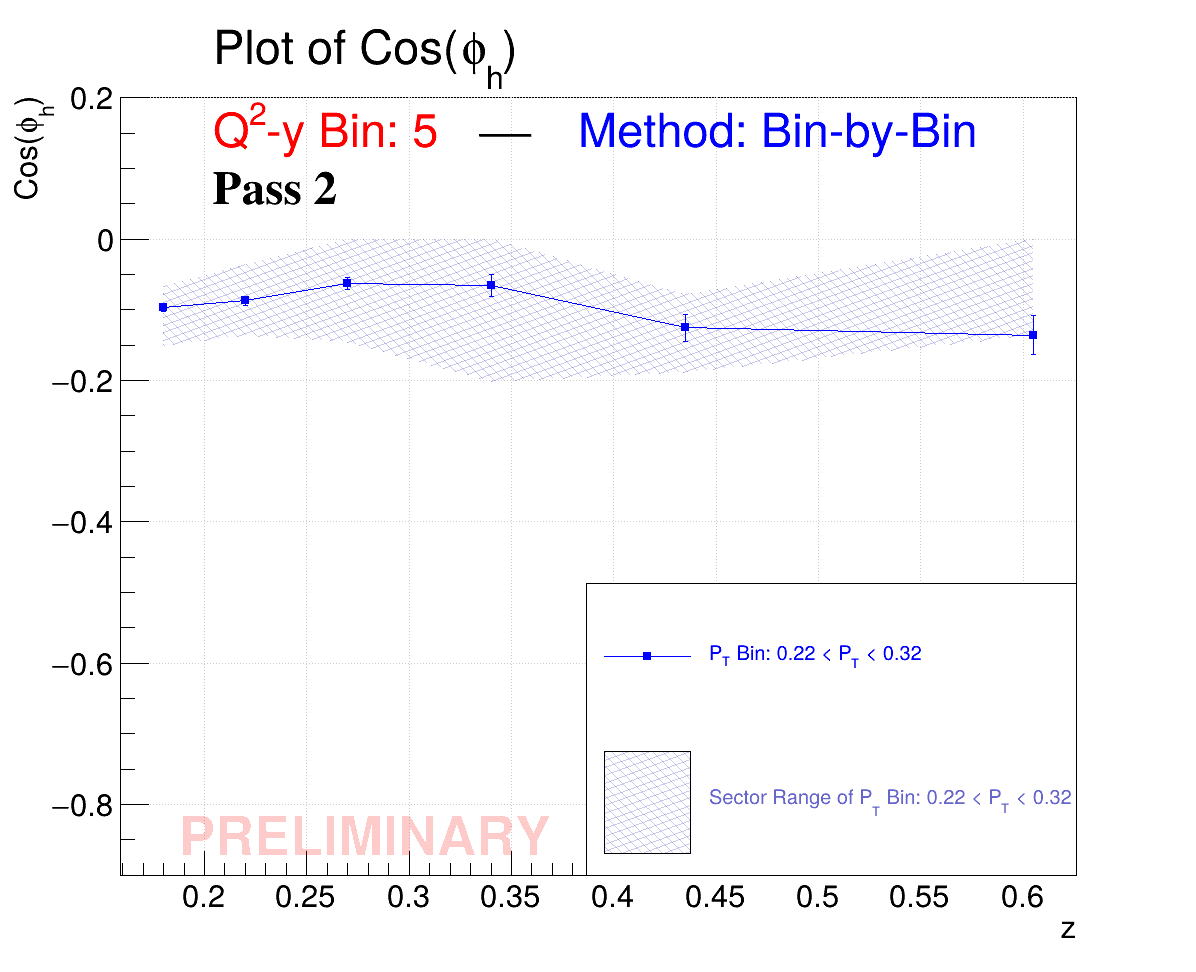

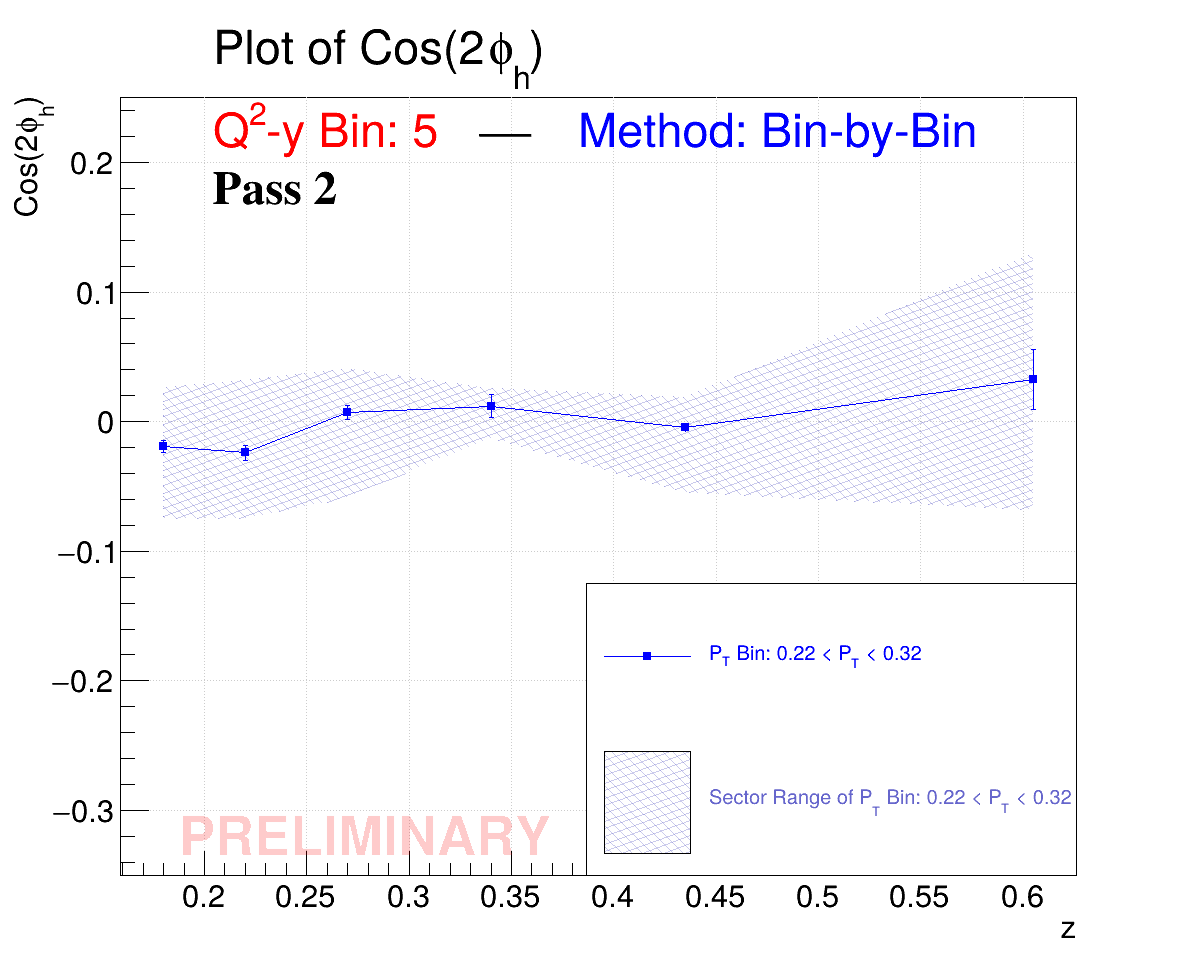

In [3]:
from array import array
latex = {}

Q2_y_Bin = 5

Parameter = "Parameter C"
pT_row_1  = [1,  7, 13, 19, 25, 31]
pT_row_2  = [2,  8, 14, 20, 26, 32]
pT_row_3  = [3,  9, 15, 21, 27, 33]
pT_row_4  = [4, 10, 16, 22, 28, 34]
pT_row_5  = [5, 11, 17, 23, 29]
pT_row_6  = [6, 12, 18]

# y_values, y_errs = {}, {}
# y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = {}, {}, {}, {}
# for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
#     current_max_val = -float("inf")
#     current_max_err = -float("inf")
#     current_min_val =  float("inf")
#     current_min_err =  float("inf")
#     for val, err in row:
#         if(current_max_val  < val):
#             current_max_val = val
#             current_max_err = err
#         if(current_min_val  > val):
#             current_min_val = val
#             current_min_err = err
#     y_maxs_collect.append(current_max_val)
#     y_max_errs_collect.append(current_max_err)
#     y_mins_collect.append(current_min_val)
#     y_min_errs_collect.append(current_min_err)

x_values           = {}
y_values           = {}
y_errs             = {}
y_maxs_collect     = {}
y_max_errs_collect = {}
y_mins_collect     = {}
y_min_errs_collect = {}
tgraph_ext_shaded  = {}
tgraph_shaded      = {}
tgraph_errors      = {}
canvas             = {}
legend             = {}
mg                 = {}


for Parameter in ["Parameter B", "Parameter C"]:
    PT_BIN_COLOR = 1
    PT_BIN_COLOR = 2

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TCanvas(f"canvas_(Bin {Q2_y_Bin})_({Parameter})", "Graph with Extended Shaded Regions", 1200, 1000)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLegend(0.9, 0.1, 0.49, 0.4)  # Adjust these coordinates as needed
    # legend[f"(Bin {Q2_y_Bin}_({Parameter})"].SetHeader("Legend", "C")  # Optional header

    # Create a multigraph
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TMultiGraph()
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetName(f"(Bin {Q2_y_Bin}_({Parameter})")
    row = -1
    row = 0
    # for pT_row in [pT_row_1, pT_row_2, pT_row_3, pT_row_4, pT_row_5, pT_row_6]:
    for pT_row in [pT_row_2]:
        row += 1
        if(row == 3):
            row += 1
        PT_BIN_COLOR     += 1
        if(PT_BIN_COLOR in [3, 5, 7]):
            PT_BIN_COLOR += 1
        if(PT_BIN_COLOR in [9]):
            PT_BIN_COLOR  = 28
        if(PT_BIN_COLOR in [29]):
            PT_BIN_COLOR  = 30
        if(PT_BIN_COLOR in [31]):
            PT_BIN_COLOR  = 42
        if(PT_BIN_COLOR in [43]):
            PT_BIN_COLOR  = 46
        if(PT_BIN_COLOR in [47]):
            PT_BIN_COLOR  = 12

        if(PT_BIN_COLOR == 2):
            PT_FILL_COLOR = ROOT.kRed
        if(PT_BIN_COLOR == 4):
            PT_FILL_COLOR = ROOT.kBlue
        if(PT_BIN_COLOR == 6):
            PT_FILL_COLOR = ROOT.kMagenta
        if(PT_BIN_COLOR == 8):
            PT_FILL_COLOR = ROOT.kGreen
        if(PT_BIN_COLOR == 28):
            PT_FILL_COLOR = ROOT.kOrange
        if(PT_BIN_COLOR == 30):
            PT_FILL_COLOR = ROOT.kTeal
        if(PT_BIN_COLOR == 42):
            PT_FILL_COLOR = ROOT.kYellow

        x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = []
        y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], []
        y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], [], [], []
        for z_pT_Bin in pT_row:
            # print(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"])
            x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, z_pT_Bin)[1][0][1], 3))
            y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0])
            y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1])
            current_max_val = -float("inf")
            current_max_err = -float("inf")
            current_min_val =  float("inf")
            current_min_err =  float("inf")
            for sec in range(1, 7):
                bounds_upper = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] + Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                bounds_lower = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] - Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                center_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                center_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
                if(not (((center_val + center_err) < bounds_upper) and ((center_val - center_err) > bounds_lower))):
                    if(((center_val + center_err) < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_max_val < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                    if(((center_val + center_err) > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_min_val > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
            if(current_max_val in [-float("inf")]):
                current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            if(current_min_val in [float("inf")]):
                current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_val)
            y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_err)
            y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_val)
            y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_err)

        x_values_main = array('d', x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_values_main = array('d', y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_errs_main   = array('d', y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_maxs        = array('d', y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_max_errs    = array('d', y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_mins        = array('d', y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_min_errs    = array('d', y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_err_low     = array('d', [y - min_val   for y,   min_val in zip(y_values_main,   y_mins)])
        y_err_high    = array('d', [max_val - y   for y,   max_val in zip(y_values_main,   y_maxs)])
        ext_err_low   = array('d', [err + min_err for err, min_err in zip(y_err_low,   y_min_errs)])
        ext_err_high  = array('d', [err + max_err for err, max_err in zip(y_err_high,  y_max_errs)])
        n_points = len(x_values_main)

        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_ext_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low,   y_err_high)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_errs_main, y_errs_main)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_errors_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")

        # tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kOrange)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-9)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-9, 0.35-(row*0.01))

    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3344)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3944)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("A3 sames")
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].GetYaxis().SetRangeUser(-0.9, 0.2)
        # tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kBlue-10)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3021)


    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3644)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-6)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-6, 0.35-(row*0.01))
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3240+(row*2))

    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("3 sames")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerStyle(21)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerSize(1)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetLineColor(PT_BIN_COLOR)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerColor(PT_BIN_COLOR)
    #     tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("PL sames")


    #     mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "A3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "PL")
        legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_BIN_COLOR),    "]{P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "PL")
        legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_FILL_COLOR-6), "]{Sector Range of P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "f")
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTitle("".join(["#splitline{#splitline{Plot of Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "} #topbar #color[", str(root_color.Blue), "]{Method: Bin-by-Bin}}}{", str(root_color.Bold), "{Pass 2}}; z; Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})"]))

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw("A")
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].GetYaxis().SetRangeUser(-0.35 if("C" in str(Parameter)) else -0.9, 0.25 if("C" in str(Parameter)) else 0.2)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLatex()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextSize(0.06)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextColorAlpha(ROOT.kRed, 0.2)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].DrawTextNDC(0.15, 0.12, "PRELIMINARY")  # Normalized coordinates
    
    Save_Name = "".join([f"Sector_Dependence_Plot_Q2_y_Bin_{Q2_y_Bin}_", "CosPhi" if("B" in Parameter) else "Cos2Phi", ".pdf"])
    
    if(not True):
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].SaveAs(Save_Name)
        print(f"\n{color.BBLUE}Saved: {color.UNDERLINE}{Save_Name}{color.END}\n")
    else:
        print(f"\n{color.RED}Did NOT save: {color.BOLD}{color.UNDERLINE}{Save_Name}{color.END}\n")

print("Done")

.

.

.

# Plotting Parameters vs Sectors

In [20]:
import ROOT

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

# Data setup
sectors = ["All", "1", "2", "3", "4", "5", "6"]

Parameter_Type = "C"

if(Parameter_Type in ["B"]):
    Parameter_Type_Title = "Cos(#phi_{h})"
else:
    Parameter_Type_Title = "Cos(2#phi_{h})"

Q2_y_Bin = 3
z_pT_Bin = 22


# print(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_(Parameter B)"])

y_values = []
y_errors = []

# print(f"y_values = {y_values}")
# print(f"y_errors = {y_errors}")

for sec in Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_(Parameter {Parameter_Type})"]:
    y_values.append(sec[0])
    y_errors.append(sec[1])
x_values = range(len(sectors))  # x positions for the points

# print(f"y_values = {y_values}")
# print(f"y_errors = {y_errors}")


# Create TGraphErrors
n_points = len(x_values)
graph = ROOT.TGraphErrors(n_points)

for i in range(n_points):
    graph.SetPoint(i, x_values[i], y_values[i])
    graph.SetPointError(i, 0, y_errors[i])

# Style the graph
graph.SetTitle(f"#splitline{{#splitline{{Plot of {Parameter_Type_Title} vs #pi^{{+}} Sectors}}{{Q^{{2}}-y-z-P_{{T}} Bin: {Q2_y_Bin}-{z_pT_Bin}}}}}{{Pass 2}}; Pion Sector; {Parameter_Type_Title}")
graph.SetMarkerStyle(21)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)

# Create canvas
canvas = ROOT.TCanvas("canvas", "Graph with Error Bars", 800, 600)

# Set right margin to reduce extra space
canvas.SetRightMargin(0.05)


graph.Draw("APL")  # Draw axes and points

# Adjust the x-axis range to start at -0.5
graph.GetXaxis().SetLimits(-0.5, n_points-0.5)

graph.GetYaxis().SetRangeUser(-0.5, 0.2)

# Draw a line at y=0
line = ROOT.TLine(-0.5, 0, n_points-0.5, 0)
line.SetLineColor(ROOT.kBlack)
line.Draw()

# Adding text label
latex = ROOT.TLatex()
latex.SetTextSize(0.12)
latex.SetTextColorAlpha(ROOT.kRed, 0.2)
latex.DrawTextNDC(0.235, 0.12, "PRELIMINARY")  # Normalized coordinates

# Customizing the x-axis labels
axis = graph.GetXaxis()
for i, sector in enumerate(sectors):
    axis.ChangeLabel(i+1, -1, -1, -1, -1, -1, sector)

# Update canvas to draw everything
canvas.Update()
canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


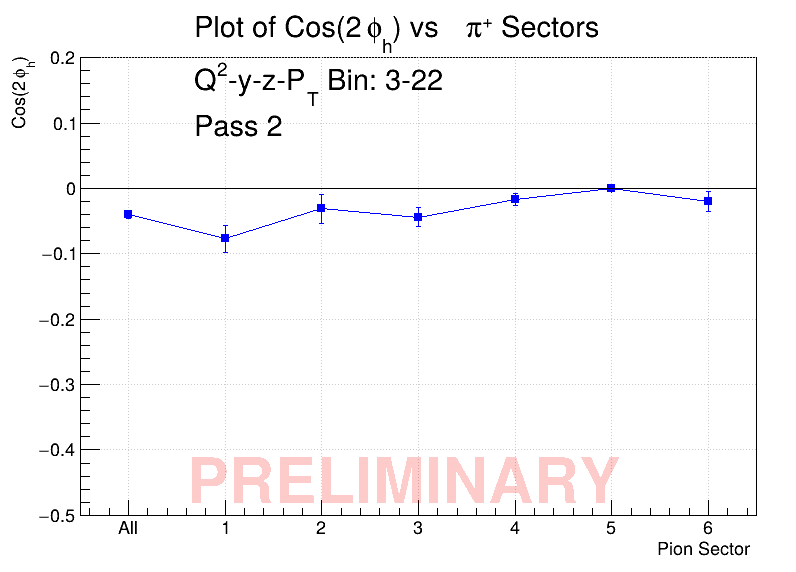

In [17]:
canvas.Draw()

.

.

.

# Showing Individual Sector Plots/Fits

In [ ]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V10_All"


Common_Name = "Pass_2_New_Fiducial_Cut_Test_FC_14_V13_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
    # REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V10_5311")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_20")
    MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
    MC_GEN_File_Name = "Pass_2_New_Fiducial_Cut_Test_V12_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")

In [ ]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"

Smear_Type = "Smear"
Q2_y_Bin = "All"
Q2_y_Bin = "3"

if(Smear_Type in ["Smear"]):
    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t_smeared'-[NumBins=24, MinBin=0, MaxBin=360]))"
    Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2_smeared'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y_smeared'-[NumBins=100, MinBin=0, MaxBin=1]))"
    Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z_smeared'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT_smeared'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
else:
    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
    Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
    Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"

Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))


Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))


Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))


Histo_mdf_Title_OG = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title_OG = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title_OG = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_bdf_Title_OG = str(Histo_bdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")


Histo_mdf_Q2_y_Title = str(Histo_mdf_Q2_y_3D.GetTitle())
Histo_bdf_Q2_y_Title = str(Histo_bdf_Q2_y_3D.GetTitle())
Histo_rdf_Q2_y_Title = str(Histo_rdf_Q2_y_3D.GetTitle())
Histo_gdf_Q2_y_Title = str(Histo_gdf_Q2_y_3D.GetTitle())

Histo_mdf_z_pT_Title = str(Histo_mdf_z_pT_3D.GetTitle())
Histo_bdf_z_pT_Title = str(Histo_bdf_z_pT_3D.GetTitle())
Histo_rdf_z_pT_Title = str(Histo_rdf_z_pT_3D.GetTitle())
Histo_gdf_z_pT_Title = str(Histo_gdf_z_pT_3D.GetTitle())


z_pT_Bin_Unfold = 22
# z_pT_Bin_Unfold = "All"
Particle_Sector = "#pi^{+} Pion Sector"
Sector = "All"
if(Sector not in ["All", 0]):
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
else:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else ""]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"])])
    
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)


Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Q2_y_Title = Histo_bdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Q2_y_Title = Histo_gdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_z_pT_Title = Histo_bdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_z_pT_Title = Histo_gdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_Title      = Histo_mdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Title      = Histo_rdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
print(f"Histo_rdf_Title = {Histo_rdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

    
# Generated histogram should always integrate the sectors
Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_bdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")
Histo_bdf_2D  = Histo_bdf_3D.Project3D("z")

Histo_mdf_2D.SetName("Histo_mdf_2D")
Histo_rdf_2D.SetName("Histo_rdf_2D")
Histo_gdf_2D.SetName("Histo_gdf_2D")
Histo_bdf_2D.SetName("Histo_bdf_2D")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)
Histo_bdf_2D.SetTitle(Histo_bdf_Title)


Histo_Acceptance = Histo_mdf_2D.Clone("Histo_Acceptance")
Histo_Acceptance.Add(Histo_bdf_2D)
Histo_Acceptance.Divide(Histo_gdf_2D)
Histo_BBB_2D = Histo_rdf_2D.Clone("Histo_BBB_2D")
Histo_BBB_2D.Divide(Histo_Acceptance)
Histo_BBB_2D.SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction")).replace("Cut: Complete Set of SIDIS Cuts", ""))


Histo_mdf_Q2_y_2D = Histo_mdf_Q2_y_3D.Project3D("yz")
Histo_bdf_Q2_y_2D = Histo_bdf_Q2_y_3D.Project3D("yz")
Histo_rdf_Q2_y_2D = Histo_rdf_Q2_y_3D.Project3D("yz")
Histo_gdf_Q2_y_2D = Histo_gdf_Q2_y_3D.Project3D("yz")

Histo_mdf_Q2_y_2D.SetTitle(Histo_mdf_Q2_y_Title)
Histo_bdf_Q2_y_2D.SetTitle(Histo_bdf_Q2_y_Title)
Histo_rdf_Q2_y_2D.SetTitle(Histo_rdf_Q2_y_Title)
Histo_gdf_Q2_y_2D.SetTitle(Histo_gdf_Q2_y_Title)

Histo_mdf_z_pT_2D = Histo_mdf_z_pT_3D.Project3D("yz")
Histo_bdf_z_pT_2D = Histo_bdf_z_pT_3D.Project3D("yz")
Histo_rdf_z_pT_2D = Histo_rdf_z_pT_3D.Project3D("yz")
Histo_gdf_z_pT_2D = Histo_gdf_z_pT_3D.Project3D("yz")

Histo_mdf_z_pT_2D.SetTitle(Histo_mdf_z_pT_Title)
Histo_bdf_z_pT_2D.SetTitle(Histo_bdf_z_pT_Title)
Histo_rdf_z_pT_2D.SetTitle(Histo_rdf_z_pT_Title)
Histo_gdf_z_pT_2D.SetTitle(Histo_gdf_z_pT_Title)


Histo_All = {}
Particle_Sector = "#pi^{+} Pion Sector"
for Sector in [1, 2, 3, 4, 5, 6]:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
    Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"]  = Histo_mdf_3D.Project3D("z")
    Histo_All[f"Histo_rdf_2D_{Sector}"]  = Histo_rdf_3D.Project3D("z")
    Histo_All[f"Histo_gdf_2D_{Sector}"]  = Histo_gdf_3D.Project3D("z")
    Histo_All[f"Histo_bdf_2D_{Sector}"]  = Histo_bdf_3D.Project3D("z")

    Histo_All[f"Histo_mdf_2D_{Sector}"].SetTitle(Histo_mdf_Title)
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetTitle(Histo_rdf_Title)
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetTitle(Histo_gdf_Title)
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetTitle(Histo_bdf_Title)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"].SetName(f"Histo_mdf_2D_{Sector}")
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetName(f"Histo_rdf_2D_{Sector}")
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetName(f"Histo_gdf_2D_{Sector}")
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetName(f"Histo_bdf_2D_{Sector}")
    
    Histo_All[f"Histo_Acceptance_{Sector}"] = Histo_All[f"Histo_mdf_2D_{Sector}"].Clone(f"Histo_Acceptance_{Sector}")
    Histo_All[f"Histo_Acceptance_{Sector}"].Add(Histo_All[f"Histo_bdf_2D_{Sector}"])
    Histo_All[f"Histo_Acceptance_{Sector}"].Divide(Histo_All[f"Histo_gdf_2D_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"] = Histo_All[f"Histo_rdf_2D_{Sector}"].Clone(f"Histo_BBB_1D_{Sector}")
    Histo_All[f"Histo_BBB_2D_{Sector}"].Divide(Histo_All[f"Histo_Acceptance_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"].SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction").replace("Cut: Complete Set of SIDIS Cuts", "")))
    
    

canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=2200, Size_Y=2200, cd_Space=0)
canvas_upper = canvas_main.cd(1)
canvas_lower = canvas_main.cd(2)
canvas_upper.Divide(3, 1, 0, 0)
canvas_lower.Divide(3, 2, 0, 0)
# ROOT.gPad.SetLogz(1)
canvas_main.Draw()

Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_Q2_y_2D.Draw("colz")
Q2_y_borders = {}
for Q2_Y_Bin_ii in range(1, 18, 1):
    Q2_y_borders[Q2_Y_Bin_ii] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    for line in Q2_y_borders[Q2_Y_Bin_ii]:
        line.Draw("same")
Histo_rdf_Q2_y_2D.GetXaxis().SetRangeUser(0.2, 0.8)
Histo_rdf_Q2_y_2D.GetYaxis().SetRangeUser(1.5, 9)
Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_z_pT_2D.Draw("colz")
Histo_rdf_z_pT_2D.GetXaxis().SetRangeUser(0,   0.9)
Histo_rdf_z_pT_2D.GetYaxis().SetRangeUser(0.1, 0.9)
if(Q2_y_Bin not in ["All", "0", 0]):
    Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=int(Q2_y_Bin), Set_Max_Y=1.2, Set_Max_X=1.2, Plot_Orientation_Input="z_pT")


Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_BBB_2D.SetLineWidth(4)
Histo_BBB_2D.Draw("same hist E0")
Histo_BBB_2D.GetYaxis().SetRangeUser(0, 1.3*(Histo_BBB_2D.GetBinContent(Histo_BBB_2D.GetMaximumBin())))
draw_type = "BBB"
for Sector in [1, 2, 3, 4, 5, 6]:
    color_of_sector      = Sector + 1
    if(color_of_sector  >= 4):
        color_of_sector += 1
    if(color_of_sector  >= 5):
        color_of_sector += 1
    if(color_of_sector  >= 8):
        color_of_sector += 1
    if(color_of_sector  >= 9):
        color_of_sector += 1
    if(color_of_sector  >= 10):
        color_of_sector += 30
#         print(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineColor(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineWidth(4)
#     Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.2*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
    Draw_Canvas(canvas=canvas_lower, cd_num=Sector, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.5*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


#splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: All}}{Cut: No Cuts}